<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. PyTorch. Создание и обучение нейронных сетей </b></h2>


# Neural networks training using PyTorch

In this notebook we build and train simple neural network using PyTorch. Our goal is to show the basics of torch framework and achieve simple understandings of how problemsolving with neural networks looks like.

In [1]:
import torch

In [2]:
device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda', index=0)

## Dataset Preparation

Here we learn some basic data preparation functions and classes from PyTorch as:

- `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`
- dataset downloading api

First we would like to define our problem. Here we load the MNIST dataset (with PyTorch API)

MNIST:
- 28x28 images of `0`, `1`, .. `9`
- each pixel is grayscaled (float value in [0, 1))
- targets are int values in [0, 9] (10 classes)
- objects are ($x_i$, $y_i$), where $x_i$ shape is (1, 28, 28), $y_i$ is int value

For our purposes we will flatten the input ($x$), so our data during train will have shapes:

- `x_batch` shape `(batch_size, 784)`
- `y_batch` shape `(batch_size)`



In [3]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs

In [4]:
data_tfs = tfs.Compose([
  tfs.ToTensor(),
  tfs.Normalize((0.5,), (0.5,))
])

In [5]:
# install for train and test
root = './'
train = MNIST(root, train=True,  transform=data_tfs, download=True)
test  = MNIST(root, train=False, transform=data_tfs, download=True)

In [6]:
print(f'Data size:\n\t train {len(train)},\n\t test {len(test)}')
print(f'Data shape:\n\t features {train[0][0].shape},\n\t target {type(test[0][1])}')

Data size:
	 train 60000,
	 test 10000
Data shape:
	 features torch.Size([1, 28, 28]),
	 target <class 'torch.Tensor'>


New thing we don't need to make batch loader by ourselves. Let us use the torch implementation of it called `DataLoader` from `torch.utils.data`

In [7]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [8]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

Finally we're prepared our data, so let's build some model to classify the images!

## Model and Train (of abnormal people)

We now how the torch computes the gradient functions during the computation of expression. Using `.backward()` method on expression **we pass the tree of gradient computing till the leafs** which are reliable for parameters of our model.

Thus, we use this knowledge to find the optimal weights of some model, which is represented by some expression.

Assume,
1. We want to learn linear model
2. For each class we use own weights to calculate logits
3. We use softmax on logits for probabilities of each class
4. Train on batches using sgd

In [9]:
features = 784
classes = 10

In [10]:
W = torch.FloatTensor(features, classes).uniform_(-1, 1) / features**0.5
W.requires_grad_()

tensor([[-0.0034, -0.0308,  0.0343,  ...,  0.0290, -0.0353, -0.0080],
        [-0.0333,  0.0105,  0.0254,  ...,  0.0217,  0.0254,  0.0352],
        [ 0.0020,  0.0343,  0.0279,  ...,  0.0241, -0.0063, -0.0331],
        ...,
        [-0.0028, -0.0284, -0.0054,  ..., -0.0291,  0.0221, -0.0352],
        [ 0.0006, -0.0108, -0.0098,  ..., -0.0016,  0.0058, -0.0081],
        [-0.0227, -0.0053, -0.0231,  ..., -0.0248,  0.0225,  0.0013]],
       requires_grad=True)

In [11]:
W.shape

torch.Size([784, 10])

SGD train loop

In [12]:
epochs = 3
lr=1e-2
history = []

In [13]:
import numpy as np
from torch.nn.functional import cross_entropy

In [17]:
for i in range(epochs):
    for x_batch, y_batch in train_loader:
        # load batches of data correctly
        x_batch = x_batch.reshape(x_batch.shape[0], -1)

        # compute loss (log loss a.k.a. cross entropy)
        logits = x_batch @ W
        probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)
    
        loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()
        print(probabilities[range(batch_size), y_batch])
        print(y_batch)
        history.append(loss.item())

        # calc gradients
        loss.backward()

        # step of gradient descent
        grad = W.grad
        with torch.no_grad():
            W -= lr * grad
        W.grad.zero_()

    print(f'{i+1},\t loss: {history[-1]}')

tensor([0.5853, 0.9954, 0.7947, 0.9529, 0.8880, 0.7533, 0.9732, 0.9771, 0.9723,
        0.9805, 0.9908, 0.4868, 0.9987, 0.9590, 0.9735, 0.8745, 0.9245, 0.8677,
        0.6142, 0.4948, 0.9627, 0.9800, 0.5322, 0.9492, 0.0919, 0.7092, 0.5454,
        0.9998, 0.1298, 0.4827, 0.7802, 0.8319, 0.9588, 0.1966, 0.8247, 0.8523,
        0.9709, 0.9965, 0.8150, 0.9683, 0.9802, 0.9056, 0.8238, 0.7671, 0.8074,
        0.9680, 0.7529, 0.9810, 0.0206, 0.9658, 0.9090, 0.9935, 0.9934, 0.3198,
        0.7506, 0.8342, 0.9980, 0.8131, 0.9597, 0.9590, 0.7225, 0.7997, 0.8958,
        0.9864, 0.5213, 0.8377, 0.9929, 0.9818, 0.6809, 0.9714, 0.4000, 0.9617,
        0.9790, 0.9921, 0.9690, 0.9409, 0.6067, 0.9715, 0.8504, 0.9574, 0.0014,
        0.9555, 0.9974, 0.9650, 0.9474, 0.6476, 0.4644, 0.9089, 0.9935, 0.9719,
        0.9989, 0.9600, 0.8724, 0.9631, 0.9552, 0.9959, 0.9376, 0.9671, 0.9610,
        0.8827, 0.7012, 0.8968, 0.9799, 0.9634, 0.8953, 0.9553, 0.9718, 0.9880,
        0.8551, 0.1158, 0.9860, 0.8827, 

tensor([2.5279e-01, 6.7955e-01, 9.0992e-01, 4.8029e-01, 7.6670e-01, 3.1464e-01,
        2.3415e-01, 6.0646e-01, 3.8615e-02, 8.7740e-01, 8.9392e-01, 3.8563e-01,
        5.3935e-01, 8.1219e-01, 7.7130e-01, 9.7366e-01, 9.9137e-01, 9.8451e-01,
        9.7358e-01, 7.9679e-01, 9.0548e-01, 4.6486e-01, 3.7209e-01, 4.9083e-01,
        9.9719e-01, 8.2573e-01, 4.9625e-01, 9.4555e-01, 9.7752e-01, 7.7373e-01,
        9.9799e-01, 2.5495e-01, 8.3804e-01, 8.4155e-01, 3.7118e-01, 4.4442e-01,
        9.5393e-01, 8.4900e-01, 6.8291e-01, 8.2423e-01, 4.9953e-01, 9.5209e-01,
        4.9322e-01, 9.7496e-01, 9.5785e-01, 8.6889e-01, 4.2323e-01, 9.0241e-01,
        9.8980e-01, 8.9904e-01, 7.3244e-01, 5.8019e-04, 9.3837e-01, 8.5696e-01,
        9.8004e-01, 7.2128e-03, 4.6536e-01, 8.0875e-01, 9.9484e-01, 2.3858e-01,
        9.7087e-01, 9.5850e-01, 5.5753e-01, 3.4246e-01, 9.2620e-02, 2.6339e-01,
        7.3695e-01, 9.8342e-01, 9.9118e-01, 9.0787e-01, 8.4446e-01, 8.5876e-01,
        8.8673e-01, 5.6242e-02, 9.2817e-

tensor([2, 3, 4, 2, 3, 9, 0, 0, 4, 5, 0, 6, 4, 7, 4, 3, 1, 9, 3, 9, 9, 3, 1, 8,
        7, 1, 7, 2, 8, 9, 9, 6, 2, 7, 2, 5, 0, 6, 7, 3, 9, 5, 9, 0, 8, 5, 8, 4,
        9, 0, 5, 3, 2, 4, 8, 7, 4, 1, 5, 4, 6, 3, 7, 7, 9, 6, 6, 2, 2, 1, 6, 5,
        4, 5, 3, 0, 5, 5, 2, 0, 5, 8, 8, 4, 2, 6, 9, 7, 1, 0, 2, 3, 1, 8, 7, 1,
        8, 2, 7, 2, 6, 3, 2, 3, 7, 6, 8, 7, 5, 3, 8, 4, 4, 9, 4, 6, 4, 5, 5, 1,
        1, 9, 3, 8, 6, 1, 4, 1])
tensor([0.9503, 0.9610, 0.6118, 0.9989, 0.7666, 0.9976, 0.9005, 0.9746, 0.8713,
        0.9574, 0.9707, 0.9841, 0.9071, 0.9229, 0.8653, 0.9958, 0.0097, 0.9979,
        0.8599, 0.9948, 0.8337, 0.9963, 0.2559, 0.9937, 0.5402, 0.9815, 0.6356,
        0.9928, 0.4810, 0.9966, 0.1803, 0.9998, 0.6933, 0.9851, 0.9947, 0.9545,
        0.9960, 0.9949, 0.9510, 0.9397, 0.9580, 0.9419, 0.9961, 0.9774, 0.0101,
        0.9957, 0.8444, 0.9888, 0.9405, 0.9056, 0.0043, 0.8952, 0.9961, 0.8973,
        0.8920, 0.9836, 0.9555, 0.9981, 0.9926, 0.9736, 0.6758, 0.9467, 0.9611,
       

tensor([0, 5, 5, 6, 5, 7, 7, 8, 0, 9, 6, 0, 9, 1, 8, 2, 3, 3, 4, 4, 3, 5, 5, 6,
        5, 7, 1, 8, 8, 9, 0, 0, 2, 1, 6, 2, 7, 3, 7, 4, 7, 7, 7, 8, 1, 9, 4, 8,
        6, 5, 1, 7, 0, 9, 1, 5, 9, 0, 8, 8, 1, 3, 2, 5, 7, 4, 7, 8, 0, 3, 8, 0,
        0, 2, 4, 1, 9, 0, 9, 2, 0, 5, 8, 8, 8, 8, 9, 5, 8, 3, 3, 0, 6, 4, 4, 4,
        8, 1, 2, 6, 9, 1, 6, 3, 3, 0, 6, 3, 4, 6, 2, 9, 4, 3, 6, 7, 7, 4, 5, 9,
        2, 7, 8, 0, 1, 9, 1, 4])
tensor([0.3294, 0.7474, 0.9651, 0.9645, 0.6120, 0.9915, 0.9283, 0.7896, 0.9209,
        0.9812, 0.5693, 0.8005, 0.7578, 0.8649, 0.9197, 0.9810, 0.7916, 0.8936,
        0.9610, 0.9837, 0.7137, 0.9237, 0.0280, 0.2635, 0.8522, 0.9583, 0.8861,
        0.8121, 0.7679, 0.9803, 0.5190, 0.9150, 0.3285, 0.9544, 0.9425, 0.9421,
        0.6573, 0.8381, 0.9641, 0.9667, 0.9644, 0.9417, 0.5207, 0.9530, 0.9665,
        0.9639, 0.7133, 0.2292, 0.9413, 0.7725, 0.9859, 0.8950, 0.9433, 0.9529,
        0.7073, 0.8996, 0.9314, 0.8377, 0.8783, 0.9930, 0.9743, 0.9856, 0.0359,
       

tensor([8, 3, 9, 1, 5, 4, 5, 2, 8, 9, 4, 8, 2, 2, 9, 8, 4, 6, 8, 9, 5, 2, 4, 9,
        7, 6, 6, 3, 1, 3, 9, 6, 7, 3, 0, 1, 5, 2, 8, 5, 0, 0, 1, 3, 1, 1, 1, 5,
        2, 5, 6, 9, 7, 8, 3, 0, 7, 9, 9, 0, 2, 1, 6, 2, 9, 3, 7, 4, 8, 5, 4, 6,
        8, 7, 7, 8, 0, 9, 7, 0, 5, 1, 9, 2, 8, 3, 6, 4, 9, 5, 8, 6, 9, 7, 5, 8,
        1, 9, 1, 0, 3, 1, 1, 2, 6, 3, 7, 4, 5, 5, 6, 6, 2, 7, 0, 8, 8, 9, 2, 6,
        4, 1, 6, 9, 9, 9, 3, 9])
tensor([0.9755, 0.9804, 0.7221, 0.9813, 0.9502, 0.9979, 0.9318, 0.6623, 0.5487,
        0.9110, 0.7450, 0.8752, 0.9735, 0.7974, 0.8062, 0.0637, 0.9943, 0.6241,
        0.9690, 0.9875, 0.8786, 0.8911, 0.7713, 0.9564, 0.9376, 0.9933, 0.4517,
        0.9993, 0.5356, 0.7787, 0.9057, 0.8522, 0.9198, 0.8120, 0.9474, 0.9687,
        0.9795, 0.5686, 0.7478, 0.9129, 0.6991, 0.7766, 0.5701, 0.8592, 0.9409,
        0.9442, 0.0081, 0.8273, 0.8069, 0.9646, 0.5731, 0.9764, 0.3295, 0.9032,
        0.5403, 0.9924, 0.8613, 0.0078, 0.9271, 0.9973, 0.0784, 0.9767, 0.3345,
       

tensor([8, 1, 0, 7, 3, 2, 1, 2, 7, 3, 4, 6, 1, 8, 1, 0, 9, 8, 0, 3, 1, 2, 7, 0,
        2, 9, 6, 0, 1, 6, 7, 1, 9, 7, 6, 5, 5, 8, 8, 3, 4, 4, 8, 7, 3, 6, 4, 6,
        6, 3, 8, 8, 9, 9, 4, 4, 0, 7, 8, 1, 0, 0, 1, 8, 5, 7, 1, 7, 5, 5, 9, 9,
        4, 2, 5, 3, 7, 4, 6, 6, 0, 1, 0, 1, 2, 4, 8, 5, 3, 5, 0, 0, 6, 4, 3, 8,
        3, 7, 1, 4, 3, 9, 2, 2, 0, 3, 6, 6, 7, 4, 3, 2, 2, 4, 9, 1, 0, 5, 2, 4,
        8, 2, 1, 0, 8, 4, 4, 8])
tensor([0.9893, 0.9958, 0.6918, 0.9519, 0.1155, 0.6659, 0.7388, 0.2701, 0.9859,
        0.0132, 0.8668, 0.9964, 0.8284, 0.9898, 0.8615, 0.9993, 0.0487, 0.6234,
        0.6229, 0.8676, 0.4609, 0.9856, 0.8704, 0.8199, 0.4578, 0.9943, 0.9767,
        0.9982, 0.3199, 0.9120, 0.6729, 0.9815, 0.3084, 0.9890, 0.9912, 0.1305,
        0.9832, 0.0381, 0.8485, 0.9975, 0.9684, 0.9163, 0.7983, 0.0598, 0.6944,
        0.7024, 0.0345, 0.9808, 0.9749, 0.8118, 0.2870, 0.3143, 0.9170, 0.9147,
        0.0131, 0.6162, 0.9775, 0.1388, 0.9753, 0.9960, 0.6910, 0.9894, 0.9828,
       

tensor([1, 7, 2, 8, 4, 9, 6, 0, 7, 7, 3, 5, 6, 0, 6, 8, 5, 4, 7, 1, 6, 8, 6, 8,
        7, 1, 7, 3, 3, 1, 2, 8, 4, 3, 9, 7, 4, 9, 3, 3, 8, 0, 6, 9, 6, 4, 9, 4,
        0, 0, 6, 7, 3, 4, 1, 2, 2, 9, 7, 8, 3, 7, 4, 2, 1, 7, 6, 8, 5, 9, 0, 3,
        6, 1, 1, 4, 9, 6, 3, 5, 1, 2, 1, 2, 0, 2, 6, 5, 6, 6, 1, 7, 3, 8, 4, 7,
        5, 5, 3, 1, 9, 6, 1, 4, 1, 9, 5, 2, 9, 9, 3, 3, 5, 5, 9, 3, 1, 6, 9, 6,
        4, 0, 1, 0, 0, 2, 0, 5])
tensor([0.9536, 0.9951, 0.9977, 0.8116, 0.9550, 0.8809, 0.7027, 0.8393, 0.0900,
        0.8461, 0.1757, 0.9217, 0.9915, 0.8107, 0.9885, 0.9536, 0.3984, 0.7177,
        0.9744, 0.7825, 0.5624, 0.9939, 0.8618, 0.8893, 0.4689, 0.9902, 0.9750,
        0.9684, 0.7217, 0.9916, 0.6471, 0.9340, 0.9612, 0.8862, 0.8926, 0.9849,
        0.6878, 0.5269, 0.9943, 0.6205, 0.1213, 0.9173, 0.9769, 0.9932, 0.8986,
        0.9566, 0.7595, 0.8736, 0.0206, 0.9359, 0.9924, 0.8891, 0.9306, 0.9572,
        0.7736, 0.9090, 0.7357, 0.9666, 0.9739, 0.4916, 0.9712, 0.9524, 0.8998,
       

tensor([3, 1, 5, 9, 8, 6, 9, 0, 8, 1, 4, 8, 6, 4, 4, 6, 6, 8, 0, 8, 4, 2, 8, 6,
        8, 3, 4, 2, 4, 9, 8, 2, 8, 4, 7, 0, 9, 9, 1, 0, 7, 3, 3, 3, 6, 5, 5, 8,
        0, 4, 1, 7, 5, 6, 9, 2, 5, 2, 9, 7, 3, 7, 2, 0, 5, 5, 9, 1, 5, 5, 6, 3,
        3, 0, 3, 1, 2, 2, 7, 3, 1, 4, 7, 5, 5, 6, 1, 7, 9, 8, 6, 0, 6, 1, 7, 4,
        1, 7, 7, 0, 5, 1, 9, 4, 5, 7, 4, 8, 3, 9, 3, 6, 8, 8, 3, 2, 1, 4, 7, 6,
        3, 8, 3, 6, 7, 6, 2, 7])
tensor([9.6344e-01, 8.4211e-01, 3.0921e-01, 9.8260e-01, 7.6628e-01, 9.9352e-01,
        3.4176e-02, 9.9286e-01, 4.2527e-02, 9.6706e-01, 6.2984e-01, 9.9079e-01,
        7.4444e-01, 9.3713e-01, 9.4710e-01, 2.8821e-01, 9.6244e-01, 5.0006e-02,
        5.9004e-01, 9.6411e-01, 9.8852e-01, 7.3270e-01, 2.3523e-01, 8.8427e-01,
        9.6471e-01, 9.8177e-01, 7.0062e-01, 9.9681e-01, 2.8806e-01, 9.6382e-01,
        1.4787e-01, 7.4700e-01, 4.2961e-02, 9.2671e-01, 9.1498e-01, 2.5274e-01,
        6.7465e-01, 4.8218e-01, 6.8115e-01, 9.4850e-01, 2.6965e-01, 9.9158e-01,
       

tensor([7, 7, 8, 9, 9, 0, 8, 6, 0, 4, 2, 1, 5, 1, 9, 2, 8, 8, 4, 2, 1, 6, 0, 1,
        3, 5, 1, 0, 8, 1, 1, 2, 5, 3, 5, 4, 8, 5, 0, 6, 5, 7, 1, 8, 7, 9, 4, 0,
        8, 1, 0, 2, 1, 3, 3, 4, 4, 5, 7, 6, 6, 7, 2, 8, 8, 9, 0, 0, 1, 1, 3, 2,
        6, 3, 0, 4, 5, 5, 9, 6, 5, 7, 9, 8, 0, 9, 0, 2, 1, 2, 1, 7, 5, 6, 5, 4,
        9, 0, 7, 5, 8, 8, 1, 0, 1, 7, 4, 3, 2, 5, 8, 4, 2, 1, 9, 8, 8, 0, 6, 5,
        8, 2, 0, 7, 0, 2, 0, 3])
tensor([0.5885, 0.9938, 0.9668, 0.9996, 0.8850, 0.9507, 0.9921, 0.9899, 0.8793,
        0.9819, 0.6518, 0.9566, 0.7994, 0.6899, 0.9643, 0.4478, 0.9402, 0.9994,
        0.5551, 0.8387, 0.8969, 0.9796, 0.7037, 0.9534, 0.9530, 0.9778, 0.0295,
        0.5393, 0.6309, 0.9413, 0.8906, 0.1250, 0.7657, 0.9988, 0.9893, 0.8797,
        0.2457, 0.9727, 0.8673, 0.8665, 0.3571, 0.9401, 0.9882, 0.1806, 0.3712,
        0.9984, 0.9905, 0.8883, 0.0855, 0.9998, 0.8253, 0.9544, 0.7265, 0.9897,
        0.9593, 0.9861, 0.9897, 0.9601, 0.3927, 0.0947, 0.9795, 0.9786, 0.8320,
       

tensor([4, 2, 2, 5, 1, 9, 0, 1, 4, 2, 4, 2, 2, 7, 6, 9, 6, 7, 6, 9, 2, 2, 4, 0,
        5, 4, 2, 8, 6, 7, 6, 0, 2, 3, 7, 8, 6, 4, 6, 6, 4, 1, 4, 4, 5, 0, 2, 3,
        3, 6, 3, 2, 3, 0, 2, 4, 3, 8, 4, 1, 8, 3, 0, 1, 0, 0, 6, 9, 5, 0, 9, 1,
        1, 2, 4, 3, 6, 5, 7, 6, 0, 7, 4, 8, 1, 0, 8, 1, 8, 2, 2, 3, 2, 4, 0, 5,
        8, 6, 4, 7, 0, 8, 1, 0, 3, 1, 5, 2, 6, 3, 6, 4, 4, 5, 3, 6, 3, 7, 4, 8,
        2, 9, 7, 8, 4, 3, 3, 7])
tensor([0.9388, 0.9465, 0.9585, 0.9617, 0.9824, 0.9900, 0.0095, 0.9962, 0.6369,
        0.9788, 0.9573, 0.5768, 0.9925, 0.9854, 0.7481, 0.9206, 0.9883, 0.9144,
        0.1801, 0.9833, 0.9840, 0.9966, 0.9919, 0.9878, 0.9275, 0.9699, 0.5676,
        0.9650, 0.8790, 0.9794, 0.9621, 0.9988, 0.9722, 0.9727, 0.5993, 0.9281,
        0.8234, 0.9983, 0.0959, 0.8354, 0.8649, 0.9881, 0.2927, 0.9125, 0.3164,
        0.9737, 0.9971, 0.9968, 0.0551, 0.9541, 0.9930, 0.9739, 0.7953, 0.9568,
        0.9747, 0.9593, 0.9795, 0.9443, 0.9361, 0.7480, 0.6079, 0.9490, 0.8937,
       

tensor([9, 9, 3, 9, 8, 0, 1, 1, 2, 2, 5, 3, 7, 4, 0, 5, 0, 6, 4, 7, 2, 8, 0, 9,
        9, 0, 9, 1, 2, 2, 9, 3, 6, 4, 8, 5, 8, 6, 3, 7, 7, 8, 5, 9, 2, 0, 7, 1,
        2, 2, 3, 3, 2, 4, 8, 5, 9, 6, 3, 7, 7, 8, 0, 9, 8, 7, 8, 4, 1, 3, 6, 8,
        5, 5, 6, 1, 1, 8, 0, 5, 6, 2, 9, 8, 3, 6, 5, 1, 6, 9, 6, 2, 0, 4, 0, 0,
        5, 9, 2, 9, 6, 3, 2, 7, 8, 7, 0, 9, 2, 1, 9, 8, 0, 2, 1, 7, 8, 5, 9, 8,
        3, 5, 2, 3, 8, 2, 7, 2])
tensor([0.7318, 0.9899, 0.5727, 0.9066, 0.2266, 0.9224, 0.9688, 0.9861, 0.9728,
        0.9980, 0.7014, 0.3113, 0.9940, 0.9938, 0.1248, 0.9868, 0.9629, 0.9427,
        0.9863, 0.9535, 0.0061, 0.9822, 0.3005, 0.9267, 0.8816, 0.9904, 0.9961,
        0.9632, 0.9827, 0.9833, 0.9994, 0.9877, 0.8367, 0.9270, 0.9947, 0.9996,
        0.9082, 0.9202, 0.9053, 0.9741, 0.9300, 0.9776, 0.4931, 0.8888, 0.9444,
        0.9942, 0.9760, 0.9648, 0.9191, 0.9988, 0.9663, 0.9556, 0.9935, 0.9968,
        0.9799, 0.9989, 0.7111, 0.8984, 0.8956, 0.9892, 0.9793, 0.9964, 0.9918,
       

tensor([9, 8, 6, 0, 3, 3, 4, 7, 3, 9, 3, 7, 5, 3, 2, 6, 4, 7, 5, 8, 9, 0, 6, 3,
        2, 5, 4, 3, 9, 0, 5, 1, 9, 2, 6, 3, 7, 4, 6, 5, 6, 6, 9, 7, 3, 8, 5, 9,
        8, 0, 2, 1, 5, 2, 0, 3, 9, 4, 9, 5, 4, 6, 5, 7, 6, 8, 8, 9, 9, 0, 5, 1,
        2, 2, 3, 3, 7, 4, 3, 5, 4, 6, 1, 7, 6, 8, 1, 9, 0, 7, 1, 6, 0, 4, 2, 3,
        9, 0, 4, 6, 1, 6, 4, 6, 8, 9, 4, 0, 9, 0, 8, 1, 7, 3, 8, 9, 1, 4, 4, 5,
        3, 7, 0, 9, 3, 5, 1, 6])
tensor([0.9323, 0.9698, 0.9968, 0.8002, 0.1886, 0.9832, 0.9019, 0.8756, 0.9769,
        0.9916, 0.3505, 0.9726, 0.9370, 0.9988, 0.4229, 0.9930, 0.8707, 0.9676,
        0.9958, 0.8221, 0.9601, 0.9931, 0.9644, 0.9693, 0.3253, 0.9286, 0.6845,
        0.9747, 0.8937, 0.8933, 0.9437, 0.8168, 0.7051, 0.9918, 0.9994, 0.9591,
        0.9119, 0.9988, 0.6761, 0.9975, 0.8974, 0.9882, 0.9635, 0.7016, 0.9442,
        0.7444, 0.9599, 0.8759, 0.7190, 0.8691, 0.9533, 0.9995, 0.1216, 0.9811,
        0.5211, 0.8966, 0.8969, 0.7906, 0.0975, 0.9890, 0.2706, 0.9969, 0.9582,
       

tensor([5, 3, 7, 0, 0, 3, 5, 4, 6, 5, 7, 6, 3, 7, 5, 0, 0, 1, 0, 2, 8, 3, 7, 4,
        6, 5, 5, 6, 3, 7, 5, 0, 8, 1, 7, 2, 2, 3, 9, 4, 9, 5, 4, 6, 9, 7, 7, 8,
        4, 9, 2, 8, 6, 7, 9, 7, 6, 0, 0, 1, 8, 3, 7, 5, 9, 2, 5, 8, 2, 0, 0, 9,
        0, 6, 5, 0, 4, 9, 7, 1, 2, 1, 8, 8, 0, 4, 9, 3, 5, 2, 6, 1, 1, 2, 6, 6,
        8, 5, 3, 6, 5, 7, 6, 4, 8, 8, 5, 1, 9, 8, 4, 0, 0, 5, 8, 9, 6, 4, 7, 1,
        2, 9, 7, 2, 9, 1, 0, 9])
tensor([0.6144, 0.9408, 0.8594, 0.9642, 0.8976, 0.9429, 0.9925, 0.5804, 0.5569,
        0.9847, 0.9988, 0.9951, 0.8936, 0.8622, 0.8424, 0.9429, 0.9814, 0.6323,
        0.7003, 0.9335, 0.6898, 0.7585, 0.9364, 0.9983, 0.7186, 0.9681, 0.8233,
        0.4568, 0.9026, 0.8633, 0.9383, 0.9023, 0.8745, 0.9128, 0.3924, 0.9202,
        0.1328, 0.8656, 0.6790, 0.7963, 0.5833, 0.9974, 0.6340, 0.7934, 0.9619,
        0.0303, 0.9035, 0.4003, 0.9271, 0.6994, 0.9588, 0.9748, 0.8930, 0.9304,
        0.9241, 0.9948, 0.8597, 0.9867, 0.9108, 0.9413, 0.3108, 0.9577, 0.9939,
       

tensor([5, 6, 2, 2, 5, 1, 7, 1, 2, 1, 6, 1, 3, 7, 3, 2, 5, 4, 5, 7, 4, 5, 2, 2,
        1, 9, 3, 4, 3, 5, 4, 8, 9, 9, 6, 7, 3, 0, 3, 0, 9, 7, 1, 5, 2, 1, 9, 1,
        8, 7, 7, 6, 9, 6, 2, 6, 5, 8, 2, 2, 2, 2, 5, 7, 2, 7, 6, 4, 9, 0, 4, 2,
        0, 4, 3, 2, 6, 3, 1, 3, 0, 3, 3, 1, 9, 1, 8, 6, 0, 9, 8, 5, 8, 5, 9, 3,
        7, 0, 5, 8, 9, 3, 6, 9, 8, 6, 2, 0, 7, 1, 9, 2, 4, 3, 9, 4, 2, 5, 1, 6,
        3, 7, 4, 8, 3, 9, 0, 0])
tensor([3.6338e-01, 8.6270e-01, 9.6487e-01, 9.2507e-01, 8.3433e-01, 8.8212e-01,
        4.8721e-01, 2.2346e-01, 3.5225e-01, 1.9390e-02, 1.8404e-02, 9.8310e-01,
        5.5796e-01, 9.9038e-01, 9.9618e-01, 9.6722e-01, 6.5848e-01, 9.6811e-01,
        2.8919e-01, 9.1609e-01, 8.7221e-01, 8.4424e-01, 2.7145e-03, 9.7158e-01,
        9.4617e-01, 9.8100e-01, 8.9042e-01, 9.3472e-01, 8.6675e-01, 2.0778e-01,
        9.8389e-01, 9.6885e-01, 3.1703e-01, 9.9694e-01, 8.3523e-01, 9.3549e-01,
        8.7949e-01, 8.7082e-01, 8.0555e-01, 1.3962e-01, 9.4049e-01, 9.8562e-01,
       

tensor([3, 1, 0, 3, 6, 5, 0, 3, 6, 0, 7, 1, 3, 2, 6, 3, 1, 4, 7, 5, 2, 6, 6, 7,
        4, 8, 4, 9, 4, 0, 0, 1, 4, 2, 6, 3, 6, 4, 5, 5, 4, 6, 8, 7, 4, 8, 4, 9,
        0, 0, 0, 1, 8, 2, 4, 3, 0, 6, 1, 7, 1, 8, 5, 9, 8, 0, 7, 9, 1, 9, 3, 8,
        0, 9, 9, 8, 7, 4, 4, 1, 9, 7, 3, 7, 4, 3, 2, 0, 6, 0, 2, 7, 0, 8, 0, 2,
        8, 0, 2, 1, 8, 2, 0, 6, 2, 3, 2, 3, 9, 7, 8, 3, 9, 3, 5, 6, 5, 6, 4, 4,
        8, 9, 5, 1, 5, 9, 1, 8])
tensor([9.4968e-01, 9.7482e-01, 5.1367e-01, 7.7894e-01, 9.7971e-01, 8.1442e-01,
        9.6154e-01, 9.7800e-01, 9.7783e-01, 7.8424e-01, 9.5604e-01, 9.8553e-01,
        2.5700e-01, 8.4460e-01, 1.1728e-01, 9.0019e-01, 6.5425e-01, 3.4359e-04,
        1.4494e-01, 2.4621e-01, 4.8950e-01, 2.2358e-01, 9.6630e-01, 9.5964e-01,
        8.5232e-01, 8.2090e-01, 9.5433e-01, 9.3934e-01, 9.6445e-01, 8.3506e-01,
        4.7109e-01, 6.1746e-02, 7.4337e-01, 2.3084e-01, 8.4966e-01, 9.6448e-01,
        8.0047e-01, 9.9547e-01, 9.2407e-01, 1.6353e-01, 4.3167e-01, 8.1750e-01,
       

tensor([4, 6, 0, 0, 1, 1, 9, 7, 8, 0, 8, 6, 6, 8, 1, 9, 3, 5, 3, 4, 4, 7, 5, 9,
        9, 8, 0, 6, 5, 0, 7, 8, 0, 1, 8, 7, 1, 7, 1, 1, 2, 3, 9, 2, 6, 3, 8, 1,
        6, 4, 7, 2, 8, 0, 4, 0, 2, 7, 6, 8, 9, 4, 8, 6, 6, 4, 3, 9, 4, 3, 9, 8,
        3, 4, 1, 7, 9, 2, 2, 5, 2, 6, 7, 3, 6, 6, 5, 2, 8, 2, 3, 4, 1, 6, 7, 9,
        9, 0, 9, 2, 0, 1, 9, 3, 7, 3, 8, 9, 5, 7, 8, 8, 7, 7, 1, 2, 2, 2, 2, 5,
        0, 7, 9, 9, 9, 8, 1, 2])
tensor([0.9557, 0.9321, 0.9765, 0.7296, 0.0414, 0.9328, 0.6186, 0.9838, 0.9919,
        0.9705, 0.9717, 0.9762, 0.9337, 0.7361, 0.8241, 0.9893, 0.8478, 0.9612,
        0.9635, 0.9086, 0.2003, 0.9916, 0.9866, 0.9891, 0.5758, 0.9872, 0.9857,
        0.9355, 0.9577, 0.9943, 0.0232, 0.9274, 0.9970, 0.2891, 0.9801, 0.9855,
        0.5069, 0.9690, 0.2318, 0.9634, 0.9453, 0.9965, 0.9880, 0.9521, 0.7673,
        0.5509, 0.2176, 0.9256, 0.4252, 0.9858, 0.9925, 0.9665, 0.9704, 0.1226,
        0.5378, 0.9945, 0.1987, 0.9799, 0.9566, 0.9479, 0.7646, 0.7595, 0.8738,
       

tensor([0.9971, 0.5328, 0.5676, 0.1502, 0.0631, 0.8537, 0.5613, 0.7415, 0.8406,
        0.9952, 0.9416, 0.2704, 0.9771, 0.7924, 0.8825, 0.9480, 0.9688, 0.9972,
        0.9704, 0.8238, 0.9645, 0.9368, 0.1145, 0.7251, 0.6824, 0.0163, 0.9938,
        0.2162, 0.6961, 0.1508, 0.3646, 0.7962, 0.9847, 0.9956, 0.3708, 0.2782,
        0.8570, 0.1168, 0.9899, 0.5761, 0.9553, 0.7492, 0.9711, 0.9459, 0.9638,
        0.7560, 0.9482, 0.8010, 0.6675, 0.3975, 0.9883, 0.9430, 0.9819, 0.9727,
        0.8823, 0.9364, 0.8054, 0.7993, 0.9764, 0.1796, 0.7928, 0.5820, 0.9935,
        0.3844, 0.9974, 0.9092, 0.8306, 0.9813, 0.6706, 0.8224, 0.9908, 0.2410,
        0.9934, 0.7952, 0.9435, 0.9309, 0.2890, 0.9622, 0.5037, 0.9591, 0.9619,
        0.9993, 0.8166, 0.8707, 0.9898, 0.7204, 0.9368, 0.9846, 0.1228, 0.9498,
        0.7711, 0.5537, 0.1621, 0.6836, 0.9607, 0.9089, 0.6264, 0.4156, 0.0099,
        0.4794, 0.9185, 0.9756, 0.9796, 0.9762, 0.1774, 0.5947, 0.9748, 0.8787,
        0.4639, 0.6923, 0.8642, 0.1147, 

tensor([0, 7, 0, 1, 7, 3, 5, 5, 6, 3, 2, 1, 4, 6, 2, 5, 1, 3, 8, 8, 1, 7, 2, 3,
        2, 1, 6, 6, 6, 8, 1, 5, 7, 9, 1, 2, 3, 2, 3, 0, 4, 9, 5, 2, 6, 4, 1, 7,
        8, 3, 2, 1, 5, 3, 1, 6, 7, 2, 5, 1, 7, 2, 9, 6, 9, 0, 4, 2, 3, 2, 7, 7,
        7, 1, 1, 3, 2, 7, 1, 4, 1, 7, 1, 4, 8, 8, 6, 9, 6, 2, 8, 9, 3, 5, 9, 1,
        6, 5, 4, 6, 9, 8, 1, 3, 2, 5, 6, 6, 3, 0, 8, 9, 8, 9, 2, 3, 7, 1, 0, 1,
        2, 0, 8, 3, 3, 4, 6, 5])
tensor([0.1107, 0.9586, 0.6345, 0.2690, 0.9373, 0.6460, 0.9750, 0.7212, 0.8756,
        0.1537, 0.3820, 0.8974, 0.6126, 0.9910, 0.9886, 0.9817, 0.3284, 0.7120,
        0.8623, 0.4796, 0.9984, 0.7599, 0.5219, 0.9455, 0.9772, 0.9956, 0.9512,
        0.2578, 0.8552, 0.1977, 0.9512, 0.0399, 0.9920, 0.9498, 0.6684, 0.3492,
        0.5151, 0.9540, 0.6066, 0.8591, 0.5195, 0.4253, 0.9488, 0.9991, 0.9565,
        0.8847, 0.9065, 0.7087, 0.8660, 0.3836, 0.9563, 0.8408, 0.9181, 0.6031,
        0.7073, 0.0655, 0.7778, 0.7265, 0.4613, 0.9233, 0.7133, 0.8599, 0.8933,
       

tensor([4, 9, 1, 0, 1, 1, 6, 5, 5, 8, 6, 8, 2, 0, 9, 9, 4, 3, 1, 2, 6, 7, 5, 8,
        1, 4, 9, 6, 8, 4, 2, 5, 4, 3, 9, 9, 5, 4, 3, 3, 4, 4, 5, 2, 3, 0, 3, 5,
        5, 0, 1, 1, 3, 6, 4, 9, 4, 3, 8, 2, 8, 9, 5, 1, 2, 6, 8, 0, 4, 1, 0, 1,
        5, 8, 5, 0, 9, 4, 8, 7, 6, 7, 1, 6, 0, 3, 9, 6, 3, 0, 6, 1, 8, 3, 7, 5,
        3, 4, 3, 2, 6, 1, 1, 1, 4, 8, 5, 3, 9, 5, 3, 6, 0, 7, 1, 5, 6, 2, 8, 0,
        9, 6, 8, 7, 2, 1, 1, 2])
tensor([0.7795, 0.9745, 0.6805, 0.6881, 0.9805, 0.7807, 0.1578, 0.6882, 0.8913,
        0.2600, 0.7970, 0.9250, 0.9431, 0.9242, 0.9815, 0.0823, 0.9567, 0.7807,
        0.9229, 0.8038, 0.2539, 0.8396, 0.8181, 0.9739, 0.6707, 0.8145, 0.9226,
        0.7571, 0.7712, 0.8108, 0.9585, 0.9682, 0.9981, 0.0249, 0.0539, 0.7253,
        0.2401, 0.6459, 0.7586, 0.8459, 0.9643, 0.9428, 0.1365, 0.8515, 0.8354,
        0.2166, 0.1002, 0.9579, 0.1650, 0.9936, 0.5509, 0.3500, 0.8485, 0.6013,
        0.9933, 0.8466, 0.8094, 0.7178, 0.4936, 0.7327, 0.9972, 0.6616, 0.9987,
       

tensor([4, 9, 9, 0, 0, 1, 2, 2, 1, 3, 4, 4, 0, 5, 8, 6, 6, 8, 4, 9, 8, 0, 4, 1,
        3, 2, 0, 3, 3, 4, 0, 5, 4, 6, 5, 8, 4, 7, 9, 0, 5, 4, 9, 0, 4, 6, 0, 4,
        6, 7, 9, 6, 3, 2, 8, 3, 7, 4, 8, 8, 2, 7, 2, 8, 9, 6, 3, 3, 9, 8, 3, 2,
        2, 2, 2, 8, 4, 4, 4, 5, 1, 0, 8, 2, 8, 0, 3, 1, 7, 1, 0, 2, 6, 9, 4, 6,
        1, 8, 0, 1, 8, 2, 2, 1, 1, 0, 9, 6, 9, 9, 6, 7, 6, 5, 8, 3, 5, 9, 6, 3,
        9, 7, 7, 1, 2, 8, 4, 3])
tensor([0.7689, 0.9769, 0.5006, 0.9812, 0.7774, 0.9991, 0.9510, 0.9365, 0.8355,
        0.9454, 0.7537, 0.9817, 0.3760, 0.5836, 0.8040, 0.9733, 0.0494, 0.9574,
        0.9209, 0.9825, 0.9801, 0.9360, 0.8694, 0.9888, 0.7235, 0.9403, 0.4482,
        0.9875, 0.6704, 0.9641, 0.9273, 0.8563, 0.0129, 0.9969, 0.9862, 0.9312,
        0.9164, 0.9910, 0.9259, 0.9239, 0.0834, 0.8038, 0.9297, 0.7869, 0.9424,
        0.7247, 0.9794, 0.9612, 0.9793, 0.9668, 0.7976, 0.0032, 0.2706, 0.9814,
        0.9654, 0.9727, 0.8161, 0.9176, 0.8274, 0.8697, 0.9880, 0.9664, 0.9901,
       

tensor([5, 9, 8, 0, 8, 1, 6, 2, 6, 3, 2, 4, 2, 5, 8, 6, 5, 7, 3, 8, 5, 9, 4, 7,
        0, 6, 1, 4, 4, 0, 1, 5, 6, 8, 0, 0, 0, 7, 9, 3, 6, 5, 4, 4, 3, 3, 2, 6,
        0, 2, 5, 1, 2, 7, 1, 7, 9, 9, 4, 9, 1, 1, 3, 2, 4, 4, 4, 6, 2, 7, 1, 7,
        1, 5, 6, 4, 6, 5, 7, 0, 3, 9, 8, 9, 8, 8, 0, 0, 1, 2, 9, 0, 3, 3, 0, 5,
        1, 6, 0, 1, 2, 8, 9, 6, 9, 4, 6, 6, 4, 0, 8, 9, 2, 2, 8, 6, 7, 4, 7, 3,
        9, 9, 5, 3, 7, 0, 8, 0])
tensor([0.9474, 0.9913, 0.1374, 0.9983, 0.9930, 0.8717, 0.2253, 0.9941, 0.5471,
        0.9956, 0.9729, 0.8448, 0.7730, 0.3396, 0.9854, 0.9492, 0.5269, 0.9304,
        0.9747, 0.9738, 0.9957, 0.9849, 0.6806, 0.9879, 0.8624, 0.5041, 0.4158,
        0.9991, 0.7718, 0.9386, 0.8478, 0.6483, 0.7984, 0.9945, 0.3583, 0.7832,
        0.2884, 0.9978, 0.9717, 0.9707, 0.9969, 0.9640, 0.9842, 0.9986, 0.9546,
        0.8616, 0.8965, 0.9778, 0.3464, 0.9174, 0.9091, 0.9987, 0.9887, 0.9942,
        0.4627, 0.9172, 0.9771, 0.8177, 0.0529, 0.5678, 0.6969, 0.9910, 0.9503,
       

tensor([6, 0, 0, 0, 4, 2, 6, 0, 2, 6, 4, 8, 3, 2, 6, 9, 4, 2, 7, 3, 3, 7, 2, 6,
        7, 9, 1, 8, 9, 7, 0, 8, 6, 9, 2, 2, 8, 2, 9, 9, 2, 8, 2, 6, 8, 4, 2, 4,
        5, 4, 5, 0, 7, 0, 5, 8, 1, 0, 3, 8, 3, 6, 2, 6, 3, 8, 9, 5, 0, 7, 2, 0,
        7, 3, 9, 6, 1, 7, 7, 8, 8, 3, 9, 1, 5, 3, 7, 9, 2, 5, 3, 9, 6, 9, 4, 5,
        7, 0, 8, 7, 8, 2, 7, 7, 0, 4, 5, 3, 7, 1, 5, 0, 8, 1, 9, 2, 6, 3, 5, 4,
        7, 5, 0, 6, 1, 7, 3, 8])
tensor([9.6835e-01, 9.8677e-01, 9.5433e-01, 9.7861e-01, 9.2896e-01, 9.9992e-01,
        6.3303e-01, 9.9978e-01, 9.4756e-01, 9.4083e-01, 3.3622e-01, 9.9878e-01,
        8.5992e-01, 9.7811e-01, 9.0370e-01, 7.4802e-01, 8.8289e-01, 9.9677e-01,
        8.8565e-01, 9.4249e-01, 4.4767e-01, 9.9583e-01, 2.7982e-01, 9.9987e-01,
        9.3215e-01, 9.8574e-01, 6.1076e-01, 8.7333e-01, 6.0660e-01, 6.9037e-01,
        9.3233e-01, 9.8215e-01, 9.4812e-01, 2.0968e-02, 8.8545e-01, 9.6345e-01,
        7.8310e-01, 9.9535e-01, 8.9811e-01, 9.8228e-01, 9.4515e-01, 9.9712e-01,
       

tensor([1, 9, 9, 1, 0, 3, 2, 8, 8, 5, 7, 7, 7, 8, 3, 1, 6, 4, 1, 8, 7, 5, 1, 8,
        7, 1, 1, 0, 6, 7, 8, 6, 8, 1, 6, 6, 7, 0, 2, 3, 5, 4, 6, 6, 3, 8, 9, 9,
        1, 2, 6, 1, 3, 7, 4, 4, 8, 5, 6, 2, 2, 7, 2, 5, 5, 2, 4, 2, 2, 9, 1, 3,
        4, 9, 2, 2, 6, 2, 0, 5, 7, 8, 3, 7, 1, 4, 7, 7, 7, 1, 3, 8, 3, 0, 2, 9,
        4, 6, 1, 8, 1, 1, 7, 1, 4, 5, 7, 7, 5, 6, 8, 3, 6, 5, 4, 4, 1, 2, 8, 9,
        3, 0, 1, 4, 4, 7, 2, 4])
tensor([0.9159, 0.9688, 0.9407, 0.4713, 0.9607, 0.5539, 0.6562, 0.9382, 0.9835,
        0.9955, 0.9887, 0.9091, 0.8989, 0.3910, 0.9936, 0.9236, 0.8913, 0.9958,
        0.9827, 0.9983, 0.9541, 0.5264, 0.9969, 0.0257, 0.8268, 0.6284, 0.9827,
        0.9903, 0.5961, 0.9757, 0.9800, 0.9684, 0.9800, 0.8135, 0.9668, 0.8072,
        0.1693, 0.8063, 0.5794, 0.7939, 0.5838, 0.9790, 0.9185, 0.9385, 0.3168,
        0.8874, 0.3612, 0.6069, 0.8649, 0.8854, 0.9494, 0.9527, 0.8972, 0.9860,
        0.3828, 0.9559, 0.9085, 0.9685, 0.9557, 0.8140, 0.9365, 0.9936, 0.6079,
       

tensor([5, 4, 8, 5, 4, 6, 2, 7, 2, 8, 6, 9, 2, 4, 8, 7, 0, 8, 8, 6, 8, 3, 0, 4,
        9, 0, 6, 9, 7, 7, 5, 1, 3, 9, 0, 3, 8, 8, 5, 4, 9, 7, 7, 3, 9, 0, 3, 9,
        8, 9, 3, 6, 8, 1, 7, 4, 1, 5, 1, 4, 9, 6, 9, 2, 7, 0, 9, 6, 9, 2, 7, 1,
        0, 1, 7, 1, 7, 1, 7, 7, 0, 2, 5, 4, 2, 2, 2, 9, 6, 4, 0, 5, 0, 8, 3, 4,
        2, 2, 1, 7, 4, 0, 3, 0, 2, 7, 0, 5, 5, 7, 5, 6, 6, 6, 2, 6, 9, 8, 9, 2,
        7, 5, 4, 2, 5, 2, 1, 7])
tensor([0.4451, 0.9134, 0.9861, 0.9404, 0.0978, 0.9503, 0.8211, 0.9979, 0.8129,
        0.9299, 0.9756, 0.9356, 0.9397, 0.9579, 0.5821, 0.9790, 0.9853, 0.9951,
        0.3600, 0.9375, 0.8400, 0.8978, 0.8498, 0.5802, 0.9986, 0.9752, 0.2411,
        0.9432, 0.9051, 0.9980, 0.9702, 0.6279, 0.2012, 0.9018, 0.9288, 0.8985,
        0.1511, 0.4668, 0.0538, 0.9624, 0.9849, 0.9858, 0.3506, 0.9932, 0.9821,
        0.9794, 0.9957, 0.3846, 0.9367, 0.9706, 0.8068, 0.9908, 0.7546, 0.9228,
        0.9649, 0.9728, 0.9358, 0.9561, 0.4950, 0.4716, 0.8850, 0.9645, 0.9338,
       

tensor([6, 5, 9, 2, 0, 7, 4, 4, 1, 2, 7, 6, 8, 1, 1, 5, 8, 2, 6, 4, 4, 5, 8, 5,
        7, 8, 2, 6, 4, 4, 6, 4, 5, 4, 3, 1, 1, 8, 3, 7, 4, 5, 0, 5, 9, 1, 1, 8,
        2, 9, 3, 1, 7, 3, 2, 6, 9, 3, 5, 3, 6, 2, 7, 2, 8, 6, 9, 5, 6, 5, 1, 3,
        1, 3, 3, 8, 6, 1, 7, 6, 7, 5, 0, 6, 5, 8, 1, 1, 6, 9, 6, 7, 7, 6, 9, 8,
        5, 3, 9, 7, 2, 4, 4, 7, 4, 0, 4, 9, 4, 0, 9, 0, 1, 3, 8, 7, 6, 9, 4, 3,
        8, 0, 1, 1, 7, 0, 3, 1])
tensor([0.9257, 0.9987, 0.9950, 0.8860, 0.9010, 0.9994, 0.9510, 0.8957, 0.9932,
        0.9946, 0.7709, 0.9802, 0.9478, 0.9989, 0.9927, 0.9430, 0.7306, 0.9985,
        0.5195, 0.9848, 0.2085, 0.9375, 0.7459, 0.9837, 0.8810, 0.5043, 0.4433,
        0.9967, 0.9086, 0.4798, 0.9635, 0.7955, 0.7076, 0.7996, 0.9651, 0.9955,
        0.1299, 0.6842, 0.9933, 0.9999, 0.1003, 0.9738, 0.9488, 0.8385, 0.9610,
        0.9580, 0.9708, 0.9154, 0.9778, 0.7131, 0.8883, 0.7541, 0.9821, 0.7856,
        0.0021, 0.9969, 0.9833, 0.8845, 0.9972, 0.9979, 0.9892, 0.9742, 0.6201,
       

tensor([7, 8, 3, 2, 5, 0, 1, 9, 0, 8, 6, 0, 4, 5, 0, 6, 1, 0, 9, 1, 4, 0, 1, 4,
        7, 2, 1, 6, 9, 5, 7, 3, 2, 5, 2, 3, 5, 8, 1, 0, 3, 0, 5, 5, 8, 4, 8, 3,
        8, 4, 4, 1, 2, 5, 2, 3, 4, 0, 1, 8, 2, 3, 1, 6, 5, 2, 8, 7, 3, 1, 8, 1,
        1, 8, 7, 1, 7, 7, 3, 1, 3, 3, 6, 8, 0, 5, 8, 0, 2, 9, 4, 7, 9, 6, 6, 7,
        8, 4, 6, 1, 9, 6, 5, 8, 1, 4, 5, 7, 7, 5, 4, 1, 3, 2, 9, 6, 5, 7, 2, 1,
        6, 9, 7, 8, 0, 0, 8, 6])
tensor([0.5046, 0.7909, 0.7736, 0.8596, 0.9994, 0.7626, 0.5895, 0.4596, 0.9878,
        0.9333, 0.3238, 0.9814, 0.9900, 0.7118, 0.9918, 0.4081, 0.9794, 0.9785,
        0.0469, 0.5627, 0.6320, 0.9701, 0.9300, 0.9990, 0.9458, 0.8045, 0.9707,
        0.8321, 0.9956, 0.0610, 0.1138, 0.8607, 0.9118, 0.9218, 0.8518, 0.9663,
        0.9869, 0.9862, 0.6081, 0.6780, 0.7690, 0.9699, 0.5177, 0.0465, 0.9694,
        0.9637, 0.3838, 0.9353, 0.3177, 0.9202, 0.7631, 0.7989, 0.8480, 0.9966,
        0.7629, 0.9092, 0.9144, 0.8922, 0.1336, 0.9987, 0.8185, 0.9619, 0.9737,
       

tensor([2, 2, 6, 3, 0, 4, 3, 7, 5, 8, 6, 9, 4, 0, 6, 1, 6, 2, 3, 3, 6, 4, 7, 5,
        1, 6, 4, 7, 3, 8, 1, 9, 8, 7, 2, 7, 1, 7, 7, 3, 7, 1, 7, 8, 8, 7, 9, 6,
        2, 0, 2, 2, 7, 6, 6, 8, 5, 3, 8, 2, 2, 8, 2, 1, 0, 1, 4, 7, 2, 2, 5, 0,
        7, 7, 4, 1, 3, 6, 0, 0, 9, 4, 4, 6, 3, 4, 3, 4, 4, 5, 5, 8, 4, 0, 4, 6,
        4, 2, 8, 3, 4, 1, 5, 3, 5, 6, 4, 8, 1, 4, 5, 0, 7, 7, 1, 5, 6, 8, 0, 8,
        3, 3, 3, 7, 9, 8, 0, 9])
tensor([0.4471, 0.9992, 0.9719, 0.9963, 0.1809, 0.9996, 0.9819, 0.9543, 0.8757,
        0.9953, 0.9786, 0.9610, 0.9393, 0.8117, 0.9558, 0.9411, 0.0523, 0.8529,
        0.3705, 0.9603, 0.2906, 0.8902, 0.6001, 0.7591, 0.9639, 0.9597, 0.7416,
        0.9917, 0.8976, 0.9930, 0.0447, 0.8867, 0.8935, 0.9580, 0.8974, 0.8833,
        0.8638, 0.9646, 0.9838, 0.9569, 0.7592, 0.9984, 0.9169, 0.1335, 0.6493,
        0.9758, 0.1759, 0.7229, 0.9597, 0.9982, 0.9128, 0.9034, 0.9733, 0.9082,
        0.7939, 0.9178, 0.9933, 0.1773, 0.9731, 0.9413, 0.9881, 0.8718, 0.9602,
       

tensor([8, 7, 8, 0, 8, 1, 4, 2, 6, 3, 2, 4, 3, 5, 7, 6, 4, 7, 1, 8, 7, 9, 2, 0,
        3, 1, 7, 2, 2, 3, 3, 4, 6, 5, 5, 6, 5, 7, 8, 8, 5, 9, 7, 0, 8, 1, 5, 2,
        6, 3, 5, 4, 8, 5, 0, 6, 0, 7, 9, 8, 0, 9, 2, 7, 3, 7, 3, 7, 6, 3, 7, 0,
        7, 3, 0, 1, 9, 8, 5, 7, 9, 6, 5, 4, 9, 5, 1, 6, 1, 0, 4, 2, 7, 6, 8, 8,
        7, 3, 9, 2, 3, 8, 4, 1, 7, 1, 8, 7, 6, 2, 5, 0, 1, 7, 5, 1, 8, 6, 5, 0,
        1, 4, 4, 6, 9, 4, 9, 4])
tensor([0.9701, 0.9857, 0.1286, 0.9962, 0.9050, 0.9990, 0.9480, 0.9755, 0.6559,
        0.8774, 0.3591, 0.7933, 0.9832, 0.9497, 0.5332, 0.9532, 0.9665, 0.9903,
        0.9770, 0.9859, 0.7795, 0.9308, 0.3528, 0.6965, 0.7564, 0.9475, 0.9244,
        0.9992, 0.7649, 0.9805, 0.9546, 0.9640, 0.9652, 0.9924, 0.2419, 0.9698,
        0.9922, 0.9954, 0.0978, 0.8973, 0.9780, 0.8552, 0.6261, 0.8381, 0.9856,
        0.5770, 0.2489, 0.9761, 0.8459, 0.4529, 0.8032, 0.9390, 0.9542, 0.8894,
        0.8754, 0.9735, 0.9018, 0.9904, 0.9100, 0.9984, 0.8769, 0.9291, 0.9292,
       

tensor([3, 0, 7, 2, 6, 9, 7, 1, 2, 6, 4, 5, 1, 8, 7, 9, 5, 4, 7, 2, 6, 5, 9, 0,
        4, 1, 9, 2, 8, 3, 1, 4, 6, 5, 1, 6, 7, 7, 5, 8, 6, 9, 2, 0, 1, 1, 5, 2,
        3, 3, 0, 6, 2, 7, 6, 8, 8, 0, 6, 1, 6, 2, 3, 3, 1, 7, 6, 8, 8, 9, 9, 1,
        8, 8, 9, 6, 2, 7, 6, 1, 1, 1, 6, 4, 7, 3, 7, 7, 1, 7, 9, 8, 5, 9, 2, 3,
        5, 6, 5, 0, 0, 3, 7, 6, 1, 4, 1, 8, 6, 3, 0, 1, 4, 1, 2, 5, 8, 9, 3, 0,
        5, 4, 5, 1, 9, 7, 6, 9])
tensor([0.8591, 0.5198, 0.9899, 0.8484, 0.8757, 0.9756, 0.8174, 0.8864, 0.1714,
        0.8670, 0.9852, 0.9955, 0.9555, 0.9847, 0.9804, 0.9947, 0.4008, 0.9637,
        0.8743, 0.7219, 0.9859, 0.5496, 0.4160, 0.8167, 0.8888, 0.5121, 0.9508,
        0.9474, 0.9264, 0.8775, 0.7599, 0.9989, 0.9170, 0.9656, 0.9466, 0.7572,
        0.7197, 0.8410, 0.9208, 0.9884, 0.9082, 0.7765, 0.9980, 0.7780, 0.8018,
        0.7776, 0.9750, 0.8708, 0.3181, 0.9878, 0.9979, 0.9985, 0.9971, 0.5351,
        0.2103, 0.9329, 0.9734, 0.6046, 0.7040, 0.9878, 0.9648, 0.9744, 0.9387,
       

tensor([4, 5, 5, 9, 9, 2, 4, 3, 3, 1, 3, 2, 0, 1, 1, 2, 1, 1, 6, 3, 6, 2, 8, 6,
        4, 5, 5, 3, 3, 0, 0, 6, 7, 4, 2, 0, 6, 5, 5, 9, 1, 9, 5, 8, 0, 1, 0, 7,
        4, 4, 4, 7, 3, 0, 7, 1, 4, 6, 2, 3, 1, 7, 3, 9, 3, 0, 6, 9, 2, 5, 9, 3,
        9, 8, 6, 8, 2, 7, 0, 1, 3, 4, 6, 0, 2, 3, 7, 9, 2, 0, 3, 7, 7, 2, 3, 1,
        7, 9, 2, 1, 9, 5, 2, 1, 2, 7, 4, 2, 9, 1, 1, 6, 2, 8, 6, 8, 8, 0, 0, 1,
        1, 2, 2, 3, 0, 4, 9, 5])
tensor([0.7864, 0.9938, 0.9560, 0.9646, 0.1612, 0.9548, 0.6463, 0.9996, 0.9723,
        0.9586, 0.8096, 0.2818, 0.5850, 0.9993, 0.7448, 0.9981, 0.9280, 0.9789,
        0.9268, 0.9984, 0.9601, 0.9900, 0.9849, 0.9931, 0.3019, 0.9704, 0.9358,
        0.9990, 0.8522, 0.9460, 0.8762, 0.9963, 0.8915, 0.9996, 0.5754, 0.3528,
        0.9713, 0.9714, 0.7179, 0.9979, 0.9763, 0.9975, 0.9885, 0.9689, 0.8772,
        0.8772, 0.9789, 0.9985, 0.1474, 0.8679, 0.7224, 0.9124, 0.9941, 0.9984,
        0.9959, 0.9904, 0.7057, 0.7408, 0.8789, 0.9798, 0.6445, 0.9976, 0.0375,
       

tensor([2, 1, 9, 7, 9, 9, 6, 5, 6, 1, 8, 4, 2, 2, 2, 8, 7, 9, 0, 4, 0, 3, 8, 1,
        7, 7, 6, 8, 4, 2, 6, 4, 6, 4, 4, 3, 6, 3, 8, 6, 8, 9, 0, 9, 3, 5, 1, 8,
        5, 6, 9, 7, 1, 0, 8, 6, 6, 8, 7, 2, 5, 6, 3, 3, 1, 9, 1, 8, 0, 6, 8, 1,
        2, 7, 0, 4, 5, 8, 9, 8, 3, 9, 9, 0, 6, 3, 6, 3, 3, 9, 5, 0, 7, 9, 8, 4,
        6, 1, 5, 0, 0, 3, 9, 7, 6, 5, 3, 8, 2, 7, 8, 7, 0, 8, 2, 2, 8, 9, 7, 7,
        1, 1, 1, 2, 3, 6, 6, 4])
tensor([0.7649, 0.8739, 0.6941, 0.5502, 0.9430, 0.9793, 0.9776, 0.9837, 0.7852,
        0.9962, 0.6006, 0.9788, 0.9991, 0.3657, 0.9913, 0.9485, 0.9978, 0.9951,
        0.8233, 0.9522, 0.8226, 0.9933, 0.9640, 0.9574, 0.9891, 0.8294, 0.8716,
        0.9413, 0.1900, 0.9957, 0.7838, 0.9245, 0.7145, 0.9537, 0.9663, 0.9708,
        0.7831, 0.8684, 0.8525, 0.7360, 0.7346, 0.9865, 0.9914, 0.9825, 0.2741,
        0.9530, 0.3399, 0.9534, 0.9617, 0.9929, 0.8482, 0.9886, 0.9970, 0.7712,
        0.7190, 0.9819, 0.4819, 0.6403, 0.7953, 0.9439, 0.1174, 0.9779, 0.8580,
       

tensor([6, 5, 0, 5, 5, 2, 4, 1, 8, 4, 0, 0, 9, 7, 7, 6, 4, 0, 1, 1, 4, 8, 4, 9,
        7, 4, 2, 7, 8, 6, 1, 0, 4, 8, 3, 1, 8, 7, 4, 7, 3, 1, 3, 2, 2, 3, 0, 1,
        5, 4, 8, 2, 6, 0, 6, 0, 2, 7, 2, 8, 1, 8, 6, 4, 7, 7, 8, 2, 3, 5, 4, 6,
        2, 3, 3, 6, 6, 4, 2, 6, 5, 5, 3, 1, 7, 3, 2, 9, 8, 2, 1, 5, 9, 7, 2, 9,
        0, 8, 1, 2, 1, 1, 3, 3, 9, 1, 2, 3, 0, 0, 8, 1, 8, 2, 6, 4, 0, 5, 6, 6,
        4, 7, 4, 8, 4, 9, 7, 0])
tensor([0.9176, 0.9125, 0.9766, 0.9369, 0.7167, 0.3295, 0.5249, 0.8321, 0.0225,
        0.0593, 0.9959, 0.7711, 0.9947, 0.9425, 0.8421, 0.0634, 0.2380, 0.7509,
        0.9510, 0.9045, 0.9341, 0.9903, 0.9981, 0.8021, 0.7332, 0.2916, 0.5518,
        0.3994, 0.8400, 0.5892, 0.9984, 0.9559, 0.9395, 0.9277, 0.0217, 0.2726,
        0.9433, 0.8099, 0.6040, 0.8954, 0.9011, 0.8714, 0.5443, 0.6377, 0.9691,
        0.9930, 0.9845, 0.7883, 0.7466, 0.6833, 0.9296, 0.8418, 0.8804, 0.8935,
        0.6145, 0.7484, 0.7139, 0.9214, 0.9347, 0.6353, 0.8978, 0.1066, 0.8495,
       

tensor([4, 7, 6, 8, 3, 9, 9, 1, 4, 0, 6, 1, 5, 2, 8, 7, 0, 7, 5, 3, 0, 2, 1, 2,
        5, 3, 6, 9, 2, 1, 8, 7, 0, 9, 9, 5, 9, 7, 7, 2, 7, 9, 4, 6, 1, 1, 8, 3,
        1, 7, 5, 3, 8, 9, 6, 8, 9, 8, 2, 8, 1, 8, 6, 8, 5, 4, 2, 7, 7, 2, 2, 1,
        4, 9, 7, 8, 3, 7, 4, 8, 5, 8, 8, 0, 0, 7, 1, 9, 4, 5, 4, 0, 1, 6, 7, 8,
        7, 2, 9, 6, 1, 0, 5, 1, 8, 2, 2, 3, 5, 4, 3, 5, 6, 6, 0, 7, 2, 8, 6, 9,
        8, 0, 0, 1, 4, 2, 4, 3])
tensor([0.9613, 0.9813, 0.9789, 0.9386, 0.4136, 0.9490, 0.4941, 0.7277, 0.0668,
        0.4369, 0.5416, 0.8849, 0.0130, 0.7567, 0.9517, 0.9172, 0.9170, 0.5751,
        0.7096, 0.8937, 0.9705, 0.9712, 0.2430, 0.9700, 0.9424, 0.8431, 0.8983,
        0.8219, 0.8591, 0.5270, 0.4811, 0.6476, 0.9799, 0.9783, 0.2831, 0.7481,
        0.9195, 0.8092, 0.1171, 0.1585, 0.9959, 0.7508, 0.9875, 0.4441, 0.4851,
        0.9670, 0.2492, 0.9183, 0.5530, 0.9544, 0.6189, 0.6661, 0.9753, 0.6556,
        0.0129, 0.7998, 0.8816, 0.9364, 0.8388, 0.7796, 0.5894, 0.9020, 0.8535,
       

tensor([2, 0, 7, 6, 9, 1, 1, 0, 6, 0, 1, 6, 2, 2, 7, 1, 9, 1, 4, 3, 8, 2, 7, 7,
        1, 7, 1, 7, 2, 0, 8, 7, 0, 0, 9, 3, 7, 6, 7, 8, 9, 2, 5, 4, 3, 9, 1, 4,
        7, 3, 0, 6, 4, 5, 8, 5, 4, 9, 5, 4, 1, 1, 2, 7, 5, 0, 9, 1, 3, 2, 0, 3,
        1, 4, 5, 5, 4, 6, 4, 7, 8, 8, 5, 9, 8, 0, 3, 1, 4, 2, 3, 3, 3, 4, 2, 5,
        9, 6, 4, 7, 7, 8, 2, 0, 6, 1, 0, 2, 8, 3, 0, 4, 5, 5, 8, 6, 0, 7, 1, 8,
        9, 6, 3, 2, 4, 7, 8, 1])
tensor([0.8467, 0.5495, 0.9899, 0.9711, 0.4307, 0.9896, 0.9296, 0.8120, 0.9839,
        0.7293, 0.9447, 0.9190, 0.4463, 0.9123, 0.9717, 0.9627, 0.9773, 0.7989,
        0.6675, 0.5323, 0.9211, 0.9956, 0.9929, 0.9085, 0.0351, 0.9910, 0.8727,
        0.8915, 0.7848, 0.4555, 0.9990, 0.8290, 0.9627, 0.4923, 0.5097, 0.6111,
        0.6316, 0.8914, 0.9747, 0.9545, 0.9306, 0.8243, 0.9394, 0.8821, 0.8216,
        0.9034, 0.9069, 0.9004, 0.8147, 0.8530, 0.9916, 0.9762, 0.7437, 0.9383,
        0.6038, 0.9073, 0.9029, 0.6107, 0.7319, 0.5742, 0.8591, 0.9926, 0.8921,
       

tensor([9, 6, 5, 8, 9, 8, 4, 2, 2, 6, 7, 3, 0, 2, 8, 9, 4, 0, 0, 3, 3, 5, 4, 8,
        2, 3, 7, 5, 3, 8, 4, 5, 2, 7, 5, 7, 2, 0, 7, 1, 1, 2, 0, 3, 8, 4, 6, 5,
        9, 6, 1, 7, 4, 8, 4, 9, 6, 0, 3, 1, 9, 2, 2, 3, 6, 4, 5, 5, 5, 6, 1, 7,
        4, 8, 3, 9, 1, 0, 1, 1, 0, 2, 1, 3, 4, 4, 9, 5, 5, 6, 7, 7, 5, 8, 9, 9,
        8, 1, 5, 8, 9, 6, 1, 7, 9, 2, 5, 7, 7, 1, 9, 1, 9, 4, 6, 3, 5, 7, 9, 8,
        3, 9, 1, 3, 9, 6, 2, 0])
tensor([0.9831, 0.9297, 0.8902, 0.1285, 0.9937, 0.9478, 0.8907, 0.3462, 0.9538,
        0.4803, 0.6715, 0.9797, 0.0467, 0.5547, 0.9822, 0.9989, 0.8556, 0.9983,
        0.8690, 0.9198, 0.4677, 0.1088, 0.9298, 0.9043, 0.9555, 0.1949, 0.7404,
        0.3557, 0.7277, 0.1634, 0.9954, 0.1861, 0.1531, 0.3356, 0.9957, 0.0309,
        0.9980, 0.5414, 0.8191, 0.9995, 0.9517, 0.3804, 0.2814, 0.2960, 0.9712,
        0.7837, 0.5960, 0.9921, 0.9979, 0.9690, 0.8299, 0.9904, 0.9527, 0.9817,
        0.3423, 0.8463, 0.2742, 0.9964, 0.8261, 0.8006, 0.3646, 0.1863, 0.9386,
       

tensor([0.9981, 0.9882, 0.8551, 0.9881, 0.9974, 0.6530, 0.8104, 0.9987, 0.6079,
        0.9469, 0.0133, 0.9194, 0.9039, 0.9840, 0.8989, 0.7446, 0.7009, 0.5320,
        0.8955, 0.8713, 0.8377, 0.7167, 0.9999, 0.7787, 0.6000, 0.9967, 0.0571,
        0.9864, 0.9045, 0.9850, 0.9234, 0.8703, 0.9458, 0.7776, 0.9744, 0.9975,
        0.9722, 0.9594, 0.8577, 0.9739, 0.8739, 0.6133, 0.9738, 0.8545, 0.9771,
        0.7308, 0.7797, 0.9872, 0.3915, 0.6445, 0.9125, 0.1150, 0.9821, 0.7675,
        0.9933, 0.7458, 0.9728, 0.6154, 0.0816, 0.8476, 0.0712, 0.9698, 0.9948,
        0.7087, 0.4987, 0.9340, 0.9885, 0.7409, 0.9483, 0.2155, 0.4287, 0.9637,
        0.6176, 0.4132, 0.9616, 0.7807, 0.9819, 0.0885, 0.1255, 0.8109, 0.6835,
        0.2124, 0.9559, 0.9896, 0.1209, 0.1014, 0.9803, 0.9061, 0.9826, 0.2026,
        0.9515, 0.0352, 0.9739, 0.9484, 0.9649, 0.9656, 0.5825, 0.9532, 0.5296,
        0.9940, 0.8001, 0.9948, 0.7254, 0.4149, 0.8440, 0.9018, 0.9474, 0.9030,
        0.0421, 0.7110, 0.8841, 0.2687, 

tensor([9, 0, 7, 1, 3, 2, 2, 3, 9, 4, 6, 5, 3, 6, 3, 7, 4, 8, 8, 9, 9, 0, 6, 1,
        7, 2, 2, 3, 3, 4, 1, 7, 3, 8, 4, 9, 8, 0, 2, 1, 4, 2, 2, 3, 6, 4, 1, 7,
        9, 8, 2, 9, 2, 7, 7, 7, 7, 7, 4, 3, 8, 0, 0, 3, 4, 1, 5, 8, 0, 7, 0, 6,
        9, 4, 2, 0, 2, 2, 9, 6, 2, 8, 9, 3, 6, 1, 0, 1, 1, 7, 4, 7, 3, 1, 5, 6,
        1, 0, 5, 4, 5, 6, 7, 4, 9, 4, 1, 0, 6, 6, 8, 2, 5, 3, 4, 1, 9, 3, 4, 6,
        0, 8, 7, 5, 9, 9, 0, 4])
tensor([0.5032, 0.6468, 0.2467, 0.7890, 0.9353, 0.9604, 0.9460, 0.9514, 0.7854,
        0.9571, 0.2288, 0.9920, 0.9519, 0.9666, 0.7047, 0.9256, 0.8146, 0.9750,
        0.8738, 0.9725, 0.9955, 0.9695, 0.9583, 0.9016, 0.7169, 0.9877, 0.3203,
        0.9887, 0.2876, 0.9972, 0.9572, 0.9753, 0.9895, 0.9808, 0.7814, 0.9711,
        0.8457, 0.9739, 0.9769, 0.9943, 0.9893, 0.9953, 0.8031, 0.9133, 0.9373,
        0.7141, 0.9783, 0.9804, 0.0450, 0.9882, 0.7814, 0.9949, 0.9998, 0.9697,
        0.9854, 0.9808, 0.9923, 0.9806, 0.7802, 0.9947, 0.7555, 0.5470, 0.7017,
       

tensor([8, 3, 0, 4, 2, 5, 4, 6, 9, 7, 5, 8, 9, 9, 3, 0, 8, 1, 2, 2, 2, 3, 1, 4,
        8, 5, 4, 6, 5, 7, 7, 8, 2, 9, 2, 0, 1, 1, 2, 2, 2, 3, 5, 4, 1, 5, 9, 6,
        8, 7, 3, 8, 2, 9, 4, 9, 2, 8, 7, 6, 3, 5, 2, 9, 4, 2, 2, 3, 6, 4, 4, 3,
        4, 8, 6, 5, 0, 1, 7, 5, 4, 2, 6, 3, 3, 0, 6, 1, 9, 2, 3, 1, 5, 3, 4, 2,
        1, 6, 3, 5, 5, 3, 9, 0, 7, 7, 4, 4, 3, 6, 9, 4, 6, 0, 4, 5, 9, 9, 3, 9,
        0, 8, 9, 3, 7, 1, 2, 7])
tensor([0.9623, 0.9789, 0.8023, 0.8858, 0.9092, 0.0701, 0.5635, 0.9753, 0.7475,
        0.7951, 0.9510, 0.9890, 0.9769, 0.9173, 0.7069, 0.9115, 0.9957, 0.9552,
        0.6797, 0.9963, 0.9949, 0.9896, 0.9859, 0.8136, 0.3187, 0.2589, 0.5407,
        0.8444, 0.5435, 0.9841, 0.7462, 0.9661, 0.0358, 0.5390, 0.0655, 0.9960,
        0.0092, 0.6016, 0.9902, 0.6112, 0.9515, 0.9833, 0.9398, 0.9735, 0.9617,
        0.8493, 0.5739, 0.9599, 0.5410, 0.8910, 0.8940, 0.4267, 0.9363, 0.5625,
        0.9876, 0.9041, 0.7912, 0.9047, 0.6530, 0.9869, 0.6337, 0.9071, 0.9210,
       

tensor([6, 3, 2, 0, 0, 0, 2, 5, 5, 5, 7, 3, 7, 8, 0, 8, 3, 1, 3, 8, 6, 4, 1, 9,
        2, 6, 0, 1, 9, 8, 7, 0, 9, 2, 6, 7, 9, 3, 2, 9, 8, 2, 8, 5, 7, 9, 6, 5,
        2, 4, 3, 0, 8, 3, 0, 3, 9, 4, 5, 7, 5, 9, 1, 0, 3, 1, 8, 9, 6, 1, 6, 2,
        0, 7, 1, 9, 9, 1, 3, 0, 3, 6, 9, 2, 7, 4, 8, 0, 2, 3, 9, 5, 5, 6, 9, 6,
        2, 5, 8, 6, 6, 7, 6, 1, 2, 4, 9, 4, 3, 2, 3, 6, 9, 2, 3, 9, 0, 1, 5, 5,
        7, 5, 0, 5, 4, 3, 1, 1])
tensor([0.9609, 0.9106, 0.9906, 0.2125, 0.8316, 0.9254, 0.9443, 0.8366, 0.0138,
        0.9978, 0.8530, 0.6864, 0.9223, 0.2763, 0.9432, 0.8560, 0.9869, 0.7737,
        0.8634, 0.9808, 0.9710, 0.9214, 0.1821, 0.8456, 0.7107, 0.9617, 0.9741,
        0.9933, 0.8531, 0.7431, 0.0486, 0.8658, 0.1606, 0.7378, 0.9963, 0.5959,
        0.1439, 0.8984, 0.9062, 0.9908, 0.9977, 0.8155, 0.9850, 0.8632, 0.9932,
        0.8697, 0.9952, 0.9996, 0.9607, 0.5008, 0.9905, 0.9997, 0.9726, 0.8596,
        0.8510, 0.9893, 0.7550, 0.8464, 0.9863, 0.9960, 0.9051, 0.9058, 0.2309,
       

tensor([5, 0, 1, 5, 3, 0, 4, 6, 1, 8, 6, 8, 7, 0, 5, 8, 8, 2, 8, 3, 5, 9, 7, 4,
        7, 3, 7, 7, 0, 1, 6, 7, 2, 6, 8, 9, 6, 4, 5, 2, 8, 9, 1, 9, 0, 2, 9, 0,
        6, 8, 1, 5, 0, 0, 4, 4, 6, 9, 1, 4, 7, 0, 6, 7, 5, 1, 3, 3, 5, 2, 7, 9,
        9, 0, 6, 1, 5, 2, 1, 3, 8, 4, 7, 5, 8, 6, 1, 7, 0, 8, 6, 9, 8, 0, 9, 1,
        9, 2, 8, 3, 4, 4, 6, 5, 7, 6, 0, 7, 2, 8, 2, 9, 0, 0, 5, 1, 3, 2, 8, 3,
        7, 6, 2, 7, 9, 8, 3, 9])
tensor([0.9823, 0.9934, 0.2654, 0.8181, 0.3510, 0.9975, 0.9618, 0.9953, 0.8579,
        0.9948, 0.9441, 0.9717, 0.9796, 0.9841, 0.0241, 0.9960, 0.8791, 0.9962,
        0.9975, 0.3779, 0.8590, 0.3824, 0.0895, 0.9984, 0.6334, 0.8507, 0.8220,
        0.9727, 0.3563, 0.9967, 0.7897, 0.9797, 0.7224, 0.9754, 0.9826, 0.9622,
        0.2962, 0.9960, 0.5461, 0.9797, 0.9425, 0.8872, 0.6376, 0.3294, 0.0287,
        0.7191, 0.9620, 0.8931, 0.9152, 0.9226, 0.9959, 0.9279, 0.8739, 0.9658,
        0.9528, 0.9973, 0.8872, 0.9745, 0.8335, 0.8910, 0.9112, 0.9929, 0.7858,
       

tensor([2, 4, 4, 1, 3, 9, 2, 6, 4, 9, 0, 3, 8, 4, 2, 0, 4, 3, 1, 9, 3, 0, 9, 2,
        0, 7, 3, 1, 2, 1, 5, 0, 9, 7, 6, 6, 2, 2, 1, 2, 8, 7, 1, 6, 6, 0, 0, 6,
        5, 9, 9, 4, 7, 8, 0, 4, 9, 3, 3, 3, 3, 7, 7, 8, 2, 0, 5, 5, 3, 8, 9, 3,
        8, 0, 7, 6, 0, 8, 8, 3, 4, 7, 0, 8, 1, 5, 3, 1, 8, 8, 4, 0, 6, 1, 5, 2,
        1, 3, 3, 4, 1, 7, 2, 8, 4, 9, 0, 0, 5, 1, 1, 2, 0, 3, 3, 4, 9, 5, 5, 6,
        0, 7, 9, 8, 3, 9, 0, 0])
tensor([0.9741, 0.7781, 0.9951, 0.9806, 0.1616, 0.9926, 0.9719, 0.9680, 0.7857,
        0.8832, 0.6854, 0.9168, 0.7894, 0.4170, 0.6127, 0.9097, 0.6873, 0.9971,
        0.2491, 0.8485, 0.9988, 0.8528, 0.6179, 0.9786, 0.6757, 0.9215, 0.9643,
        0.9968, 0.8258, 0.9472, 0.6443, 0.9935, 0.9842, 0.2862, 0.8942, 0.9094,
        0.9509, 0.9891, 0.8489, 0.9168, 0.9535, 0.9737, 0.9814, 0.9811, 0.7051,
        0.9506, 0.4796, 0.8682, 0.6771, 0.9575, 0.0571, 0.9140, 0.9501, 0.9823,
        0.9963, 0.8198, 0.0012, 0.9793, 0.6290, 0.9982, 0.8703, 0.9544, 0.5571,
       

tensor([1, 3, 2, 4, 1, 5, 7, 6, 3, 7, 1, 8, 0, 9, 2, 0, 8, 1, 5, 2, 6, 3, 7, 4,
        9, 5, 1, 6, 7, 7, 1, 0, 2, 1, 9, 2, 5, 3, 8, 4, 4, 5, 1, 6, 1, 0, 0, 7,
        6, 5, 6, 0, 3, 8, 1, 4, 6, 1, 7, 8, 8, 8, 0, 1, 5, 3, 5, 1, 8, 9, 7, 0,
        9, 4, 3, 4, 5, 0, 8, 7, 5, 2, 5, 9, 5, 8, 0, 7, 4, 2, 2, 4, 7, 7, 4, 8,
        5, 9, 5, 3, 5, 1, 4, 4, 9, 6, 6, 2, 2, 2, 8, 7, 6, 8, 6, 6, 0, 4, 9, 9,
        5, 2, 7, 9, 2, 3, 4, 5])
tensor([0.3202, 0.4381, 0.3650, 0.9929, 0.9866, 0.9968, 0.9988, 0.9290, 0.9436,
        0.9985, 0.9564, 0.9520, 0.9358, 0.5763, 0.7204, 0.9724, 0.9932, 0.2319,
        0.8004, 0.1295, 0.9943, 0.9376, 0.1642, 0.9971, 0.4178, 0.9975, 0.8431,
        0.9709, 0.9513, 0.9592, 0.3318, 0.9936, 0.2921, 0.7492, 0.5755, 0.8922,
        0.8440, 0.7748, 0.9941, 0.8793, 0.4247, 0.7898, 0.0905, 0.9934, 0.3892,
        0.8992, 0.4239, 0.9699, 0.8619, 0.6337, 0.9984, 0.8506, 0.9361, 0.9202,
        0.6959, 0.8189, 0.9976, 0.9570, 0.8588, 0.9984, 0.7408, 0.9819, 0.7255,
       

tensor([0.9058, 0.8945, 0.9663, 0.9720, 0.9557, 0.9170, 0.8373, 0.9302, 0.9313,
        0.0253, 0.5438, 0.9927, 0.8076, 0.9921, 0.9881, 0.8851, 0.9228, 0.8608,
        0.9983, 0.8953, 0.9829, 0.4848, 0.9000, 0.8914, 0.5979, 0.9566, 0.8798,
        0.7805, 0.9996, 0.9993, 0.6377, 0.9895, 0.6838, 0.8464, 0.9013, 0.9999,
        0.9737, 0.8748, 0.4684, 0.9694, 0.9791, 0.5769, 0.9504, 0.9214, 0.2200,
        0.8426, 0.5285, 0.9922, 0.0824, 0.9800, 0.2825, 0.9466, 0.1473, 0.9776,
        0.9475, 0.9755, 0.8096, 0.9714, 0.9402, 0.8544, 0.9966, 0.8972, 0.9070,
        0.9997, 0.7613, 0.9804, 0.5540, 0.9966, 0.7966, 0.9542, 0.9608, 0.9963,
        0.9017, 0.8693, 0.9821, 0.3094, 0.9959, 0.7643, 0.8580, 0.0394, 0.9770,
        0.9776, 0.5769, 0.7900, 0.8977, 0.9661, 0.8863, 0.0480, 0.9494, 0.8448,
        0.8417, 0.6746, 0.9596, 0.9491, 0.9747, 0.1195, 0.6347, 0.9824, 0.8867,
        0.9890, 0.9668, 0.9735, 0.8592, 0.9965, 0.0295, 0.8534, 0.6969, 0.9260,
        0.9413, 0.6752, 0.6397, 0.1673, 

        0.8924, 0.2115], grad_fn=<IndexBackward0>)
tensor([9, 4, 4, 7, 3, 8, 0, 9, 0, 0, 9, 1, 4, 2, 3, 3, 1, 7, 8, 8, 1, 9, 7, 0,
        8, 5, 5, 6, 7, 9, 5, 0, 3, 3, 1, 3, 6, 9, 0, 9, 8, 5, 3, 6, 6, 4, 0, 4,
        4, 2, 2, 9, 7, 6, 3, 8, 1, 7, 7, 9, 9, 1, 7, 5, 7, 2, 6, 6, 1, 3, 5, 4,
        3, 0, 9, 4, 7, 1, 6, 6, 9, 4, 2, 9, 3, 6, 5, 5, 2, 1, 6, 2, 3, 6, 2, 6,
        0, 7, 5, 8, 4, 8, 3, 1, 4, 8, 6, 3, 2, 7, 8, 7, 6, 1, 2, 0, 6, 0, 2, 5,
        1, 2, 3, 8, 3, 4, 3, 3])
tensor([0.4390, 0.9231, 0.9317, 0.8996, 0.5903, 0.8478, 0.9895, 0.7181, 0.8069,
        0.4741, 0.9415, 0.0773, 0.9972, 0.4666, 0.4737, 0.9195, 0.5160, 0.1028,
        0.6128, 0.7377, 0.9161, 0.9944, 0.1592, 0.2214, 0.8773, 0.7640, 0.7890,
        0.9886, 0.9688, 0.8473, 0.9807, 0.9719, 0.8081, 0.9850, 0.9672, 0.9986,
        0.7417, 0.9912, 0.8314, 0.9332, 0.8209, 0.9978, 0.9931, 0.7168, 0.1590,
        0.9871, 0.4744, 0.7940, 0.8127, 0.9936, 0.9933, 0.9993, 0.4528, 0.9018,
        0.9033, 0.8012, 0.5285, 0.96

tensor([6, 7, 6, 8, 2, 9, 0, 6, 0, 0, 4, 4, 3, 0, 0, 8, 1, 6, 7, 8, 9, 7, 2, 7,
        0, 9, 5, 0, 1, 4, 0, 9, 0, 9, 3, 7, 6, 4, 2, 0, 0, 3, 1, 5, 0, 5, 5, 3,
        1, 8, 8, 9, 8, 2, 2, 2, 6, 0, 5, 9, 3, 7, 0, 3, 6, 1, 6, 3, 0, 6, 7, 6,
        8, 2, 1, 1, 2, 2, 9, 6, 1, 0, 4, 2, 3, 2, 6, 8, 0, 9, 9, 5, 3, 1, 2, 6,
        4, 8, 6, 0, 4, 0, 1, 0, 7, 1, 7, 2, 6, 3, 1, 4, 4, 5, 2, 6, 2, 7, 5, 8,
        8, 0, 2, 1, 8, 2, 7, 3])
tensor([0.9002, 0.9977, 0.9598, 0.1502, 0.8365, 0.9768, 0.2609, 0.9957, 0.9286,
        0.2239, 0.9179, 0.6738, 0.9748, 0.7761, 0.8552, 0.2294, 0.8884, 0.8984,
        0.8219, 0.3849, 0.8398, 0.9642, 0.8208, 0.7718, 0.9683, 0.8190, 0.9655,
        0.2153, 0.5396, 0.2418, 0.9084, 0.9587, 0.9988, 0.7827, 0.9993, 0.0905,
        0.9786, 0.0284, 0.6864, 0.9570, 0.7597, 0.9354, 0.8735, 0.9214, 0.1299,
        0.9764, 0.9595, 0.9697, 0.7592, 0.9775, 0.6417, 0.8540, 0.9575, 0.9410,
        0.9654, 0.5738, 0.8303, 0.5449, 0.9946, 0.9857, 0.9944, 0.8704, 0.7737,
       

tensor([7, 0, 6, 1, 5, 2, 0, 3, 9, 4, 7, 5, 1, 6, 4, 8, 8, 9, 6, 5, 8, 0, 5, 3,
        5, 1, 2, 6, 6, 8, 3, 4, 9, 1, 0, 7, 1, 6, 1, 5, 8, 6, 7, 4, 1, 2, 5, 7,
        7, 8, 7, 3, 6, 4, 1, 3, 1, 4, 9, 7, 5, 2, 7, 5, 3, 0, 3, 1, 5, 9, 9, 2,
        1, 3, 8, 2, 0, 3, 0, 5, 0, 5, 6, 7, 6, 8, 2, 4, 0, 9, 9, 9, 1, 7, 1, 1,
        4, 9, 7, 8, 7, 3, 8, 4, 2, 8, 2, 6, 3, 3, 8, 8, 5, 6, 9, 0, 4, 1, 1, 0,
        0, 6, 6, 2, 9, 3, 1, 8])
tensor([0.4813, 0.9064, 0.8416, 0.9867, 0.8841, 0.8981, 0.9498, 0.0014, 0.0122,
        0.9630, 0.9513, 0.9621, 0.2188, 0.0427, 0.9822, 0.7647, 0.6346, 0.4078,
        0.7919, 0.6493, 0.7935, 0.9039, 0.9763, 0.9829, 0.9268, 0.9728, 0.0223,
        0.9750, 0.9665, 0.9790, 0.0222, 0.9607, 0.9779, 0.7128, 0.9947, 0.9521,
        0.2315, 0.1733, 0.9713, 0.9186, 0.9424, 0.9253, 0.0429, 0.6602, 0.9893,
        0.5554, 0.8751, 0.8056, 0.9865, 0.8983, 0.9093, 0.9027, 0.8586, 0.9821,
        0.9592, 0.8551, 0.9957, 0.9797, 0.5014, 0.7333, 0.9844, 0.5703, 0.9395,
       

tensor([6, 0, 0, 1, 8, 1, 6, 8, 4, 0, 4, 4, 0, 7, 4, 7, 3, 6, 9, 0, 7, 7, 1, 3,
        7, 5, 8, 4, 2, 2, 2, 4, 1, 1, 3, 8, 1, 3, 4, 5, 6, 6, 8, 7, 5, 0, 9, 6,
        2, 7, 2, 1, 1, 2, 5, 5, 6, 8, 8, 1, 9, 9, 2, 3, 5, 8, 3, 2, 1, 8, 8, 8,
        1, 7, 2, 1, 7, 7, 8, 9, 1, 2, 7, 0, 6, 1, 1, 2, 7, 3, 7, 4, 7, 5, 9, 6,
        2, 7, 7, 8, 4, 9, 0, 0, 5, 1, 4, 2, 8, 3, 7, 4, 2, 5, 7, 6, 3, 7, 7, 8,
        7, 9, 6, 0, 8, 1, 7, 2])
tensor([0.7511, 0.9827, 0.8762, 0.9869, 0.8726, 0.8995, 0.8887, 0.9984, 0.8203,
        0.9122, 0.4710, 0.9422, 0.8944, 0.7403, 0.9505, 0.9758, 0.8931, 0.9543,
        0.9118, 0.9610, 0.8242, 0.9981, 0.9849, 0.9850, 0.7083, 0.8616, 0.6777,
        0.8013, 0.6836, 0.8999, 0.9944, 0.9695, 0.2214, 0.3768, 0.9758, 0.6544,
        0.9752, 0.9346, 0.4774, 0.9964, 0.9315, 0.9093, 0.1565, 0.9874, 0.9035,
        0.9954, 0.9429, 0.7665, 0.9550, 0.9786, 0.4028, 0.9003, 0.9563, 0.9796,
        0.9391, 0.9964, 0.7608, 0.9766, 0.9581, 0.9584, 0.9974, 0.8939, 0.6991,
       

tensor([7, 0, 3, 8, 5, 5, 2, 4, 6, 7, 7, 8, 8, 8, 3, 7, 8, 9, 7, 6, 8, 3, 9, 1,
        0, 7, 2, 9, 3, 6, 4, 3, 3, 3, 7, 2, 8, 6, 1, 0, 8, 6, 8, 8, 6, 0, 8, 1,
        0, 2, 1, 3, 7, 4, 9, 5, 3, 6, 6, 7, 1, 8, 1, 9, 4, 0, 2, 1, 9, 2, 9, 3,
        4, 4, 9, 5, 9, 6, 6, 7, 3, 8, 1, 0, 9, 1, 7, 2, 2, 3, 6, 4, 7, 5, 7, 6,
        4, 7, 6, 8, 2, 9, 5, 5, 4, 2, 0, 8, 0, 1, 8, 7, 8, 2, 2, 4, 0, 1, 0, 4,
        3, 1, 3, 4, 4, 9, 8, 6])
tensor([9.3799e-01, 7.0234e-01, 3.5613e-01, 9.3414e-01, 7.9286e-01, 4.8868e-01,
        6.4652e-02, 6.8899e-01, 9.6692e-01, 9.9344e-01, 4.9795e-01, 9.1858e-01,
        3.0153e-01, 2.9694e-01, 9.8587e-01, 8.8282e-01, 7.5921e-01, 8.2266e-01,
        9.7800e-01, 5.4858e-02, 2.1709e-01, 9.6815e-01, 9.9768e-01, 9.9031e-01,
        9.4824e-01, 9.6508e-01, 6.5097e-01, 9.6765e-01, 9.6538e-01, 9.2975e-01,
        9.6383e-01, 9.9665e-01, 6.2313e-01, 9.7751e-01, 9.6430e-01, 7.9190e-01,
        2.9239e-01, 9.9604e-01, 9.7343e-01, 8.7763e-02, 3.6307e-02, 9.3396e-01,
       

tensor([8, 8, 0, 7, 7, 0, 9, 1, 4, 9, 0, 6, 7, 4, 5, 9, 5, 2, 9, 1, 1, 2, 1, 3,
        6, 7, 8, 0, 9, 2, 9, 1, 3, 3, 6, 5, 1, 3, 2, 4, 2, 7, 8, 2, 4, 5, 7, 8,
        6, 1, 8, 6, 3, 8, 8, 5, 0, 6, 7, 0, 8, 8, 5, 9, 9, 4, 8, 9, 5, 2, 0, 6,
        0, 0, 2, 1, 5, 2, 5, 3, 2, 4, 6, 5, 1, 6, 9, 7, 9, 0, 0, 1, 4, 2, 3, 3,
        0, 4, 6, 5, 8, 6, 2, 7, 5, 8, 0, 9, 3, 0, 5, 1, 8, 2, 7, 3, 4, 4, 9, 5,
        9, 6, 9, 7, 7, 8, 1, 9])
tensor([0.8948, 0.0121, 0.9419, 0.7881, 0.8823, 0.9986, 0.9729, 0.9512, 0.8845,
        0.9880, 0.9446, 0.9701, 0.9585, 0.9845, 0.8891, 0.9090, 0.9913, 0.1054,
        0.9684, 0.3190, 0.9745, 0.9394, 0.6916, 0.8303, 0.9330, 0.9846, 0.9784,
        0.9842, 0.1642, 0.9564, 0.8956, 0.6820, 0.9106, 0.9716, 0.9530, 0.9594,
        0.9543, 0.9729, 0.7313, 0.9591, 0.6245, 0.9759, 0.1055, 0.9634, 0.9591,
        0.9576, 0.8600, 0.9344, 0.9197, 0.9661, 0.9896, 0.9953, 0.8097, 0.9148,
        0.1632, 0.9809, 0.8756, 0.9043, 0.7088, 0.9526, 0.3353, 0.5541, 0.9938,
       

tensor([0.9832, 0.1229, 0.0244, 0.9245, 0.9849, 0.9347, 0.9664, 0.8783, 0.9949,
        0.6655, 0.8537, 0.5333, 0.7396, 0.9664, 0.9928, 0.9821, 0.2197, 0.9297,
        0.9827, 0.8597, 0.3650, 0.9275, 0.9669, 0.7698, 0.6918, 0.5901, 0.9063,
        0.8827, 0.3605, 0.5766, 0.5924, 0.7529, 0.9832, 0.9168, 0.9712, 0.4822,
        0.3960, 0.9532, 0.9855, 0.1834, 0.2553, 0.8513, 0.9562, 0.9398, 0.9293,
        0.8680, 0.7559, 0.8971, 0.8060, 0.1121, 0.2471, 0.8153, 0.9616, 0.6402,
        0.8706, 0.6484, 0.6421, 0.8954, 0.9465, 0.9862, 0.9761, 0.8122, 0.8509,
        0.2474, 0.4140, 0.5446, 0.9024, 0.7292, 0.8175, 0.0453, 0.7854, 0.1778,
        0.9629, 0.3934, 0.9808, 0.1636, 0.9892, 0.9255, 0.7049, 0.9968, 0.5339,
        0.1375, 0.9173, 0.9861, 0.0913, 0.4124, 0.8320, 0.8638, 0.2964, 0.3529,
        0.9362, 0.9221, 0.5486, 0.8231, 0.9656, 0.9521, 0.7682, 0.9404, 0.9366,
        0.7549, 0.8785, 0.9728, 0.6151, 0.9819, 0.9843, 0.6108, 0.0185, 0.8597,
        0.8669, 0.9571, 0.9880, 0.9541, 

tensor([5, 9, 1, 0, 7, 1, 0, 2, 4, 3, 8, 4, 6, 5, 4, 6, 3, 7, 8, 8, 0, 9, 9, 3,
        7, 4, 0, 1, 0, 4, 6, 0, 7, 8, 4, 6, 8, 4, 8, 5, 2, 4, 9, 0, 8, 7, 4, 8,
        5, 7, 7, 7, 0, 9, 5, 0, 8, 4, 9, 7, 1, 4, 1, 2, 9, 0, 4, 5, 6, 8, 4, 8,
        1, 8, 8, 4, 0, 0, 4, 7, 9, 1, 9, 3, 6, 5, 4, 3, 5, 1, 0, 6, 0, 5, 9, 3,
        8, 8, 0, 7, 7, 3, 0, 1, 5, 6, 0, 8, 9, 5, 2, 9, 7, 2, 3, 2, 7, 0, 3, 9,
        1, 2, 1, 4, 6, 6, 4, 5])
tensor([0.8821, 0.9460, 0.9407, 0.9945, 0.8509, 0.3646, 0.2784, 0.9856, 0.9862,
        0.0892, 0.9750, 0.9967, 0.1537, 0.9983, 0.6953, 0.9910, 0.9394, 0.9763,
        0.9841, 0.9995, 0.8299, 0.8144, 0.6971, 0.9989, 0.2911, 0.9929, 0.4775,
        0.9951, 0.9809, 0.9579, 0.2707, 0.9984, 0.9721, 0.9871, 0.4982, 0.9469,
        0.1147, 0.8411, 0.9673, 0.6335, 0.7570, 0.7464, 0.6341, 0.9713, 0.9619,
        0.9583, 0.7796, 0.4034, 0.9670, 0.9386, 0.8933, 0.4507, 0.9804, 0.4141,
        0.8730, 0.9954, 0.4249, 0.9899, 0.5738, 0.6967, 0.9908, 0.8759, 0.9667,
       

tensor([0, 9, 3, 0, 3, 1, 5, 2, 5, 3, 0, 4, 3, 5, 5, 6, 8, 7, 8, 8, 6, 9, 1, 0,
        7, 5, 1, 3, 1, 9, 5, 0, 8, 2, 2, 3, 2, 3, 3, 3, 8, 9, 2, 9, 8, 5, 9, 6,
        9, 4, 7, 2, 1, 3, 1, 9, 1, 6, 4, 8, 3, 7, 3, 9, 4, 1, 7, 5, 3, 2, 2, 6,
        2, 3, 0, 4, 1, 0, 6, 4, 0, 1, 7, 6, 7, 4, 1, 9, 0, 6, 2, 5, 4, 1, 2, 2,
        9, 6, 0, 6, 0, 7, 5, 8, 3, 1, 0, 8, 3, 3, 8, 7, 8, 1, 8, 2, 4, 7, 1, 1,
        0, 5, 6, 0, 0, 5, 3, 2])
tensor([0.9570, 0.6042, 0.8413, 0.5669, 0.6392, 0.1431, 0.9473, 0.9661, 0.9982,
        0.7400, 0.9824, 0.8074, 0.7124, 0.2305, 0.9301, 0.0025, 0.9389, 0.9947,
        0.0833, 0.9698, 0.9765, 0.9485, 0.7765, 0.9603, 0.5982, 0.0533, 0.8945,
        0.9415, 0.8747, 0.9900, 0.9745, 0.9930, 0.9595, 0.9782, 0.9076, 0.9440,
        0.5009, 0.0635, 0.5808, 0.9582, 0.9861, 0.9261, 0.9358, 0.7245, 0.6378,
        0.7605, 0.9674, 0.9886, 0.2423, 0.9974, 0.9952, 0.9992, 0.9522, 0.9999,
        0.9341, 0.9479, 0.9970, 0.9985, 0.9277, 0.9793, 0.8954, 0.9947, 0.9254,
       

tensor([5, 1, 4, 7, 2, 1, 1, 7, 4, 3, 4, 0, 9, 2, 0, 2, 8, 0, 9, 2, 0, 5, 1, 4,
        2, 1, 6, 6, 8, 5, 0, 1, 8, 2, 4, 0, 9, 2, 2, 3, 8, 4, 0, 8, 7, 3, 4, 8,
        8, 5, 7, 3, 5, 6, 9, 5, 6, 9, 6, 8, 5, 1, 0, 7, 5, 9, 0, 3, 9, 4, 4, 1,
        9, 7, 5, 3, 8, 9, 6, 6, 1, 7, 6, 4, 4, 9, 2, 3, 1, 0, 0, 9, 0, 6, 5, 0,
        4, 6, 7, 1, 0, 0, 7, 5, 9, 8, 9, 7, 6, 2, 7, 5, 2, 1, 3, 0, 3, 1, 6, 0,
        6, 9, 9, 4, 6, 5, 0, 7])
tensor([0.9862, 0.9932, 0.3240, 0.9921, 0.8756, 0.8772, 0.6109, 0.5549, 0.9329,
        0.0045, 0.9391, 0.9496, 0.5473, 0.7425, 0.6561, 0.4746, 0.7874, 0.9362,
        0.5167, 0.7883, 0.7701, 0.9953, 0.2702, 0.9462, 0.9729, 0.7881, 0.7342,
        0.9895, 0.8090, 0.9315, 0.9991, 0.9004, 0.9876, 0.9733, 0.9638, 0.9544,
        0.9941, 0.9974, 0.9785, 0.9786, 0.7238, 0.0551, 0.9961, 0.9937, 0.8575,
        0.9701, 0.9575, 0.7226, 0.9731, 0.9676, 0.9756, 0.9586, 0.7537, 0.9879,
        0.9900, 0.9973, 0.3881, 0.9677, 0.9680, 0.8500, 0.7302, 0.9971, 0.9949,
       

tensor([0.4783, 0.1678, 0.9883, 0.9040, 0.7793, 0.0448, 0.8784, 0.0030, 0.8026,
        0.0565, 0.9750, 0.7688, 0.9080, 0.1024, 0.9793, 0.4766, 0.8272, 0.9448,
        0.9011, 0.0431, 0.8602, 0.6128, 0.9175, 0.8139, 0.9387, 0.9590, 0.9064,
        0.1234, 0.5749, 0.9346, 0.7216, 0.8852, 0.9592, 0.3107, 0.9645, 0.2429,
        0.7569, 0.0039, 0.7291, 0.8118, 0.9910, 0.8873, 0.2082, 0.2777, 0.9363,
        0.4274, 0.6954, 0.9711, 0.9068, 0.6063, 0.9009, 0.9718, 0.9863, 0.0214,
        0.1224, 0.8744, 0.9682, 0.9114, 0.9952, 0.8258, 0.9001, 0.7182, 0.3721,
        0.4887, 0.8080, 0.9634, 0.9971, 0.9704, 0.8681, 0.9959, 0.9819, 0.0086,
        0.9058, 0.9722, 0.9689, 0.9837, 0.9256, 0.3459, 0.4446, 0.9404, 0.0137,
        0.9452, 0.2858, 0.8893, 0.9978, 0.9864, 0.6266, 0.9725, 0.9369, 0.9343,
        0.2726, 0.9869, 0.8951, 0.9149, 0.9161, 0.9738, 0.9766, 0.9584, 0.1524,
        0.9477, 0.5407, 0.7233, 0.8866, 0.8760, 0.8748, 0.9205, 0.6989, 0.8044,
        0.5583, 0.9772, 0.2202, 0.8282, 

tensor([9, 7, 8, 8, 3, 9, 0, 0, 3, 1, 4, 2, 5, 3, 9, 4, 5, 5, 5, 6, 0, 7, 1, 8,
        0, 9, 3, 0, 5, 1, 2, 2, 3, 3, 1, 4, 3, 5, 8, 6, 0, 7, 8, 8, 2, 9, 1, 7,
        5, 0, 0, 6, 1, 0, 9, 7, 7, 3, 1, 8, 3, 7, 5, 1, 2, 3, 7, 7, 3, 9, 3, 7,
        7, 4, 3, 0, 7, 2, 7, 5, 9, 0, 9, 6, 4, 4, 0, 9, 7, 8, 8, 5, 1, 1, 5, 5,
        1, 3, 6, 3, 1, 4, 5, 0, 9, 5, 8, 4, 3, 8, 9, 6, 4, 3, 6, 4, 5, 8, 5, 0,
        0, 6, 7, 4, 6, 8, 5, 3])
tensor([8.8391e-01, 4.9944e-01, 7.5352e-01, 9.1399e-01, 6.8456e-01, 9.6669e-01,
        9.8966e-01, 9.7340e-01, 9.6835e-01, 9.9823e-01, 6.2520e-01, 6.2732e-01,
        9.9702e-01, 4.5344e-01, 3.3394e-01, 9.1287e-01, 9.8288e-01, 9.4590e-01,
        8.9686e-01, 9.3965e-01, 9.2150e-01, 9.5294e-01, 6.8571e-02, 2.8538e-01,
        8.8721e-01, 9.9892e-01, 8.9324e-01, 5.6915e-01, 8.9494e-01, 3.2253e-01,
        7.0123e-01, 9.4764e-01, 9.8384e-01, 9.5083e-01, 8.7528e-01, 8.3101e-01,
        9.9850e-01, 3.7060e-01, 8.9841e-02, 7.4898e-01, 9.5932e-01, 4.5015e-01,
       

tensor([9, 3, 4, 7, 7, 7, 1, 8, 8, 9, 0, 3, 2, 6, 2, 0, 2, 3, 8, 6, 6, 4, 3, 8,
        8, 4, 0, 5, 0, 7, 3, 5, 6, 6, 5, 0, 7, 3, 2, 9, 9, 2, 8, 8, 8, 3, 6, 1,
        9, 1, 1, 5, 1, 9, 5, 4, 2, 3, 5, 0, 3, 4, 2, 4, 4, 0, 8, 9, 3, 6, 4, 9,
        8, 2, 3, 2, 6, 1, 5, 7, 9, 9, 7, 5, 9, 1, 0, 1, 4, 9, 0, 8, 7, 6, 7, 6,
        5, 9, 5, 0, 7, 0, 8, 0, 7, 1, 7, 8, 0, 4, 6, 6, 4, 8, 0, 8, 9, 2, 9, 6,
        2, 3, 7, 2, 8, 4, 8, 0])
tensor([0.8392, 0.9664, 0.5295, 0.9973, 0.9262, 0.6261, 0.9589, 0.9881, 0.9970,
        0.5320, 0.7806, 0.8673, 0.9629, 0.9775, 0.5583, 0.1035, 0.9973, 0.9547,
        0.4733, 0.9942, 0.9922, 0.3779, 0.9262, 0.9950, 0.9607, 0.9970, 0.3009,
        0.9168, 0.7809, 0.9772, 0.9952, 0.9897, 0.7875, 0.9695, 0.9192, 0.9737,
        0.8407, 0.9985, 0.9171, 0.3295, 0.8074, 0.9355, 0.9968, 0.0179, 0.9339,
        0.8844, 0.4925, 0.9958, 0.9770, 0.9588, 0.9271, 0.9772, 0.6174, 0.9845,
        0.8641, 0.9490, 0.9725, 0.8734, 0.9267, 0.9863, 0.6443, 0.9922, 0.9863,
       

tensor([3, 1, 3, 2, 6, 3, 6, 4, 3, 0, 5, 1, 5, 2, 7, 3, 4, 7, 0, 8, 3, 9, 2, 1,
        1, 5, 5, 9, 7, 6, 0, 9, 4, 3, 0, 5, 2, 0, 3, 0, 1, 7, 9, 9, 4, 6, 2, 1,
        2, 6, 7, 7, 9, 7, 6, 9, 2, 2, 0, 4, 6, 8, 4, 8, 3, 0, 7, 6, 3, 4, 7, 1,
        3, 2, 5, 8, 5, 7, 1, 1, 7, 1, 7, 0, 9, 7, 0, 6, 9, 0, 2, 1, 2, 2, 5, 3,
        5, 4, 6, 5, 7, 6, 6, 7, 4, 8, 0, 9, 0, 1, 6, 2, 2, 3, 5, 4, 6, 5, 9, 6,
        7, 7, 8, 8, 1, 0, 4, 1])
tensor([0.9925, 0.0033, 0.8331, 0.9775, 0.6931, 0.8599, 0.8365, 0.7740, 0.2487,
        0.8254, 0.9759, 0.8472, 0.6141, 0.3931, 0.9995, 0.8785, 0.9651, 0.2876,
        0.8181, 0.7093, 0.9756, 0.1306, 0.3872, 0.3459, 0.8917, 0.7005, 0.9555,
        0.9905, 0.2825, 0.9182, 0.9680, 0.6447, 0.9992, 0.7981, 0.8633, 0.4545,
        0.8802, 0.8932, 0.9462, 0.9657, 0.8594, 0.8796, 0.8465, 0.9077, 0.9711,
        0.9686, 0.7578, 0.9499, 0.1293, 0.8529, 0.8809, 0.4397, 0.9867, 0.9619,
        0.9630, 0.0958, 0.1290, 0.9184, 0.8150, 0.9605, 0.9862, 0.8991, 0.2985,
       

tensor([7, 0, 3, 0, 4, 7, 7, 5, 5, 1, 8, 7, 1, 6, 8, 6, 2, 6, 9, 8, 1, 2, 0, 5,
        1, 2, 1, 2, 9, 7, 9, 7, 5, 4, 2, 0, 8, 2, 0, 4, 4, 2, 2, 3, 8, 3, 0, 3,
        1, 1, 3, 8, 9, 9, 5, 6, 3, 1, 5, 0, 4, 5, 5, 9, 2, 6, 1, 9, 7, 8, 4, 5,
        8, 8, 7, 5, 6, 5, 9, 8, 2, 0, 7, 3, 2, 0, 4, 8, 1, 6, 8, 3, 3, 0, 5, 1,
        2, 2, 8, 3, 8, 4, 7, 6, 5, 7, 1, 8, 5, 0, 7, 1, 3, 2, 6, 3, 3, 4, 8, 6,
        8, 7, 5, 8, 0, 0, 0, 1])
tensor([4.6827e-01, 9.8955e-01, 7.2516e-01, 9.0104e-01, 7.5400e-01, 9.9433e-01,
        9.6196e-01, 9.9937e-01, 9.6316e-01, 8.9473e-01, 6.6253e-01, 6.4402e-01,
        9.9547e-01, 5.6607e-01, 8.2541e-01, 9.5648e-01, 9.4060e-01, 9.5221e-01,
        7.8771e-01, 9.4152e-01, 8.8523e-01, 9.9305e-01, 9.2142e-01, 7.7581e-01,
        9.3974e-01, 9.7952e-01, 4.4927e-01, 8.8799e-01, 3.1617e-01, 9.9516e-01,
        2.9833e-01, 9.5113e-01, 5.0031e-01, 9.9800e-01, 9.2954e-01, 6.5376e-01,
        2.1239e-03, 9.9383e-01, 3.4462e-01, 9.0339e-01, 9.6036e-01, 8.4280e-01,
       

tensor([4, 3, 2, 1, 6, 0, 0, 9, 1, 0, 4, 1, 6, 2, 4, 3, 1, 4, 8, 5, 1, 6, 2, 7,
        4, 8, 4, 9, 0, 0, 6, 1, 5, 2, 5, 3, 0, 4, 2, 5, 0, 6, 1, 7, 0, 8, 0, 9,
        0, 0, 3, 1, 0, 2, 5, 3, 7, 4, 5, 5, 9, 6, 9, 9, 8, 8, 3, 4, 7, 0, 3, 0,
        3, 7, 7, 2, 9, 4, 1, 2, 5, 6, 8, 5, 2, 5, 4, 3, 9, 7, 5, 8, 1, 6, 0, 6,
        2, 4, 7, 3, 4, 2, 4, 6, 5, 6, 0, 3, 8, 8, 9, 8, 5, 3, 5, 0, 0, 1, 8, 4,
        3, 4, 0, 7, 0, 3, 3, 5])
tensor([0.9918, 0.9015, 0.8838, 0.9245, 0.9912, 0.5820, 0.9968, 0.9480, 0.3342,
        0.9822, 0.1579, 0.9413, 0.4170, 0.7958, 0.0718, 0.9344, 0.5498, 0.9981,
        0.9972, 0.3979, 0.4118, 0.6623, 0.0617, 0.8031, 0.9853, 0.9742, 0.9778,
        0.9133, 0.3451, 0.9332, 0.8835, 0.8450, 0.7762, 0.7617, 0.7675, 0.5240,
        0.8490, 0.8867, 0.7776, 0.5673, 0.3171, 0.2675, 0.9938, 0.8540, 0.9865,
        0.7234, 0.6897, 0.9183, 0.8183, 0.5121, 0.0309, 0.4665, 0.9024, 0.8077,
        0.1055, 0.9428, 0.9742, 0.9936, 0.5724, 0.9926, 0.8196, 0.6711, 0.9347,
       

tensor([1, 4, 1, 8, 6, 7, 2, 4, 7, 9, 2, 2, 2, 3, 3, 6, 0, 4, 6, 1, 0, 2, 2, 4,
        0, 1, 0, 5, 0, 4, 4, 2, 1, 0, 7, 4, 6, 8, 0, 6, 1, 1, 4, 9, 5, 3, 6, 2,
        0, 0, 2, 0, 0, 2, 2, 5, 2, 6, 8, 9, 0, 3, 8, 6, 2, 3, 9, 6, 4, 0, 2, 1,
        3, 2, 3, 3, 9, 4, 5, 7, 1, 0, 2, 3, 5, 4, 8, 7, 1, 0, 9, 1, 1, 2, 4, 3,
        5, 4, 7, 5, 8, 6, 1, 7, 3, 8, 7, 7, 3, 2, 2, 4, 8, 1, 3, 4, 0, 1, 5, 4,
        5, 9, 4, 6, 2, 8, 3, 4])
tensor([0.9097, 0.3402, 0.2177, 0.7904, 0.0070, 0.6514, 0.7375, 0.1212, 0.9098,
        0.9023, 0.9837, 0.8149, 0.9772, 0.6478, 0.4251, 0.9992, 0.2467, 0.9659,
        0.9187, 0.4248, 0.3125, 0.4397, 0.5974, 0.1406, 0.4661, 0.8635, 0.8265,
        0.9909, 0.9931, 0.9988, 0.9409, 0.8111, 0.6842, 0.9601, 0.5425, 0.5818,
        0.9074, 0.0900, 0.2333, 0.5463, 0.9968, 0.9896, 0.3074, 0.8534, 0.9281,
        0.9423, 0.7626, 0.9934, 0.1684, 0.9314, 0.8164, 0.9211, 0.9930, 0.9081,
        0.5872, 0.9771, 0.9831, 0.9584, 0.8740, 0.7556, 0.9065, 0.1148, 0.9842,
       

tensor([0, 0, 0, 8, 4, 5, 1, 4, 3, 7, 4, 9, 2, 7, 3, 8, 8, 8, 3, 7, 7, 9, 9, 6,
        2, 3, 8, 1, 5, 7, 1, 9, 5, 6, 1, 3, 1, 3, 5, 1, 6, 0, 5, 2, 7, 6, 3, 0,
        5, 5, 9, 6, 3, 8, 5, 7, 4, 3, 6, 5, 1, 8, 6, 3, 7, 0, 3, 1, 5, 2, 7, 3,
        0, 4, 6, 5, 7, 6, 3, 7, 6, 8, 8, 9, 8, 0, 8, 1, 1, 2, 6, 3, 8, 4, 4, 5,
        4, 6, 9, 7, 9, 8, 2, 9, 1, 0, 1, 1, 4, 2, 8, 3, 9, 4, 5, 5, 3, 6, 6, 7,
        5, 8, 7, 9, 5, 0, 0, 8])
tensor([0.9091, 0.9804, 0.9048, 0.9903, 0.7783, 0.9340, 0.2046, 0.9137, 0.8681,
        0.9957, 0.9599, 0.9525, 0.5167, 0.9862, 0.9445, 0.9795, 0.9919, 0.9386,
        0.7946, 0.9965, 0.6321, 0.9510, 0.8022, 0.9636, 0.9430, 0.7763, 0.3084,
        0.9030, 0.3194, 0.9866, 0.8612, 0.9738, 0.9970, 0.9958, 0.8891, 0.9715,
        0.3690, 0.8655, 0.9467, 0.9050, 0.9728, 0.8633, 0.3178, 0.9371, 0.9547,
        0.9562, 0.9503, 0.9497, 0.6094, 0.9994, 0.8018, 0.9234, 0.9785, 0.9955,
        0.0906, 0.9204, 0.8778, 0.9387, 0.9972, 0.9982, 0.9611, 0.9657, 0.0109,
       

tensor([1, 9, 3, 2, 9, 3, 6, 2, 1, 3, 5, 5, 7, 5, 2, 7, 6, 8, 8, 4, 4, 9, 2, 9,
        8, 7, 1, 1, 7, 1, 0, 9, 0, 0, 1, 7, 2, 8, 2, 3, 3, 8, 9, 6, 4, 3, 9, 8,
        3, 0, 0, 9, 8, 6, 5, 2, 6, 1, 9, 0, 8, 1, 7, 0, 7, 6, 4, 2, 1, 3, 4, 8,
        4, 9, 7, 0, 7, 7, 3, 2, 1, 3, 5, 4, 1, 5, 0, 5, 2, 2, 5, 8, 1, 5, 7, 4,
        8, 6, 0, 6, 4, 6, 6, 7, 7, 9, 2, 1, 9, 8, 0, 2, 1, 1, 9, 2, 6, 6, 7, 5,
        1, 3, 4, 4, 4, 7, 9, 9])
tensor([0.9781, 0.8395, 0.9926, 0.9728, 0.5625, 0.8988, 0.9951, 0.9802, 0.7504,
        0.7915, 0.3635, 0.9980, 0.8982, 0.0563, 0.9505, 0.8978, 0.9471, 0.9999,
        0.9837, 0.6742, 0.9181, 0.9763, 0.3953, 0.9976, 0.8223, 0.9186, 0.9569,
        0.9887, 0.6520, 0.9227, 0.9818, 0.9878, 0.9292, 0.1206, 0.9910, 0.5122,
        0.7901, 0.7228, 0.9056, 0.9528, 0.9771, 0.9933, 0.6989, 0.9915, 0.6610,
        0.9303, 0.8946, 0.9835, 0.8488, 0.9381, 0.9142, 0.9987, 0.9774, 0.4420,
        0.9703, 0.9824, 0.8423, 0.9582, 0.9737, 0.9917, 0.9716, 0.9920, 0.9975,
       

tensor([3, 1, 3, 2, 9, 3, 2, 7, 5, 8, 4, 9, 8, 7, 0, 9, 3, 5, 6, 0, 3, 8, 0, 3,
        2, 5, 6, 4, 2, 8, 7, 2, 7, 1, 2, 0, 6, 2, 5, 5, 7, 8, 6, 8, 1, 1, 6, 6,
        2, 1, 3, 3, 4, 0, 7, 3, 5, 6, 4, 9, 8, 3, 7, 7, 0, 4, 4, 9, 7, 7, 0, 0,
        4, 9, 7, 7, 4, 7, 7, 9, 1, 5, 6, 7, 7, 6, 0, 4, 7, 8, 8, 9, 7, 6, 5, 9,
        3, 4, 7, 1, 7, 2, 2, 0, 7, 6, 6, 1, 8, 7, 4, 2, 3, 4, 0, 6, 2, 4, 9, 6,
        2, 5, 3, 0, 8, 2, 3, 1])
tensor([0.9817, 0.8148, 0.9556, 0.9702, 0.9862, 0.9588, 0.9980, 0.9518, 0.4658,
        0.9030, 0.7061, 0.9215, 0.5756, 0.9487, 0.9668, 0.9893, 0.9976, 0.5254,
        0.9487, 0.9561, 0.9982, 0.7778, 0.7973, 0.7010, 0.1567, 0.6209, 0.8819,
        0.8838, 0.0143, 0.9931, 0.6224, 0.9519, 0.0256, 0.8117, 0.9799, 0.9703,
        0.8126, 0.8970, 0.3625, 0.9630, 0.6285, 0.5493, 0.9070, 0.9119, 0.9699,
        0.9876, 0.9948, 0.9069, 0.3894, 0.7300, 0.9772, 0.8607, 0.7603, 0.8015,
        0.8627, 0.7501, 0.9338, 0.6431, 0.9975, 0.7533, 0.3923, 0.9590, 0.0023,
       

tensor([1, 9, 6, 8, 9, 2, 8, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 0, 5, 6, 8, 3, 9, 0, 2, 3, 3, 3, 9, 5, 6,
        4, 4, 2, 5, 4, 3, 9, 6, 8, 7, 9, 1, 5, 2, 6, 3, 4, 4, 1, 6, 4, 9, 6, 5,
        1, 2, 6, 6, 7, 8, 8, 1, 8, 3, 7, 1, 2, 7, 0, 7, 5, 0, 0, 1, 5, 0, 0, 4,
        8, 3, 1, 8, 2, 9, 9, 5, 2, 6, 4, 8, 2, 5, 4, 1, 7, 1, 4, 3, 9, 7, 1, 2,
        6, 0, 7, 3, 0, 1, 2, 3])
tensor([0.9165, 0.9974, 0.8110, 0.9715, 0.9710, 0.9602, 0.9977, 0.8157, 0.9089,
        0.8673, 0.9774, 0.9459, 0.8336, 0.6130, 0.9355, 0.9526, 0.9987, 0.9924,
        0.8427, 0.9853, 0.9669, 0.9973, 0.0430, 0.8177, 0.9825, 0.9731, 0.9889,
        0.9943, 0.9803, 0.9636, 0.9937, 0.9927, 0.9892, 0.9206, 0.9945, 0.9330,
        0.9532, 0.9981, 0.9848, 0.2405, 0.9411, 0.0749, 0.9442, 0.7623, 0.9133,
        0.9889, 0.9746, 0.1898, 0.9492, 0.6385, 0.9823, 0.7642, 0.9029, 0.9082,
        0.8192, 0.5753, 0.9248, 0.9184, 0.8037, 0.7056, 0.4542, 0.9602, 0.9974,
       

tensor([7, 8, 1, 0, 4, 5, 8, 3, 0, 6, 8, 3, 7, 8, 5, 7, 8, 2, 3, 4, 6, 7, 8, 9,
        0, 1, 2, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 8, 7, 5, 7, 3, 3, 8, 6, 5,
        4, 0, 9, 3, 2, 2, 3, 0, 6, 4, 3, 7, 6, 9, 2, 2, 3, 5, 5, 0, 7, 2, 3, 4,
        0, 0, 5, 1, 8, 9, 0, 8, 9, 6, 5, 6, 7, 5, 3, 5, 3, 0, 1, 2, 3, 4, 5, 6,
        7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 3,
        5, 9, 4, 1, 7, 7, 2, 1])
tensor([0.9963, 0.9562, 0.9887, 0.9493, 0.9996, 0.9778, 0.9935, 0.8823, 0.0346,
        0.0315, 0.9618, 0.9918, 0.9716, 0.9918, 0.6868, 0.9518, 0.9999, 0.9899,
        0.9962, 0.8481, 0.9600, 0.6812, 0.2834, 0.9999, 0.9555, 0.9832, 0.3230,
        0.6027, 0.2175, 0.8086, 0.9964, 0.9083, 0.8969, 0.9921, 0.4964, 0.7312,
        0.9176, 0.9068, 0.1882, 0.8738, 0.9452, 0.4171, 0.8328, 0.8714, 0.8940,
        0.9608, 0.9678, 0.9942, 0.2011, 0.9766, 0.9803, 0.9746, 0.9994, 0.9791,
        0.2196, 0.0329, 0.9957, 0.8032, 0.9993, 0.9863, 0.9996, 0.8391, 0.9343,
       

tensor([6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3,
        9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0,
        9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3,
        5, 4, 3, 6, 5, 8, 9, 5, 4, 7, 4, 2, 7, 3, 4, 8, 9, 1, 9, 2, 8, 7, 9, 1,
        8, 7, 4, 1, 3, 1, 1, 0, 2, 3, 9, 4, 9, 2, 1, 6, 8, 4, 7, 7, 4, 4, 9, 2,
        5, 7, 2, 4, 4, 2, 1, 9])
tensor([0.5485, 0.9953, 0.9010, 0.9656, 0.5663, 0.9052, 0.8236, 0.3961, 0.9907,
        0.9763, 0.6781, 0.9847, 0.7284, 0.9599, 0.9811, 0.9974, 0.9653, 0.9448,
        0.9759, 0.9679, 0.1773, 0.9904, 0.9216, 0.9684, 0.9820, 0.8614, 0.9790,
        0.9749, 0.4761, 0.9718, 0.2152, 0.9595, 0.9402, 0.5322, 0.0394, 0.9020,
        0.4077, 0.9942, 0.9872, 0.9346, 0.8783, 0.6260, 0.8598, 0.9998, 0.9520,
        0.9994, 0.8843, 0.9799, 0.9773, 0.9656, 0.5157, 0.9982, 0.5737, 0.6583,
        0.9686, 0.8891, 0.9857, 0.9363, 0.9172, 0.9285, 0.1064, 0.9870, 0.4087,
       

tensor([0, 7, 7, 1, 7, 7, 3, 6, 4, 9, 5, 4, 4, 2, 7, 9, 0, 9, 8, 4, 4, 9, 1, 2,
        4, 9, 3, 0, 4, 1, 6, 2, 6, 3, 7, 4, 2, 6, 6, 7, 1, 8, 9, 0, 4, 1, 4, 2,
        1, 3, 6, 4, 6, 7, 5, 8, 7, 0, 5, 1, 4, 2, 8, 4, 7, 7, 3, 8, 4, 9, 5, 8,
        6, 7, 3, 4, 6, 7, 1, 7, 4, 3, 3, 9, 8, 8, 1, 8, 6, 3, 1, 1, 3, 5, 2, 8,
        4, 2, 9, 7, 1, 4, 8, 2, 9, 6, 4, 1, 3, 4, 2, 5, 2, 5, 6, 8, 0, 6, 2, 4,
        9, 4, 9, 4, 5, 1, 5, 8])
tensor([8.9888e-01, 9.3021e-01, 6.4711e-02, 5.5347e-01, 5.2928e-01, 6.5822e-01,
        9.1894e-01, 2.0768e-01, 8.7199e-01, 9.7944e-01, 9.4187e-01, 9.3704e-01,
        9.4927e-01, 5.2886e-01, 4.8934e-01, 6.0847e-01, 9.8129e-01, 9.9805e-01,
        5.4548e-01, 8.4555e-01, 9.6796e-01, 9.6547e-01, 9.4075e-01, 9.9677e-01,
        9.8358e-01, 8.7440e-01, 9.9242e-01, 9.4291e-01, 8.5749e-01, 9.7424e-01,
        9.3928e-01, 1.1386e-01, 9.4231e-01, 8.9503e-01, 8.6546e-01, 8.6881e-01,
        8.0820e-01, 4.0848e-01, 9.4362e-01, 9.5481e-01, 9.4905e-01, 9.5670e-01,
       

tensor([7, 5, 4, 0, 4, 2, 7, 7, 5, 8, 0, 6, 9, 6, 6, 8, 7, 2, 0, 8, 8, 4, 8, 4,
        4, 2, 3, 2, 3, 8, 2, 0, 5, 0, 0, 1, 0, 2, 1, 3, 3, 4, 7, 5, 3, 6, 1, 7,
        6, 8, 3, 9, 0, 0, 7, 1, 2, 2, 4, 3, 7, 4, 1, 5, 0, 6, 3, 7, 9, 8, 7, 9,
        5, 0, 1, 1, 8, 2, 6, 3, 3, 4, 3, 5, 3, 7, 1, 8, 1, 9, 6, 8, 9, 9, 7, 5,
        0, 7, 3, 0, 6, 3, 8, 1, 6, 6, 1, 8, 6, 4, 6, 1, 0, 7, 1, 6, 4, 5, 1, 6,
        7, 4, 8, 2, 5, 7, 3, 8])
tensor([0.8829, 0.9457, 0.9877, 0.9741, 0.8911, 0.9887, 0.9382, 0.9953, 0.0273,
        0.7685, 0.8107, 0.9716, 0.9592, 0.9965, 0.9255, 0.9976, 0.6502, 0.9703,
        0.1327, 0.9989, 0.9781, 0.9677, 0.8598, 0.9021, 0.8918, 0.9547, 0.5063,
        0.9938, 0.9825, 0.9882, 0.8306, 0.9389, 0.2537, 0.0283, 0.4956, 0.2439,
        0.9638, 0.6711, 0.9948, 0.9585, 0.9223, 0.9362, 0.9020, 0.8503, 0.2151,
        0.9051, 0.7873, 0.9968, 0.9727, 0.9859, 0.9699, 0.9635, 0.9989, 0.9980,
        0.9850, 0.1155, 0.5521, 0.9990, 0.4012, 0.9898, 0.3063, 0.8891, 0.9804,
       

tensor([0, 5, 5, 6, 5, 7, 7, 8, 0, 9, 6, 0, 9, 1, 8, 2, 3, 3, 4, 4, 3, 5, 5, 6,
        5, 7, 1, 8, 8, 9, 0, 0, 2, 1, 6, 2, 7, 3, 7, 4, 7, 7, 7, 8, 1, 9, 4, 8,
        6, 5, 1, 7, 0, 9, 1, 5, 9, 0, 8, 8, 1, 3, 2, 5, 7, 4, 7, 8, 0, 3, 8, 0,
        0, 2, 4, 1, 9, 0, 9, 2, 0, 5, 8, 8, 8, 8, 9, 5, 8, 3, 3, 0, 6, 4, 4, 4,
        8, 1, 2, 6, 9, 1, 6, 3, 3, 0, 6, 3, 4, 6, 2, 9, 4, 3, 6, 7, 7, 4, 5, 9,
        2, 7, 8, 0, 1, 9, 1, 4])
tensor([0.3401, 0.7600, 0.9753, 0.9700, 0.6230, 0.9945, 0.9445, 0.8282, 0.9295,
        0.9851, 0.6204, 0.8213, 0.7678, 0.8922, 0.9315, 0.9853, 0.8089, 0.9123,
        0.9696, 0.9886, 0.7442, 0.9362, 0.0246, 0.2604, 0.8860, 0.9672, 0.9024,
        0.8293, 0.7750, 0.9861, 0.5354, 0.9236, 0.3549, 0.9674, 0.9466, 0.9558,
        0.6613, 0.8457, 0.9731, 0.9732, 0.9715, 0.9488, 0.5682, 0.9652, 0.9736,
        0.9734, 0.7373, 0.2615, 0.9482, 0.7946, 0.9898, 0.9058, 0.9486, 0.9659,
        0.7335, 0.9080, 0.9451, 0.8820, 0.8794, 0.9948, 0.9787, 0.9911, 0.0372,
       

tensor([7, 6, 8, 7, 3, 8, 7, 9, 2, 0, 1, 1, 9, 2, 7, 3, 6, 4, 6, 5, 5, 6, 4, 7,
        5, 8, 8, 9, 7, 6, 5, 2, 8, 6, 9, 5, 0, 4, 1, 2, 2, 0, 0, 8, 0, 1, 2, 7,
        0, 1, 2, 8, 8, 3, 7, 7, 0, 1, 1, 7, 1, 1, 2, 4, 9, 4, 0, 5, 6, 7, 6, 4,
        9, 9, 7, 7, 7, 2, 8, 6, 3, 5, 5, 3, 2, 9, 1, 9, 8, 0, 2, 8, 6, 7, 2, 9,
        6, 0, 3, 6, 7, 3, 7, 0, 5, 4, 4, 6, 7, 3, 6, 7, 6, 0, 1, 1, 1, 4, 8, 8,
        6, 8, 1, 1, 0, 2, 1, 9])
tensor([7.7783e-01, 9.3593e-01, 7.0157e-01, 9.5241e-01, 4.7964e-01, 9.6590e-01,
        9.4096e-01, 2.6895e-01, 9.6749e-01, 7.8171e-01, 9.7199e-01, 8.9191e-01,
        5.1773e-01, 7.9769e-01, 4.6503e-01, 4.3933e-01, 2.3328e-01, 9.8247e-01,
        9.6191e-01, 8.7158e-01, 5.8904e-01, 7.0364e-01, 8.9983e-01, 6.7979e-01,
        8.1377e-01, 9.8224e-01, 9.5564e-01, 9.5618e-01, 9.7085e-01, 9.8478e-01,
        7.3391e-01, 9.7520e-01, 9.8055e-01, 9.8301e-01, 9.9946e-01, 9.7230e-01,
        3.8133e-01, 3.3887e-01, 1.4595e-01, 4.8239e-01, 9.7122e-01, 9.7960e-01,
       

tensor([3, 4, 0, 5, 3, 6, 3, 7, 0, 8, 4, 9, 0, 0, 1, 1, 5, 2, 9, 3, 0, 4, 4, 7,
        5, 8, 3, 1, 1, 6, 1, 8, 4, 9, 6, 9, 1, 0, 7, 1, 0, 2, 6, 4, 4, 4, 4, 3,
        7, 7, 5, 4, 9, 4, 1, 4, 3, 0, 7, 3, 4, 8, 4, 7, 6, 5, 4, 8, 0, 2, 7, 1,
        3, 7, 1, 9, 4, 1, 8, 1, 9, 6, 6, 2, 5, 1, 4, 3, 9, 8, 9, 6, 6, 4, 9, 9,
        7, 4, 8, 2, 3, 4, 4, 4, 7, 6, 7, 2, 5, 5, 2, 5, 8, 0, 3, 2, 0, 8, 0, 0,
        2, 6, 7, 8, 8, 1, 8, 7])
tensor([9.6100e-01, 8.9878e-01, 2.4798e-01, 8.9951e-01, 9.8825e-01, 6.4696e-01,
        9.8219e-01, 9.8378e-01, 9.8213e-01, 1.7862e-01, 7.6113e-01, 9.4230e-01,
        9.6274e-01, 9.8930e-01, 3.9967e-01, 8.3968e-01, 3.0373e-01, 9.9348e-01,
        9.8495e-01, 9.8632e-01, 9.6784e-01, 5.4870e-01, 9.9500e-01, 6.8151e-02,
        9.9578e-01, 9.8162e-01, 9.7072e-01, 9.9781e-01, 9.9828e-01, 9.2960e-01,
        9.3016e-01, 9.2147e-01, 9.6764e-01, 9.9035e-01, 8.2508e-01, 9.6441e-01,
        8.8400e-01, 9.5444e-01, 7.2646e-01, 9.8178e-01, 5.8182e-01, 9.8379e-01,
       

tensor([6, 8, 6, 1, 4, 3, 2, 4, 3, 0, 3, 1, 1, 9, 0, 2, 1, 3, 7, 7, 7, 5, 6, 1,
        2, 7, 9, 2, 3, 8, 0, 7, 9, 0, 5, 1, 5, 9, 8, 6, 9, 4, 0, 1, 7, 2, 5, 3,
        8, 1, 6, 3, 6, 5, 6, 3, 5, 4, 0, 1, 0, 6, 0, 8, 8, 0, 0, 8, 2, 9, 3, 4,
        9, 9, 2, 2, 1, 6, 3, 0, 5, 1, 1, 2, 7, 3, 9, 5, 4, 6, 2, 7, 2, 8, 9, 9,
        3, 0, 0, 1, 1, 2, 4, 4, 3, 5, 3, 6, 9, 7, 5, 8, 2, 9, 9, 0, 3, 1, 6, 2,
        5, 3, 7, 4, 1, 5, 2, 6])
tensor([9.3497e-01, 7.6154e-01, 8.3262e-01, 9.4725e-01, 7.6374e-01, 9.1860e-01,
        9.8021e-01, 9.9425e-01, 7.8030e-01, 8.1056e-01, 6.3161e-01, 9.0465e-02,
        9.5928e-01, 6.8887e-01, 8.0043e-01, 9.8209e-01, 9.2614e-01, 9.6255e-01,
        8.9622e-01, 9.3554e-01, 1.8392e-01, 9.5525e-01, 9.9182e-01, 9.9788e-01,
        9.2297e-01, 9.3508e-01, 9.7333e-01, 9.7069e-01, 5.8043e-01, 9.4012e-01,
        6.5363e-01, 8.8361e-01, 9.2128e-01, 9.4313e-01, 8.6043e-01, 4.2290e-01,
        8.9743e-01, 9.7631e-01, 1.4693e-01, 9.9187e-01, 3.7965e-01, 9.9912e-01,
       

tensor([7, 5, 1, 1, 4, 8, 8, 9, 4, 1, 0, 3, 2, 6, 9, 3, 8, 3, 4, 2, 6, 2, 7, 6,
        4, 6, 1, 5, 4, 5, 1, 3, 4, 3, 6, 8, 9, 1, 7, 6, 1, 5, 1, 6, 6, 8, 6, 1,
        3, 9, 6, 7, 8, 6, 8, 8, 3, 3, 1, 7, 9, 9, 7, 0, 3, 0, 3, 3, 4, 7, 4, 9,
        7, 3, 6, 0, 8, 2, 8, 0, 4, 1, 5, 0, 3, 1, 0, 0, 7, 1, 8, 0, 8, 4, 8, 7,
        2, 9, 2, 2, 2, 0, 0, 6, 3, 2, 9, 6, 5, 2, 6, 2, 1, 9, 2, 9, 5, 0, 5, 1,
        0, 2, 7, 3, 4, 4, 1, 5])
tensor([0.9735, 0.9901, 0.0301, 0.8308, 0.7702, 0.6045, 0.9718, 0.9808, 0.2618,
        0.9781, 0.9742, 0.9692, 0.0752, 0.9287, 0.8749, 0.9569, 0.9520, 0.9907,
        0.9147, 0.6164, 0.9608, 0.8571, 0.9746, 0.6535, 0.8408, 0.9461, 0.9749,
        0.9742, 0.7647, 0.9246, 0.9359, 0.9604, 0.9985, 0.9749, 0.9920, 0.9321,
        0.9663, 0.9412, 0.4959, 0.5405, 0.9032, 0.8739, 0.9791, 0.5783, 0.9867,
        0.9768, 0.9673, 0.7852, 0.9537, 0.9883, 0.1480, 0.6734, 0.5366, 0.9727,
        0.7084, 0.7268, 0.9689, 0.8112, 0.7942, 0.8965, 0.9917, 0.6760, 0.9846,
       

tensor([1, 8, 4, 0, 2, 1, 9, 2, 2, 3, 6, 1, 8, 7, 7, 8, 1, 8, 4, 5, 5, 7, 7, 9,
        5, 5, 8, 0, 6, 8, 1, 3, 6, 5, 0, 4, 6, 8, 0, 3, 4, 0, 0, 2, 9, 1, 7, 0,
        1, 2, 9, 5, 2, 8, 9, 8, 5, 5, 5, 3, 2, 0, 2, 4, 8, 4, 6, 1, 9, 6, 7, 1,
        1, 3, 5, 0, 2, 3, 4, 6, 6, 9, 0, 3, 8, 7, 2, 9, 8, 7, 8, 0, 6, 4, 9, 8,
        2, 3, 6, 2, 1, 7, 4, 7, 2, 9, 7, 5, 1, 1, 7, 5, 1, 2, 9, 8, 8, 9, 1, 6,
        6, 9, 5, 7, 0, 6, 8, 4])
tensor([0.7668, 0.9520, 0.5703, 0.8308, 0.9382, 0.8105, 0.7292, 0.9685, 0.9348,
        0.9709, 0.9958, 0.9536, 0.8002, 0.9743, 0.9981, 0.9619, 0.9833, 0.9761,
        0.6582, 0.9559, 0.9455, 0.9136, 0.8809, 0.9279, 0.9993, 0.9631, 0.8945,
        0.8266, 0.9927, 0.8999, 0.9716, 0.9094, 0.2834, 0.9203, 0.7333, 0.9962,
        0.7987, 0.7981, 0.9788, 0.5044, 0.7985, 0.9842, 0.9450, 0.8421, 0.2939,
        0.4767, 0.9748, 0.3103, 0.9375, 0.9921, 0.2840, 0.9697, 0.6106, 0.9476,
        0.5915, 0.9459, 0.9893, 0.9567, 0.8014, 0.8301, 0.2124, 0.9768, 0.9936,
       

tensor([5, 9, 9, 0, 8, 4, 6, 8, 6, 9, 1, 1, 1, 4, 2, 0, 6, 5, 3, 5, 8, 4, 2, 0,
        4, 7, 4, 6, 1, 0, 3, 1, 6, 7, 0, 0, 9, 6, 9, 8, 3, 7, 7, 9, 7, 8, 8, 6,
        0, 0, 4, 8, 2, 1, 2, 7, 6, 7, 8, 1, 4, 3, 1, 1, 6, 0, 8, 0, 1, 7, 2, 8,
        5, 9, 1, 3, 7, 8, 6, 4, 4, 7, 1, 2, 9, 3, 3, 6, 9, 9, 6, 2, 4, 2, 5, 4,
        9, 6, 1, 5, 6, 5, 1, 1, 9, 3, 5, 3, 2, 7, 1, 8, 8, 2, 5, 5, 7, 7, 4, 9,
        9, 8, 9, 2, 7, 1, 2, 3])
tensor([8.7232e-01, 4.6325e-04, 8.4113e-01, 2.7056e-01, 9.6508e-01, 9.9514e-01,
        9.0414e-01, 9.8097e-01, 9.8290e-01, 9.9243e-01, 3.5847e-02, 1.8419e-01,
        9.8407e-01, 9.8496e-01, 9.9219e-01, 8.6344e-01, 7.0906e-01, 9.6585e-01,
        9.3034e-01, 9.5257e-01, 2.3057e-01, 8.5920e-01, 7.1757e-01, 3.2819e-01,
        8.9007e-01, 9.9740e-01, 9.7363e-01, 9.8141e-01, 9.9752e-01, 9.6669e-01,
        9.8236e-01, 9.0223e-01, 6.0866e-01, 9.8249e-01, 9.7607e-01, 7.9010e-01,
        6.4246e-01, 9.5999e-01, 9.9150e-01, 9.5333e-01, 2.2119e-03, 9.4869e-01,
       

tensor([4, 6, 2, 8, 8, 1, 0, 7, 7, 9, 3, 1, 5, 9, 3, 2, 5, 6, 8, 7, 5, 6, 9, 6,
        1, 8, 2, 7, 6, 4, 2, 9, 2, 2, 8, 1, 2, 3, 6, 3, 1, 0, 2, 5, 1, 5, 6, 7,
        1, 9, 2, 7, 3, 0, 7, 2, 3, 7, 7, 9, 7, 1, 3, 3, 6, 6, 4, 7, 2, 8, 7, 0,
        1, 3, 9, 5, 1, 3, 3, 6, 0, 0, 1, 1, 3, 2, 3, 3, 9, 6, 9, 7, 9, 8, 0, 9,
        1, 0, 8, 1, 6, 2, 2, 3, 5, 4, 0, 5, 3, 6, 5, 7, 5, 0, 5, 1, 1, 2, 8, 3,
        5, 4, 6, 5, 5, 6, 0, 7])
tensor([1.0535e-01, 9.9744e-01, 7.7886e-01, 9.4670e-01, 1.7498e-01, 9.7032e-01,
        9.3096e-01, 9.9697e-01, 9.3155e-01, 9.9771e-01, 9.3648e-01, 9.9779e-01,
        9.8007e-01, 8.7401e-01, 8.8811e-01, 8.7082e-01, 9.9939e-01, 9.6553e-01,
        9.4901e-01, 9.9657e-01, 8.5447e-01, 9.5341e-01, 8.6612e-01, 8.6524e-01,
        6.8278e-01, 5.0648e-01, 4.0769e-01, 9.9892e-01, 2.1928e-01, 9.8432e-01,
        9.3735e-01, 9.9631e-01, 8.6872e-01, 9.9363e-01, 9.6675e-02, 9.8677e-01,
        6.6309e-02, 9.4560e-01, 9.9059e-01, 9.2308e-01, 2.9120e-01, 9.5978e-01,
       

tensor([4, 0, 0, 1, 7, 2, 7, 3, 7, 4, 0, 5, 8, 6, 9, 7, 3, 8, 7, 9, 9, 0, 1, 1,
        5, 2, 0, 3, 8, 4, 7, 5, 2, 6, 4, 7, 1, 8, 0, 9, 2, 0, 0, 1, 9, 2, 5, 3,
        6, 4, 3, 5, 6, 6, 9, 7, 1, 8, 3, 9, 6, 0, 7, 9, 1, 5, 7, 5, 3, 6, 8, 9,
        5, 8, 1, 9, 4, 8, 5, 7, 8, 5, 8, 1, 1, 0, 9, 0, 2, 2, 3, 2, 6, 7, 2, 8,
        0, 2, 2, 0, 2, 1, 7, 2, 9, 6, 2, 3, 5, 3, 9, 7, 7, 3, 1, 3, 2, 6, 9, 4,
        4, 9, 2, 0, 6, 9, 1, 5])
tensor([0.5891, 0.9960, 0.3369, 0.9062, 0.0788, 0.9850, 0.9844, 0.9283, 0.9980,
        0.9755, 0.9261, 0.9709, 0.7419, 0.9305, 0.9926, 0.7673, 0.9747, 0.8724,
        0.9905, 0.7434, 0.7619, 0.9678, 0.9177, 0.9709, 0.9048, 0.9533, 0.9821,
        0.9435, 0.9997, 0.9385, 0.4680, 0.9706, 0.6995, 0.9632, 0.1299, 0.8570,
        0.9902, 0.8619, 0.7857, 0.0924, 0.9343, 0.8805, 0.7465, 0.5222, 0.9718,
        0.9384, 0.9891, 0.9738, 0.5957, 0.9845, 0.7658, 0.9910, 0.9328, 0.9729,
        0.5651, 0.9394, 0.8508, 0.9700, 0.9569, 0.9156, 0.4144, 0.8926, 0.9841,
       

tensor([3, 8, 3, 9, 5, 1, 1, 3, 4, 8, 7, 5, 1, 7, 5, 8, 3, 1, 2, 4, 3, 8, 3, 5,
        5, 8, 9, 1, 4, 0, 6, 7, 4, 6, 0, 1, 0, 6, 4, 0, 2, 3, 1, 4, 0, 6, 1, 8,
        4, 9, 6, 2, 7, 1, 9, 7, 8, 4, 0, 5, 7, 2, 4, 5, 9, 2, 7, 1, 8, 2, 6, 9,
        4, 3, 5, 9, 6, 2, 5, 2, 4, 5, 2, 8, 4, 7, 3, 4, 6, 7, 9, 1, 2, 8, 0, 0,
        6, 9, 2, 6, 6, 8, 1, 1, 3, 1, 7, 5, 2, 7, 4, 6, 0, 3, 3, 5, 6, 4, 3, 2,
        6, 9, 3, 0, 1, 4, 2, 7])
tensor([0.9913, 0.8559, 0.8893, 0.8238, 0.8816, 0.9983, 0.9951, 0.8222, 0.8057,
        0.9991, 0.0714, 0.9993, 0.9849, 0.9949, 0.9228, 0.8585, 0.9976, 0.3873,
        0.9711, 0.9961, 0.9814, 0.9765, 0.0498, 0.9825, 0.9448, 0.9992, 0.4574,
        0.8138, 0.9985, 0.9970, 0.9615, 0.0082, 0.9680, 0.8728, 0.8819, 0.9351,
        0.4576, 0.8052, 0.8667, 0.9777, 0.9854, 0.9146, 0.9681, 0.9568, 0.8954,
        0.9662, 0.8212, 0.9575, 0.9958, 0.8366, 0.9764, 0.9793, 0.9979, 0.9775,
        0.8173, 0.9580, 0.8392, 0.9979, 0.9968, 0.9853, 0.5611, 0.9784, 0.9586,
       

tensor([5, 3, 7, 0, 0, 3, 5, 4, 6, 5, 7, 6, 3, 7, 5, 0, 0, 1, 0, 2, 8, 3, 7, 4,
        6, 5, 5, 6, 3, 7, 5, 0, 8, 1, 7, 2, 2, 3, 9, 4, 9, 5, 4, 6, 9, 7, 7, 8,
        4, 9, 2, 8, 6, 7, 9, 7, 6, 0, 0, 1, 8, 3, 7, 5, 9, 2, 5, 8, 2, 0, 0, 9,
        0, 6, 5, 0, 4, 9, 7, 1, 2, 1, 8, 8, 0, 4, 9, 3, 5, 2, 6, 1, 1, 2, 6, 6,
        8, 5, 3, 6, 5, 7, 6, 4, 8, 8, 5, 1, 9, 8, 4, 0, 0, 5, 8, 9, 6, 4, 7, 1,
        2, 9, 7, 2, 9, 1, 0, 9])
tensor([0.6552, 0.9490, 0.8826, 0.9693, 0.9082, 0.9505, 0.9951, 0.6414, 0.5949,
        0.9886, 0.9992, 0.9962, 0.9123, 0.8791, 0.8410, 0.9490, 0.9847, 0.6401,
        0.7397, 0.9430, 0.6921, 0.7978, 0.9424, 0.9989, 0.7457, 0.9740, 0.8524,
        0.4903, 0.9135, 0.8899, 0.9430, 0.9140, 0.8993, 0.9254, 0.3956, 0.9242,
        0.1392, 0.8825, 0.7137, 0.8380, 0.6009, 0.9981, 0.6922, 0.8199, 0.9675,
        0.0262, 0.9212, 0.3952, 0.9384, 0.7310, 0.9637, 0.9814, 0.9087, 0.9513,
        0.9472, 0.9961, 0.8887, 0.9901, 0.9273, 0.9481, 0.3533, 0.9658, 0.9950,
       

tensor([2, 6, 9, 4, 7, 3, 7, 2, 1, 1, 2, 8, 5, 6, 0, 4, 5, 5, 0, 0, 5, 1, 5, 5,
        9, 5, 3, 6, 3, 5, 3, 0, 1, 1, 1, 2, 9, 3, 8, 4, 8, 5, 5, 6, 0, 7, 2, 8,
        3, 9, 1, 0, 7, 1, 4, 2, 6, 3, 7, 4, 0, 5, 1, 6, 5, 7, 9, 9, 2, 0, 7, 1,
        6, 2, 1, 3, 0, 4, 3, 7, 2, 9, 7, 4, 5, 7, 6, 6, 4, 3, 6, 4, 0, 0, 2, 9,
        9, 7, 5, 1, 7, 9, 7, 3, 0, 8, 8, 4, 3, 7, 8, 3, 2, 0, 4, 9, 4, 9, 4, 1,
        9, 1, 7, 4, 0, 2, 1, 0])
tensor([0.6231, 0.9673, 0.9845, 0.7181, 0.9166, 0.8752, 0.9456, 0.9652, 0.3235,
        0.9751, 0.9392, 0.9777, 0.0706, 0.4890, 0.8495, 0.5936, 0.9721, 0.7402,
        0.9738, 0.9687, 0.4565, 0.8504, 0.9994, 0.9207, 0.9780, 0.9583, 0.9556,
        0.9861, 0.8340, 0.9796, 0.3658, 0.8699, 0.7075, 0.8458, 0.1721, 0.9415,
        0.1510, 0.9790, 0.9724, 0.9629, 0.5142, 0.9517, 0.9780, 0.3530, 0.7001,
        0.9266, 0.9086, 0.8909, 0.5100, 0.9834, 0.9444, 0.9284, 0.9304, 0.9873,
        0.9715, 0.9744, 0.9221, 0.9272, 0.7582, 0.9498, 0.8341, 0.9742, 0.9328,
       

tensor([3, 1, 7, 7, 9, 9, 1, 6, 3, 3, 8, 3, 5, 1, 0, 0, 1, 2, 2, 6, 8, 0, 1, 5,
        8, 6, 5, 6, 9, 8, 6, 7, 7, 3, 5, 5, 1, 8, 2, 3, 8, 0, 1, 1, 2, 2, 6, 3,
        9, 1, 8, 5, 8, 6, 6, 0, 2, 1, 8, 2, 3, 3, 1, 1, 8, 5, 4, 6, 1, 7, 7, 8,
        4, 0, 5, 1, 7, 2, 9, 3, 1, 1, 4, 7, 9, 4, 2, 8, 3, 1, 3, 5, 3, 6, 7, 5,
        4, 7, 9, 2, 9, 8, 3, 6, 9, 3, 1, 3, 3, 8, 9, 6, 8, 5, 8, 4, 7, 0, 6, 9,
        4, 1, 2, 7, 9, 2, 2, 9])
tensor([0.8862, 0.9757, 0.3413, 0.8593, 0.8819, 0.9389, 0.8887, 0.0087, 0.8885,
        0.4247, 0.9794, 0.9925, 0.7936, 0.8612, 0.9150, 0.9074, 0.3300, 0.0353,
        0.0729, 0.9119, 0.4058, 0.4908, 0.4949, 0.9180, 0.6344, 0.9540, 0.9694,
        0.9441, 0.9481, 0.9598, 0.9064, 0.9687, 0.8691, 0.3887, 0.8783, 0.9728,
        0.7126, 0.9546, 0.8731, 0.9794, 0.7751, 0.9859, 0.3880, 0.9154, 0.9730,
        0.9563, 0.1225, 0.9400, 0.9086, 0.7350, 0.7264, 0.9834, 0.9742, 0.5981,
        0.9018, 0.9891, 0.0734, 0.0768, 0.9845, 0.5933, 0.9972, 0.6616, 0.8166,
       

tensor([1, 2, 1, 3, 2, 4, 7, 5, 0, 6, 8, 7, 3, 8, 8, 9, 8, 0, 4, 5, 2, 5, 5, 6,
        3, 5, 2, 0, 6, 9, 8, 8, 4, 9, 1, 8, 6, 4, 9, 1, 9, 7, 7, 5, 2, 1, 2, 0,
        5, 0, 3, 2, 1, 2, 0, 7, 4, 1, 7, 2, 6, 6, 6, 3, 4, 3, 0, 7, 7, 3, 5, 3,
        7, 4, 4, 4, 7, 1, 4, 5, 5, 0, 4, 9, 3, 5, 2, 2, 3, 8, 9, 2, 7, 0, 3, 0,
        1, 1, 5, 7, 0, 6, 3, 3, 9, 2, 6, 1, 4, 7, 0, 1, 6, 3, 4, 9, 9, 7, 9, 6,
        1, 1, 7, 4, 3, 0, 7, 5])
tensor([0.8893, 0.6853, 0.9676, 0.9067, 0.8089, 0.5942, 0.9878, 0.9836, 0.9885,
        0.6901, 0.5889, 0.9605, 0.1495, 0.8825, 0.8613, 0.2381, 0.9851, 0.9283,
        0.9817, 0.4666, 0.9673, 0.5707, 0.9966, 0.7000, 0.9553, 0.9790, 0.9898,
        0.8551, 0.3603, 0.2304, 0.9934, 0.1707, 0.8830, 0.2672, 0.9438, 0.2413,
        0.8904, 0.8261, 0.8436, 0.3040, 0.5160, 0.9640, 0.8952, 0.2355, 0.8595,
        0.4228, 0.8842, 0.6048, 0.7329, 0.9510, 0.8654, 0.6932, 0.9744, 0.3656,
        0.8086, 0.5073, 0.7209, 0.0390, 0.0240, 0.6509, 0.7714, 0.9109, 0.3748,
       

tensor([9, 1, 5, 2, 8, 5, 8, 9, 2, 9, 6, 5, 3, 4, 5, 3, 4, 3, 5, 3, 1, 9, 0, 0,
        6, 1, 6, 9, 3, 1, 5, 2, 1, 7, 4, 9, 1, 1, 5, 0, 4, 6, 5, 2, 6, 4, 8, 0,
        8, 3, 7, 8, 3, 9, 9, 5, 4, 6, 2, 6, 4, 5, 7, 1, 8, 7, 4, 1, 1, 4, 8, 6,
        4, 9, 2, 1, 8, 3, 1, 1, 2, 6, 0, 3, 5, 0, 9, 6, 6, 7, 6, 1, 7, 3, 0, 8,
        4, 2, 8, 6, 7, 2, 5, 6, 5, 7, 2, 8, 7, 7, 2, 0, 3, 1, 3, 2, 2, 3, 6, 4,
        0, 5, 3, 6, 6, 7, 3, 8])
tensor([0.6774, 0.8025, 0.6909, 0.9641, 0.9788, 0.9108, 0.0149, 0.9931, 0.4515,
        0.9873, 0.9315, 0.9702, 0.8050, 0.9850, 0.8353, 0.9258, 0.6552, 0.8406,
        0.9993, 0.9743, 0.9535, 0.9989, 0.1368, 0.9912, 0.7835, 0.9091, 0.9624,
        0.6640, 0.9995, 0.9655, 0.3785, 0.3627, 0.9602, 0.9132, 0.9025, 0.9597,
        0.9945, 0.9959, 0.0371, 0.9990, 0.5658, 0.9978, 0.9582, 0.9775, 0.1224,
        0.9702, 0.8198, 0.9889, 0.9866, 0.9994, 0.6507, 0.9576, 0.9990, 0.9683,
        0.7638, 0.9958, 0.6153, 0.9681, 0.9566, 0.9969, 0.1524, 0.2682, 0.9678,
       

tensor([9, 5, 6, 1, 3, 9, 1, 8, 7, 1, 8, 1, 5, 2, 9, 7, 7, 6, 8, 8, 5, 8, 1, 4,
        9, 2, 8, 2, 8, 0, 0, 1, 7, 2, 4, 3, 1, 4, 2, 5, 3, 6, 2, 7, 1, 8, 4, 9,
        7, 0, 0, 1, 1, 2, 5, 3, 4, 4, 4, 5, 7, 6, 0, 7, 2, 8, 8, 0, 7, 1, 0, 2,
        2, 3, 9, 4, 6, 5, 1, 6, 3, 7, 4, 8, 8, 9, 9, 7, 3, 1, 6, 5, 1, 6, 9, 2,
        0, 5, 0, 0, 5, 5, 5, 4, 9, 2, 1, 0, 5, 8, 3, 1, 1, 7, 3, 1, 3, 8, 5, 3,
        1, 8, 6, 7, 5, 1, 8, 7])
tensor([0.6940, 0.9727, 0.9306, 0.9468, 0.7973, 0.8881, 0.9990, 0.9076, 0.7575,
        0.7451, 0.8743, 0.9921, 0.8930, 0.9900, 0.4823, 0.8369, 0.6992, 0.9809,
        0.9309, 0.9885, 0.9758, 0.9788, 0.3518, 0.9930, 0.6800, 0.5203, 0.9975,
        0.9846, 0.9187, 0.7063, 0.9924, 0.9824, 0.9626, 0.9420, 0.8982, 0.9571,
        0.9860, 0.6557, 0.6995, 0.9895, 0.1607, 0.9923, 0.8894, 0.9888, 0.9998,
        0.9893, 0.9492, 0.9385, 0.8000, 0.9646, 0.6631, 0.9569, 0.9759, 0.7563,
        0.7616, 0.9749, 0.6942, 0.9613, 0.7446, 0.9000, 0.0680, 0.7351, 0.1260,
       

tensor([5, 0, 3, 8, 1, 1, 1, 7, 1, 7, 6, 1, 8, 3, 3, 2, 3, 3, 1, 1, 7, 4, 2, 2,
        0, 0, 0, 0, 2, 7, 7, 8, 8, 4, 1, 6, 8, 9, 3, 3, 0, 8, 6, 4, 7, 7, 2, 2,
        1, 5, 4, 6, 4, 3, 2, 6, 2, 9, 3, 6, 8, 3, 7, 2, 3, 2, 1, 4, 9, 6, 5, 0,
        8, 5, 6, 5, 3, 1, 4, 3, 3, 3, 0, 9, 0, 7, 2, 8, 8, 7, 7, 2, 3, 7, 5, 9,
        6, 8, 0, 2, 0, 1, 6, 3, 8, 1, 1, 3, 5, 0, 0, 1, 7, 2, 5, 3, 7, 4, 9, 7,
        7, 8, 3, 9, 3, 0, 6, 1])
tensor([0.8367, 0.0742, 0.8779, 0.9999, 0.6659, 0.9189, 0.9636, 0.0589, 0.9931,
        0.9842, 0.8954, 0.9995, 0.9581, 0.9880, 0.9156, 0.9472, 0.9546, 0.9917,
        0.8638, 0.9096, 0.7020, 0.9892, 0.2471, 0.9904, 0.9068, 0.9998, 0.6662,
        0.8764, 0.9694, 0.9214, 0.0961, 0.9921, 0.8094, 0.9992, 0.5192, 0.9855,
        0.0352, 0.9970, 0.1292, 0.9211, 0.7811, 0.9810, 0.6458, 0.7907, 0.9825,
        0.9827, 0.5534, 0.9764, 0.7870, 0.2541, 0.7971, 0.6574, 0.5064, 0.9986,
        0.9987, 0.8440, 0.9195, 0.5163, 0.1111, 0.9441, 0.9661, 0.2581, 0.2643,
       

tensor([5, 9, 4, 0, 8, 1, 4, 2, 1, 3, 0, 4, 0, 6, 4, 7, 9, 8, 1, 9, 4, 0, 1, 1,
        4, 2, 7, 3, 8, 4, 8, 5, 8, 6, 4, 7, 0, 8, 9, 9, 1, 7, 7, 7, 1, 1, 3, 3,
        0, 7, 4, 5, 9, 2, 7, 8, 4, 0, 9, 7, 6, 5, 6, 9, 1, 6, 1, 0, 3, 9, 8, 4,
        2, 3, 9, 2, 6, 3, 6, 8, 4, 3, 7, 2, 3, 5, 7, 3, 4, 9, 2, 4, 8, 1, 8, 9,
        1, 2, 5, 1, 7, 9, 0, 6, 9, 7, 4, 9, 0, 0, 3, 4, 6, 6, 6, 1, 2, 7, 2, 3,
        2, 8, 0, 9, 3, 6, 7, 8])
tensor([0.9463, 0.2054, 0.9774, 0.8972, 0.9806, 0.9779, 0.6990, 0.9859, 0.0701,
        0.7256, 0.9956, 0.9006, 0.9187, 0.9881, 0.9756, 0.7732, 0.9860, 0.8938,
        0.9539, 0.8543, 0.9709, 0.8651, 0.9274, 0.7363, 0.9617, 0.9954, 0.9748,
        0.9591, 0.5845, 0.9684, 0.6772, 0.9821, 0.7880, 0.8792, 0.9285, 0.4600,
        0.6203, 0.9851, 0.6748, 0.9531, 0.8842, 0.8089, 0.4626, 0.7996, 0.9583,
        0.9982, 0.9716, 0.9823, 0.0893, 0.9882, 0.9111, 0.9381, 0.8496, 0.7425,
        0.1240, 0.7475, 0.8054, 0.9827, 0.8374, 0.9641, 0.9882, 0.5668, 0.5472,
       

tensor([7, 2, 7, 7, 9, 6, 5, 4, 7, 7, 3, 3, 9, 5, 1, 4, 0, 1, 7, 8, 0, 0, 6, 5,
        3, 2, 9, 7, 7, 2, 4, 3, 6, 6, 2, 2, 1, 1, 4, 7, 8, 7, 0, 9, 9, 9, 3, 1,
        2, 2, 4, 4, 0, 6, 1, 7, 8, 7, 9, 5, 7, 4, 0, 5, 1, 0, 5, 9, 8, 9, 1, 8,
        4, 0, 8, 2, 0, 0, 7, 3, 0, 5, 4, 1, 2, 8, 8, 6, 6, 4, 1, 6, 6, 0, 7, 6,
        1, 4, 0, 3, 9, 9, 1, 3, 3, 0, 2, 0, 3, 5, 0, 2, 9, 5, 2, 8, 5, 8, 5, 9,
        0, 4, 5, 3, 1, 4, 1, 2])
tensor([0.6719, 0.9019, 0.6616, 0.8966, 0.9799, 0.9537, 0.9707, 0.1629, 0.7395,
        0.9511, 0.8638, 0.9960, 0.8959, 0.9642, 0.9774, 0.9161, 0.7574, 0.9958,
        0.1438, 0.9761, 0.9548, 0.9891, 0.1640, 0.9108, 0.4755, 0.9968, 0.8468,
        0.9984, 0.7094, 0.9322, 0.9449, 0.9941, 0.5235, 0.9905, 0.9698, 0.9974,
        0.9339, 0.9492, 0.9282, 0.9858, 0.1370, 0.9731, 0.7605, 0.9373, 0.9741,
        0.8054, 0.6003, 0.8970, 0.9491, 0.9093, 0.8850, 0.9688, 0.6580, 0.8786,
        0.4221, 0.8360, 0.9540, 0.9010, 0.9426, 0.8869, 0.9887, 0.2719, 0.9773,
       

tensor([6, 3, 0, 9, 8, 5, 9, 5, 8, 2, 6, 6, 1, 8, 0, 4, 9, 9, 9, 1, 0, 7, 3, 1,
        3, 2, 0, 3, 7, 5, 1, 9, 0, 6, 5, 9, 9, 1, 2, 1, 5, 1, 6, 2, 8, 9, 3, 5,
        0, 6, 6, 8, 2, 1, 9, 2, 1, 0, 0, 7, 0, 7, 0, 5, 1, 8, 9, 2, 7, 9, 1, 8,
        2, 9, 0, 0, 6, 4, 8, 7, 8, 3, 4, 4, 0, 5, 0, 6, 7, 0, 2, 3, 1, 6, 9, 8,
        2, 7, 4, 0, 7, 4, 9, 2, 1, 7, 0, 4, 5, 3, 0, 7, 9, 5, 8, 4, 6, 3, 1, 4,
        9, 2, 3, 8, 3, 1, 7, 5])
tensor([0.7260, 0.9722, 0.6393, 0.7205, 0.9636, 0.9966, 0.6165, 0.7002, 0.9697,
        0.9409, 0.9680, 0.9937, 0.8860, 0.9714, 0.9601, 0.5410, 0.9969, 0.9984,
        0.9292, 0.9989, 0.8451, 0.9998, 0.8844, 0.9971, 0.9960, 0.9746, 0.0608,
        0.9086, 0.1639, 0.9043, 0.9903, 0.9995, 0.9621, 0.9935, 0.7919, 0.9843,
        0.9502, 0.9140, 0.5613, 0.9924, 0.9737, 0.9965, 0.9753, 0.8391, 0.9724,
        0.8940, 0.2399, 0.6390, 0.1206, 0.8867, 0.9839, 0.9912, 0.2940, 0.9960,
        0.9089, 0.9908, 0.6820, 0.5409, 0.9894, 0.9910, 0.9999, 0.9204, 0.9266,
       

tensor([0, 0, 3, 1, 2, 2, 8, 3, 3, 4, 8, 7, 4, 8, 0, 9, 2, 0, 3, 1, 5, 2, 8, 3,
        0, 4, 4, 5, 9, 6, 9, 8, 8, 9, 0, 1, 9, 0, 7, 6, 8, 3, 4, 4, 4, 4, 1, 2,
        6, 8, 0, 1, 8, 0, 0, 6, 3, 4, 8, 9, 5, 7, 3, 2, 1, 3, 1, 3, 9, 9, 1, 2,
        4, 0, 6, 9, 9, 3, 1, 3, 0, 9, 8, 1, 9, 5, 7, 2, 4, 3, 9, 1, 9, 6, 4, 7,
        6, 3, 1, 7, 3, 8, 2, 4, 8, 0, 4, 2, 5, 4, 5, 0, 7, 2, 8, 7, 0, 8, 4, 0,
        3, 7, 4, 0, 8, 6, 9, 9])
tensor([9.9096e-01, 9.9827e-01, 9.7418e-01, 9.9424e-01, 6.4380e-01, 9.6685e-01,
        9.7615e-01, 7.0855e-01, 9.3785e-01, 6.8693e-01, 9.5538e-01, 9.8551e-01,
        9.8230e-01, 9.7365e-01, 4.7412e-01, 7.1551e-01, 9.8733e-01, 9.6624e-01,
        9.0281e-01, 9.8585e-01, 2.2870e-02, 9.8769e-01, 1.8666e-01, 9.9824e-01,
        9.8806e-01, 9.9997e-01, 9.9027e-01, 7.9061e-01, 9.0090e-01, 9.9591e-01,
        9.8934e-01, 2.4747e-01, 9.0595e-01, 9.8729e-01, 9.9600e-01, 2.7147e-01,
        9.4660e-01, 3.3792e-02, 7.9315e-01, 9.4024e-01, 7.8749e-01, 9.6927e-01,
       

tensor([2, 3, 0, 2, 0, 9, 9, 2, 3, 0, 7, 3, 9, 4, 7, 5, 8, 0, 2, 0, 3, 3, 0, 2,
        2, 8, 5, 3, 5, 0, 0, 1, 2, 2, 6, 3, 9, 4, 0, 5, 2, 6, 0, 7, 5, 8, 5, 9,
        1, 0, 1, 1, 8, 2, 5, 3, 0, 4, 9, 5, 6, 6, 2, 7, 1, 8, 3, 9, 7, 0, 1, 1,
        0, 2, 8, 3, 3, 4, 3, 5, 3, 6, 0, 7, 5, 8, 4, 9, 9, 8, 1, 9, 3, 2, 2, 6,
        0, 1, 0, 7, 5, 6, 3, 3, 0, 5, 3, 4, 0, 8, 0, 2, 9, 6, 1, 4, 0, 7, 3, 2,
        7, 3, 5, 4, 0, 5, 2, 9])
tensor([0.9713, 0.9951, 0.9567, 0.9964, 0.2423, 0.9948, 0.9681, 0.8600, 0.5038,
        0.8770, 0.2053, 0.9727, 0.8687, 0.8281, 0.9834, 0.9806, 0.9163, 0.9671,
        0.7255, 0.9293, 0.9128, 0.9736, 0.9381, 0.9294, 0.7326, 0.9077, 0.4648,
        0.5598, 0.2923, 0.8142, 0.9856, 0.7911, 0.9543, 0.9851, 0.8257, 0.9748,
        0.1595, 0.8521, 0.7954, 0.7633, 0.9994, 0.9473, 0.9271, 0.9811, 0.8495,
        0.8324, 0.7481, 0.6775, 0.9456, 0.9816, 0.9693, 0.9745, 0.8757, 0.9904,
        0.1676, 0.9502, 0.6905, 0.9958, 0.2603, 0.9967, 0.0467, 0.8426, 0.9090,
       

tensor([4, 7, 4, 4, 3, 0, 9, 2, 3, 4, 1, 2, 1, 3, 2, 3, 7, 3, 4, 1, 7, 8, 6, 9,
        6, 6, 5, 1, 5, 0, 0, 5, 0, 9, 4, 6, 0, 9, 8, 8, 0, 0, 2, 3, 0, 0, 2, 9,
        6, 6, 9, 3, 1, 0, 7, 1, 4, 2, 9, 3, 3, 4, 1, 5, 1, 6, 1, 7, 3, 8, 5, 9,
        4, 0, 3, 1, 1, 3, 1, 4, 4, 7, 4, 8, 8, 9, 2, 0, 3, 1, 1, 2, 3, 3, 8, 4,
        3, 7, 7, 8, 2, 9, 1, 9, 4, 9, 5, 8, 5, 5, 0, 0, 1, 7, 9, 7, 2, 5, 4, 7,
        6, 9, 3, 9, 2, 4, 8, 7])
tensor([0.4518, 0.4697, 0.6576, 0.1411, 0.1649, 0.9470, 0.9832, 0.4847, 0.7885,
        0.8620, 0.0811, 0.9942, 0.9802, 0.9703, 0.8992, 0.1539, 0.9174, 0.6889,
        0.9401, 0.4204, 0.8805, 0.3418, 0.3820, 0.8040, 0.6717, 0.9700, 0.9831,
        0.9412, 0.3518, 0.6964, 0.9819, 0.0332, 0.9875, 0.0018, 0.0149, 0.2264,
        0.9133, 0.1142, 0.6032, 0.9773, 0.9019, 0.9770, 0.6830, 0.7540, 0.6962,
        0.8422, 0.9528, 0.9008, 0.4990, 0.9942, 0.8439, 0.5557, 0.6513, 0.8038,
        0.9312, 0.9804, 0.0863, 0.9974, 0.9827, 0.7056, 0.8830, 0.9902, 0.3292,
       

tensor([8, 0, 3, 4, 8, 0, 1, 1, 3, 0, 4, 4, 1, 7, 2, 9, 5, 2, 9, 0, 8, 6, 1, 2,
        3, 6, 3, 2, 5, 2, 4, 9, 8, 9, 2, 0, 5, 1, 7, 2, 5, 3, 3, 4, 1, 5, 1, 6,
        3, 7, 6, 8, 1, 9, 8, 0, 7, 1, 6, 2, 6, 3, 6, 4, 7, 5, 0, 6, 2, 9, 9, 0,
        8, 1, 2, 2, 0, 3, 9, 4, 8, 5, 0, 6, 0, 7, 1, 8, 5, 5, 7, 7, 7, 0, 1, 8,
        5, 4, 6, 0, 1, 2, 8, 1, 8, 0, 7, 2, 1, 8, 4, 5, 8, 4, 2, 4, 3, 1, 8, 6,
        6, 1, 5, 3, 9, 6, 8, 9])
tensor([0.9377, 0.9751, 0.7184, 0.9723, 0.4041, 0.9754, 0.6159, 0.9621, 0.8047,
        0.9339, 0.0909, 0.5020, 0.7606, 0.4509, 0.6913, 0.9885, 0.9643, 0.0410,
        0.9770, 0.8840, 0.9598, 0.9437, 0.9566, 0.9377, 0.7424, 0.9082, 0.8510,
        0.9254, 0.3783, 0.9780, 0.3783, 0.8017, 0.9592, 0.9971, 0.0839, 0.7214,
        0.9822, 0.9524, 0.1630, 0.2825, 0.6972, 0.9839, 0.9531, 0.9167, 0.5430,
        0.7372, 0.9680, 0.9109, 0.7121, 0.9124, 0.8810, 0.9936, 0.9887, 0.9642,
        0.3690, 0.9942, 0.9205, 0.9938, 0.4301, 0.7452, 0.9674, 0.9610, 0.1110,
       

tensor([4, 9, 9, 4, 3, 9, 2, 9, 7, 6, 5, 2, 3, 3, 2, 7, 1, 1, 9, 9, 0, 2, 6, 2,
        1, 5, 3, 3, 6, 7, 1, 8, 6, 0, 2, 1, 7, 2, 9, 3, 5, 4, 8, 5, 7, 6, 2, 7,
        8, 8, 6, 9, 4, 0, 9, 1, 3, 2, 5, 3, 5, 4, 7, 5, 8, 6, 4, 7, 7, 8, 4, 9,
        3, 0, 6, 1, 0, 2, 9, 3, 4, 4, 4, 5, 0, 6, 3, 1, 7, 3, 4, 5, 3, 9, 6, 4,
        1, 1, 2, 7, 4, 1, 3, 4, 4, 8, 4, 3, 9, 8, 4, 2, 6, 9, 1, 3, 0, 8, 5, 8,
        8, 9, 7, 7, 4, 5, 5, 9])
tensor([0.9841, 0.9845, 0.9651, 0.9449, 0.8739, 0.9920, 0.8730, 0.9980, 0.9328,
        0.9801, 0.7432, 0.9943, 0.7806, 0.9941, 0.8835, 0.8725, 0.9238, 0.3528,
        0.9634, 0.9703, 0.8813, 0.9552, 0.9093, 0.9992, 0.9926, 0.9994, 0.9904,
        0.0506, 0.9898, 0.9705, 0.8399, 0.9479, 0.9886, 0.4274, 0.9895, 0.9722,
        0.8519, 0.9557, 0.9518, 0.9148, 0.0105, 0.2310, 0.6526, 0.4028, 0.9829,
        0.7753, 0.9639, 0.9604, 0.9806, 0.9713, 0.5150, 0.9925, 0.9763, 0.6669,
        0.8825, 0.9723, 0.9386, 0.9792, 0.9979, 0.9651, 0.9246, 0.9930, 0.6030,
       

tensor([2, 2, 6, 3, 0, 4, 3, 7, 5, 8, 6, 9, 4, 0, 6, 1, 6, 2, 3, 3, 6, 4, 7, 5,
        1, 6, 4, 7, 3, 8, 1, 9, 8, 7, 2, 7, 1, 7, 7, 3, 7, 1, 7, 8, 8, 7, 9, 6,
        2, 0, 2, 2, 7, 6, 6, 8, 5, 3, 8, 2, 2, 8, 2, 1, 0, 1, 4, 7, 2, 2, 5, 0,
        7, 7, 4, 1, 3, 6, 0, 0, 9, 4, 4, 6, 3, 4, 3, 4, 4, 5, 5, 8, 4, 0, 4, 6,
        4, 2, 8, 3, 4, 1, 5, 3, 5, 6, 4, 8, 1, 4, 5, 0, 7, 7, 1, 5, 6, 8, 0, 8,
        3, 3, 3, 7, 9, 8, 0, 9])
tensor([0.4719, 0.9995, 0.9771, 0.9973, 0.1795, 0.9997, 0.9839, 0.9671, 0.8852,
        0.9962, 0.9850, 0.9667, 0.9434, 0.8211, 0.9595, 0.9584, 0.0558, 0.8830,
        0.3982, 0.9644, 0.3315, 0.9144, 0.6430, 0.7814, 0.9672, 0.9630, 0.7537,
        0.9940, 0.9081, 0.9944, 0.0399, 0.9047, 0.9083, 0.9658, 0.9091, 0.8899,
        0.8719, 0.9683, 0.9858, 0.9651, 0.7788, 0.9988, 0.9228, 0.1502, 0.6692,
        0.9812, 0.1735, 0.7475, 0.9629, 0.9987, 0.9270, 0.9258, 0.9779, 0.9278,
        0.8234, 0.9379, 0.9946, 0.1888, 0.9766, 0.9465, 0.9901, 0.8909, 0.9673,
       

tensor([8, 7, 8, 0, 8, 1, 4, 2, 6, 3, 2, 4, 3, 5, 7, 6, 4, 7, 1, 8, 7, 9, 2, 0,
        3, 1, 7, 2, 2, 3, 3, 4, 6, 5, 5, 6, 5, 7, 8, 8, 5, 9, 7, 0, 8, 1, 5, 2,
        6, 3, 5, 4, 8, 5, 0, 6, 0, 7, 9, 8, 0, 9, 2, 7, 3, 7, 3, 7, 6, 3, 7, 0,
        7, 3, 0, 1, 9, 8, 5, 7, 9, 6, 5, 4, 9, 5, 1, 6, 1, 0, 4, 2, 7, 6, 8, 8,
        7, 3, 9, 2, 3, 8, 4, 1, 7, 1, 8, 7, 6, 2, 5, 0, 1, 7, 5, 1, 8, 6, 5, 0,
        1, 4, 4, 6, 9, 4, 9, 4])
tensor([0.9774, 0.9900, 0.1300, 0.9973, 0.9193, 0.9993, 0.9506, 0.9809, 0.6812,
        0.9147, 0.3752, 0.8180, 0.9878, 0.9554, 0.5513, 0.9561, 0.9722, 0.9922,
        0.9821, 0.9887, 0.8007, 0.9310, 0.3464, 0.7069, 0.7763, 0.9575, 0.9359,
        0.9994, 0.8097, 0.9823, 0.9557, 0.9714, 0.9672, 0.9938, 0.2632, 0.9752,
        0.9948, 0.9961, 0.0901, 0.9018, 0.9809, 0.8635, 0.6378, 0.8593, 0.9880,
        0.6052, 0.2783, 0.9796, 0.8661, 0.4926, 0.8275, 0.9493, 0.9666, 0.9009,
        0.8858, 0.9757, 0.9166, 0.9929, 0.9269, 0.9989, 0.8967, 0.9371, 0.9362,
       

tensor([3, 0, 7, 2, 6, 9, 7, 1, 2, 6, 4, 5, 1, 8, 7, 9, 5, 4, 7, 2, 6, 5, 9, 0,
        4, 1, 9, 2, 8, 3, 1, 4, 6, 5, 1, 6, 7, 7, 5, 8, 6, 9, 2, 0, 1, 1, 5, 2,
        3, 3, 0, 6, 2, 7, 6, 8, 8, 0, 6, 1, 6, 2, 3, 3, 1, 7, 6, 8, 8, 9, 9, 1,
        8, 8, 9, 6, 2, 7, 6, 1, 1, 1, 6, 4, 7, 3, 7, 7, 1, 7, 9, 8, 5, 9, 2, 3,
        5, 6, 5, 0, 0, 3, 7, 6, 1, 4, 1, 8, 6, 3, 0, 1, 4, 1, 2, 5, 8, 9, 3, 0,
        5, 4, 5, 1, 9, 7, 6, 9])
tensor([0.8732, 0.5566, 0.9924, 0.8583, 0.9009, 0.9786, 0.8185, 0.8970, 0.1715,
        0.8996, 0.9884, 0.9966, 0.9591, 0.9869, 0.9841, 0.9961, 0.3921, 0.9659,
        0.8838, 0.7575, 0.9887, 0.5672, 0.4066, 0.8585, 0.8928, 0.5849, 0.9545,
        0.9609, 0.9389, 0.8946, 0.7661, 0.9992, 0.9252, 0.9712, 0.9514, 0.7578,
        0.7548, 0.8715, 0.9358, 0.9912, 0.9287, 0.7976, 0.9987, 0.8110, 0.8257,
        0.7884, 0.9803, 0.8875, 0.3465, 0.9903, 0.9983, 0.9989, 0.9978, 0.5896,
        0.2056, 0.9399, 0.9772, 0.6558, 0.7220, 0.9897, 0.9705, 0.9802, 0.9532,
       

tensor([4, 5, 5, 9, 9, 2, 4, 3, 3, 1, 3, 2, 0, 1, 1, 2, 1, 1, 6, 3, 6, 2, 8, 6,
        4, 5, 5, 3, 3, 0, 0, 6, 7, 4, 2, 0, 6, 5, 5, 9, 1, 9, 5, 8, 0, 1, 0, 7,
        4, 4, 4, 7, 3, 0, 7, 1, 4, 6, 2, 3, 1, 7, 3, 9, 3, 0, 6, 9, 2, 5, 9, 3,
        9, 8, 6, 8, 2, 7, 0, 1, 3, 4, 6, 0, 2, 3, 7, 9, 2, 0, 3, 7, 7, 2, 3, 1,
        7, 9, 2, 1, 9, 5, 2, 1, 2, 7, 4, 2, 9, 1, 1, 6, 2, 8, 6, 8, 8, 0, 0, 1,
        1, 2, 2, 3, 0, 4, 9, 5])
tensor([0.8022, 0.9951, 0.9655, 0.9684, 0.1763, 0.9595, 0.6570, 0.9997, 0.9749,
        0.9649, 0.8302, 0.3173, 0.6026, 0.9995, 0.7701, 0.9987, 0.9313, 0.9858,
        0.9344, 0.9988, 0.9679, 0.9919, 0.9889, 0.9949, 0.3247, 0.9745, 0.9471,
        0.9993, 0.8579, 0.9493, 0.8876, 0.9974, 0.9064, 0.9998, 0.5835, 0.3651,
        0.9764, 0.9789, 0.7432, 0.9983, 0.9806, 0.9981, 0.9899, 0.9753, 0.8932,
        0.8797, 0.9840, 0.9990, 0.1473, 0.8728, 0.7141, 0.9373, 0.9951, 0.9989,
        0.9969, 0.9932, 0.7149, 0.7480, 0.9063, 0.9842, 0.6867, 0.9981, 0.0418,
       

tensor([2, 1, 9, 7, 9, 9, 6, 5, 6, 1, 8, 4, 2, 2, 2, 8, 7, 9, 0, 4, 0, 3, 8, 1,
        7, 7, 6, 8, 4, 2, 6, 4, 6, 4, 4, 3, 6, 3, 8, 6, 8, 9, 0, 9, 3, 5, 1, 8,
        5, 6, 9, 7, 1, 0, 8, 6, 6, 8, 7, 2, 5, 6, 3, 3, 1, 9, 1, 8, 0, 6, 8, 1,
        2, 7, 0, 4, 5, 8, 9, 8, 3, 9, 9, 0, 6, 3, 6, 3, 3, 9, 5, 0, 7, 9, 8, 4,
        6, 1, 5, 0, 0, 3, 9, 7, 6, 5, 3, 8, 2, 7, 8, 7, 0, 8, 2, 2, 8, 9, 7, 7,
        1, 1, 1, 2, 3, 6, 6, 4])
tensor([0.8147, 0.8952, 0.7084, 0.6199, 0.9485, 0.9828, 0.9834, 0.9853, 0.8131,
        0.9974, 0.5931, 0.9845, 0.9994, 0.3668, 0.9941, 0.9523, 0.9984, 0.9958,
        0.8297, 0.9581, 0.8431, 0.9946, 0.9714, 0.9646, 0.9924, 0.8602, 0.8794,
        0.9445, 0.1913, 0.9963, 0.7742, 0.9342, 0.7512, 0.9605, 0.9700, 0.9786,
        0.8054, 0.8996, 0.8872, 0.7581, 0.7599, 0.9892, 0.9927, 0.9888, 0.3070,
        0.9654, 0.3608, 0.9607, 0.9709, 0.9943, 0.8804, 0.9906, 0.9979, 0.7993,
        0.7497, 0.9856, 0.5110, 0.6851, 0.8142, 0.9471, 0.1153, 0.9814, 0.8630,
       

tensor([6, 5, 0, 5, 5, 2, 4, 1, 8, 4, 0, 0, 9, 7, 7, 6, 4, 0, 1, 1, 4, 8, 4, 9,
        7, 4, 2, 7, 8, 6, 1, 0, 4, 8, 3, 1, 8, 7, 4, 7, 3, 1, 3, 2, 2, 3, 0, 1,
        5, 4, 8, 2, 6, 0, 6, 0, 2, 7, 2, 8, 1, 8, 6, 4, 7, 7, 8, 2, 3, 5, 4, 6,
        2, 3, 3, 6, 6, 4, 2, 6, 5, 5, 3, 1, 7, 3, 2, 9, 8, 2, 1, 5, 9, 7, 2, 9,
        0, 8, 1, 2, 1, 1, 3, 3, 9, 1, 2, 3, 0, 0, 8, 1, 8, 2, 6, 4, 0, 5, 6, 6,
        4, 7, 4, 8, 4, 9, 7, 0])
tensor([0.9281, 0.9145, 0.9829, 0.9434, 0.7487, 0.3255, 0.5578, 0.8428, 0.0221,
        0.0559, 0.9973, 0.8168, 0.9961, 0.9482, 0.8571, 0.0611, 0.2802, 0.7534,
        0.9620, 0.9089, 0.9437, 0.9922, 0.9986, 0.8257, 0.7434, 0.3090, 0.5806,
        0.4586, 0.8533, 0.6555, 0.9989, 0.9598, 0.9546, 0.9405, 0.0196, 0.2968,
        0.9543, 0.8257, 0.6394, 0.9172, 0.9238, 0.8887, 0.5805, 0.6638, 0.9717,
        0.9949, 0.9882, 0.8106, 0.7596, 0.7209, 0.9426, 0.8645, 0.8923, 0.8984,
        0.6492, 0.7430, 0.7316, 0.9397, 0.9425, 0.6991, 0.9135, 0.1035, 0.8498,
       

tensor([4, 7, 6, 8, 3, 9, 9, 1, 4, 0, 6, 1, 5, 2, 8, 7, 0, 7, 5, 3, 0, 2, 1, 2,
        5, 3, 6, 9, 2, 1, 8, 7, 0, 9, 9, 5, 9, 7, 7, 2, 7, 9, 4, 6, 1, 1, 8, 3,
        1, 7, 5, 3, 8, 9, 6, 8, 9, 8, 2, 8, 1, 8, 6, 8, 5, 4, 2, 7, 7, 2, 2, 1,
        4, 9, 7, 8, 3, 7, 4, 8, 5, 8, 8, 0, 0, 7, 1, 9, 4, 5, 4, 0, 1, 6, 7, 8,
        7, 2, 9, 6, 1, 0, 5, 1, 8, 2, 2, 3, 5, 4, 3, 5, 6, 6, 0, 7, 2, 8, 6, 9,
        8, 0, 0, 1, 4, 2, 4, 3])
tensor([0.9680, 0.9855, 0.9796, 0.9475, 0.4605, 0.9569, 0.5291, 0.7495, 0.0692,
        0.4639, 0.5520, 0.9004, 0.0106, 0.7844, 0.9575, 0.9161, 0.9299, 0.6369,
        0.7379, 0.9141, 0.9758, 0.9784, 0.2440, 0.9757, 0.9516, 0.8500, 0.9151,
        0.8417, 0.8771, 0.5509, 0.5054, 0.6766, 0.9848, 0.9820, 0.2821, 0.7783,
        0.9308, 0.8363, 0.1338, 0.1656, 0.9972, 0.7845, 0.9894, 0.4613, 0.4703,
        0.9735, 0.2519, 0.9258, 0.5781, 0.9594, 0.6141, 0.6720, 0.9789, 0.6632,
        0.0132, 0.8367, 0.8958, 0.9459, 0.8465, 0.8077, 0.5918, 0.9166, 0.8759,
       

tensor([3, 5, 0, 6, 2, 2, 1, 5, 5, 0, 1, 5, 6, 4, 0, 2, 3, 0, 2, 8, 2, 0, 7, 1,
        2, 2, 4, 3, 6, 4, 0, 5, 5, 6, 4, 7, 9, 8, 1, 7, 8, 1, 8, 7, 9, 7, 1, 0,
        4, 1, 3, 4, 8, 4, 7, 4, 3, 5, 2, 7, 3, 4, 7, 9, 4, 7, 5, 2, 1, 6, 7, 3,
        7, 9, 3, 4, 3, 9, 9, 0, 6, 8, 1, 7, 6, 9, 4, 0, 7, 6, 1, 3, 4, 0, 3, 4,
        5, 6, 6, 3, 6, 7, 5, 8, 1, 9, 7, 3, 3, 1, 4, 8, 8, 4, 3, 2, 0, 9, 6, 8,
        2, 2, 3, 8, 6, 6, 7, 5])
tensor([0.9799, 0.9706, 0.6857, 0.9667, 0.8547, 0.9124, 0.7460, 0.9358, 0.0358,
        0.9828, 0.8242, 0.9489, 0.2591, 0.9389, 0.9420, 0.8182, 0.7602, 0.9609,
        0.9278, 0.8734, 0.9328, 0.7056, 0.2058, 0.9876, 0.9758, 0.9037, 0.9755,
        0.8965, 0.4752, 0.7418, 0.9783, 0.9475, 0.9622, 0.4286, 0.0226, 0.9310,
        0.0914, 0.6966, 0.9802, 0.9644, 0.9577, 0.9430, 0.8747, 0.3186, 0.8904,
        0.9822, 0.8078, 0.9813, 0.0116, 0.3099, 0.8438, 0.1690, 0.6467, 0.7252,
        0.9926, 0.9850, 0.0260, 0.1487, 0.3037, 0.1694, 0.6568, 0.9516, 0.9740,
       

tensor([4, 3, 5, 4, 0, 8, 8, 4, 1, 5, 5, 7, 9, 5, 3, 0, 8, 3, 6, 9, 8, 2, 1, 8,
        2, 3, 9, 1, 4, 1, 3, 5, 7, 9, 2, 4, 3, 3, 3, 0, 2, 4, 8, 0, 7, 9, 2, 6,
        7, 9, 3, 2, 6, 2, 2, 1, 1, 7, 4, 9, 3, 5, 1, 1, 4, 1, 2, 9, 8, 8, 0, 6,
        8, 9, 4, 0, 7, 0, 1, 0, 6, 1, 4, 8, 8, 4, 7, 8, 1, 8, 1, 2, 3, 6, 8, 3,
        8, 2, 1, 9, 3, 2, 1, 4, 5, 0, 3, 9, 5, 0, 0, 3, 1, 7, 4, 4, 6, 5, 8, 8,
        9, 3, 5, 5, 2, 8, 2, 5])
tensor([0.9542, 0.1506, 0.9310, 0.9963, 0.7108, 0.9977, 0.8916, 0.2253, 0.7433,
        0.5775, 0.8473, 0.8836, 0.8466, 0.9990, 0.8650, 0.9934, 0.9582, 0.3342,
        0.9874, 0.9925, 0.7524, 0.0893, 0.9826, 0.6653, 0.9378, 0.1583, 0.9380,
        0.9991, 0.8620, 0.9567, 0.8863, 0.9685, 0.5723, 0.7776, 0.9785, 0.9655,
        0.9706, 0.9846, 0.9961, 0.9183, 0.4967, 0.4769, 0.9852, 0.5649, 0.9604,
        0.9566, 0.3528, 0.9336, 0.9294, 0.6757, 0.9316, 0.9799, 0.7932, 0.9764,
        0.9866, 0.9669, 0.8819, 0.8964, 0.8969, 0.5590, 0.9547, 0.0175, 0.9953,
       

tensor([7, 2, 4, 3, 7, 4, 9, 7, 5, 8, 2, 9, 0, 0, 5, 1, 2, 2, 1, 3, 9, 4, 0, 5,
        7, 6, 4, 7, 9, 8, 1, 9, 4, 9, 6, 7, 3, 4, 6, 1, 4, 5, 4, 8, 5, 8, 1, 0,
        6, 9, 0, 3, 1, 2, 2, 7, 9, 8, 8, 1, 5, 6, 2, 1, 3, 0, 4, 4, 7, 5, 0, 3,
        5, 9, 1, 4, 7, 3, 9, 4, 9, 2, 7, 0, 2, 5, 9, 0, 1, 1, 1, 3, 9, 2, 1, 9,
        5, 1, 0, 6, 9, 0, 8, 1, 7, 1, 8, 8, 8, 0, 0, 4, 0, 7, 1, 7, 1, 6, 1, 3,
        3, 6, 9, 0, 5, 7, 7, 3])
tensor([0.3452, 0.7510, 0.9457, 0.9327, 0.1935, 0.7997, 0.9034, 0.9116, 0.9633,
        0.9603, 0.8867, 0.8139, 0.9567, 0.6997, 0.0610, 0.9699, 0.9188, 0.0429,
        0.4881, 0.8619, 0.9878, 0.5696, 0.8586, 0.9881, 0.9168, 0.9318, 0.7201,
        0.9659, 0.9942, 0.1537, 0.5708, 0.9200, 0.9907, 0.8927, 0.9969, 0.0535,
        0.9697, 0.9502, 0.9182, 0.5109, 0.7965, 0.9035, 0.9884, 0.4278, 0.4740,
        0.7803, 0.4217, 0.9934, 0.9875, 0.9042, 0.9841, 0.9972, 0.8219, 0.6769,
        0.9721, 0.6434, 0.1756, 0.9405, 0.9031, 0.9797, 0.9017, 0.1328, 0.9989,
       

tensor([9, 0, 7, 1, 3, 2, 2, 3, 9, 4, 6, 5, 3, 6, 3, 7, 4, 8, 8, 9, 9, 0, 6, 1,
        7, 2, 2, 3, 3, 4, 1, 7, 3, 8, 4, 9, 8, 0, 2, 1, 4, 2, 2, 3, 6, 4, 1, 7,
        9, 8, 2, 9, 2, 7, 7, 7, 7, 7, 4, 3, 8, 0, 0, 3, 4, 1, 5, 8, 0, 7, 0, 6,
        9, 4, 2, 0, 2, 2, 9, 6, 2, 8, 9, 3, 6, 1, 0, 1, 1, 7, 4, 7, 3, 1, 5, 6,
        1, 0, 5, 4, 5, 6, 7, 4, 9, 4, 1, 0, 6, 6, 8, 2, 5, 3, 4, 1, 9, 3, 4, 6,
        0, 8, 7, 5, 9, 9, 0, 4])
tensor([0.5360, 0.6607, 0.2753, 0.7947, 0.9473, 0.9701, 0.9581, 0.9518, 0.7998,
        0.9601, 0.2365, 0.9936, 0.9642, 0.9690, 0.7369, 0.9341, 0.8333, 0.9791,
        0.9028, 0.9811, 0.9970, 0.9748, 0.9654, 0.9054, 0.7415, 0.9895, 0.3125,
        0.9908, 0.3395, 0.9979, 0.9624, 0.9790, 0.9914, 0.9837, 0.7839, 0.9794,
        0.8683, 0.9785, 0.9809, 0.9958, 0.9910, 0.9962, 0.8175, 0.9194, 0.9470,
        0.7421, 0.9813, 0.9828, 0.0441, 0.9904, 0.8073, 0.9961, 0.9998, 0.9738,
        0.9874, 0.9834, 0.9943, 0.9835, 0.7953, 0.9957, 0.8015, 0.6016, 0.7062,
       

tensor([8, 3, 0, 4, 2, 5, 4, 6, 9, 7, 5, 8, 9, 9, 3, 0, 8, 1, 2, 2, 2, 3, 1, 4,
        8, 5, 4, 6, 5, 7, 7, 8, 2, 9, 2, 0, 1, 1, 2, 2, 2, 3, 5, 4, 1, 5, 9, 6,
        8, 7, 3, 8, 2, 9, 4, 9, 2, 8, 7, 6, 3, 5, 2, 9, 4, 2, 2, 3, 6, 4, 4, 3,
        4, 8, 6, 5, 0, 1, 7, 5, 4, 2, 6, 3, 3, 0, 6, 1, 9, 2, 3, 1, 5, 3, 4, 2,
        1, 6, 3, 5, 5, 3, 9, 0, 7, 7, 4, 4, 3, 6, 9, 4, 6, 0, 4, 5, 9, 9, 3, 9,
        0, 8, 9, 3, 7, 1, 2, 7])
tensor([0.9708, 0.9830, 0.8199, 0.9026, 0.9217, 0.0770, 0.6211, 0.9815, 0.7570,
        0.8093, 0.9586, 0.9920, 0.9811, 0.9413, 0.7425, 0.9252, 0.9968, 0.9612,
        0.6901, 0.9974, 0.9963, 0.9914, 0.9891, 0.8350, 0.3162, 0.2713, 0.5739,
        0.8702, 0.5379, 0.9881, 0.7700, 0.9684, 0.0384, 0.5681, 0.0652, 0.9971,
        0.0082, 0.6271, 0.9926, 0.6385, 0.9559, 0.9871, 0.9450, 0.9780, 0.9657,
        0.8701, 0.5613, 0.9683, 0.5671, 0.8989, 0.9077, 0.4455, 0.9423, 0.5717,
        0.9903, 0.9141, 0.8128, 0.9156, 0.6538, 0.9913, 0.6822, 0.9263, 0.9345,
       

tensor([6, 3, 2, 0, 0, 0, 2, 5, 5, 5, 7, 3, 7, 8, 0, 8, 3, 1, 3, 8, 6, 4, 1, 9,
        2, 6, 0, 1, 9, 8, 7, 0, 9, 2, 6, 7, 9, 3, 2, 9, 8, 2, 8, 5, 7, 9, 6, 5,
        2, 4, 3, 0, 8, 3, 0, 3, 9, 4, 5, 7, 5, 9, 1, 0, 3, 1, 8, 9, 6, 1, 6, 2,
        0, 7, 1, 9, 9, 1, 3, 0, 3, 6, 9, 2, 7, 4, 8, 0, 2, 3, 9, 5, 5, 6, 9, 6,
        2, 5, 8, 6, 6, 7, 6, 1, 2, 4, 9, 4, 3, 2, 3, 6, 9, 2, 3, 9, 0, 1, 5, 5,
        7, 5, 0, 5, 4, 3, 1, 1])
tensor([0.9607, 0.9205, 0.9928, 0.2380, 0.8570, 0.9410, 0.9555, 0.8404, 0.0115,
        0.9984, 0.8589, 0.7039, 0.9263, 0.3155, 0.9542, 0.8886, 0.9902, 0.7973,
        0.8750, 0.9873, 0.9766, 0.9267, 0.1835, 0.8711, 0.7383, 0.9699, 0.9819,
        0.9952, 0.8834, 0.7863, 0.0462, 0.8824, 0.1821, 0.7647, 0.9972, 0.6253,
        0.1584, 0.9129, 0.9073, 0.9928, 0.9982, 0.8375, 0.9887, 0.8944, 0.9950,
        0.8865, 0.9958, 0.9997, 0.9668, 0.5374, 0.9934, 0.9998, 0.9768, 0.8893,
        0.8857, 0.9924, 0.7585, 0.8762, 0.9900, 0.9970, 0.9132, 0.9277, 0.2645,
       

tensor([1, 8, 6, 4, 2, 0, 8, 0, 3, 7, 0, 2, 7, 4, 8, 2, 9, 6, 0, 5, 2, 5, 9, 3,
        5, 7, 6, 8, 1, 6, 0, 6, 5, 4, 1, 3, 5, 2, 7, 6, 2, 6, 9, 4, 1, 4, 6, 3,
        3, 8, 2, 8, 7, 3, 5, 0, 9, 1, 9, 4, 1, 7, 7, 8, 1, 0, 9, 3, 4, 1, 9, 9,
        2, 0, 4, 5, 4, 4, 2, 1, 8, 9, 3, 1, 0, 2, 2, 7, 4, 0, 7, 1, 1, 3, 2, 8,
        9, 2, 4, 9, 7, 2, 6, 7, 1, 7, 4, 9, 7, 9, 8, 0, 4, 4, 2, 2, 6, 5, 2, 8,
        5, 6, 8, 5, 9, 5, 3, 9])
tensor([0.9941, 0.9297, 0.8089, 0.9829, 0.9951, 0.9838, 0.3540, 0.6709, 0.9661,
        0.9932, 0.9715, 0.9930, 0.4584, 0.8305, 0.8927, 0.9945, 0.8746, 0.8943,
        0.9303, 0.9889, 0.9785, 0.7804, 0.9823, 0.9739, 0.3770, 0.9983, 0.9339,
        0.9231, 0.9924, 0.9703, 0.9611, 0.9035, 0.9603, 0.6650, 0.0556, 0.9929,
        0.9355, 0.9527, 0.5247, 0.9346, 0.4160, 0.9887, 0.0917, 0.9917, 0.9745,
        0.9910, 0.1398, 0.5316, 0.9987, 0.9948, 0.8819, 0.9987, 0.8799, 0.9721,
        0.8944, 0.9997, 0.0712, 0.9733, 0.0759, 0.5804, 0.9773, 0.9951, 0.9868,
       

tensor([6, 3, 3, 8, 6, 4, 5, 6, 3, 1, 7, 4, 7, 0, 0, 3, 2, 6, 9, 4, 3, 8, 8, 1,
        3, 3, 0, 1, 4, 0, 2, 9, 1, 0, 7, 1, 8, 2, 1, 3, 3, 5, 7, 6, 9, 8, 9, 9,
        1, 0, 1, 1, 3, 2, 2, 3, 3, 4, 0, 7, 1, 8, 0, 9, 8, 0, 0, 1, 8, 2, 4, 3,
        7, 4, 8, 7, 2, 9, 6, 2, 0, 2, 0, 7, 1, 6, 2, 4, 9, 0, 1, 8, 0, 0, 6, 5,
        7, 2, 4, 7, 4, 2, 6, 3, 5, 6, 7, 2, 3, 1, 6, 7, 8, 7, 1, 9, 7, 9, 9, 1,
        0, 2, 2, 4, 4, 6, 8, 7])
tensor([0.9174, 0.9071, 0.9232, 0.9873, 0.9375, 0.9144, 0.1114, 0.9771, 0.0305,
        0.9870, 0.8585, 0.9806, 0.9819, 0.9636, 0.7983, 0.9936, 0.9653, 0.9907,
        0.8543, 0.8626, 0.9749, 0.9495, 0.1500, 0.9540, 0.6186, 0.8890, 0.7818,
        0.9653, 0.7313, 0.9919, 0.9089, 0.6576, 0.6069, 0.9362, 0.0494, 0.9621,
        0.0896, 0.9241, 0.6669, 0.4262, 0.9790, 0.9130, 0.9846, 0.9303, 0.7763,
        0.9286, 0.9967, 0.9171, 0.2452, 0.9539, 0.6270, 0.9645, 0.8767, 0.8363,
        0.9988, 0.6925, 0.6113, 0.7423, 0.9836, 0.8680, 0.8134, 0.8966, 0.6629,
       

tensor([8, 7, 0, 6, 7, 9, 1, 4, 7, 7, 4, 7, 2, 6, 0, 3, 1, 0, 9, 5, 5, 6, 5, 2,
        6, 2, 4, 0, 5, 1, 8, 7, 5, 8, 0, 9, 8, 0, 9, 1, 2, 2, 7, 3, 8, 4, 6, 5,
        4, 6, 2, 0, 7, 1, 4, 8, 1, 9, 3, 8, 7, 4, 1, 1, 1, 8, 4, 8, 6, 1, 3, 3,
        4, 1, 3, 8, 6, 3, 3, 3, 9, 0, 7, 9, 6, 4, 3, 9, 9, 8, 2, 7, 6, 8, 2, 1,
        2, 7, 7, 8, 1, 7, 7, 5, 9, 1, 1, 6, 2, 5, 2, 0, 4, 9, 7, 5, 0, 0, 9, 2,
        2, 1, 9, 8, 6, 0, 7, 0])
tensor([0.9207, 0.9604, 0.8328, 0.9767, 0.9951, 0.9698, 0.9782, 0.0050, 0.9817,
        0.9507, 0.9965, 0.9438, 0.9947, 0.9839, 0.9209, 0.9997, 0.9899, 0.9861,
        0.6479, 0.9980, 0.7830, 0.9975, 0.5061, 0.9917, 0.7418, 0.9969, 0.8443,
        0.9879, 0.8661, 0.9987, 0.8383, 0.9968, 0.9657, 0.8139, 0.8434, 0.9998,
        0.7118, 0.9748, 0.9829, 0.9921, 0.4030, 0.9184, 0.9457, 0.8713, 0.9302,
        0.9077, 0.9948, 0.9946, 0.9866, 0.9783, 0.9457, 0.9967, 0.2374, 0.9971,
        0.8451, 0.9829, 0.6636, 0.9853, 0.9905, 0.9761, 0.7613, 0.9011, 0.8085,
       

tensor([5, 4, 2, 0, 4, 7, 3, 6, 9, 0, 1, 1, 3, 7, 9, 0, 6, 6, 7, 8, 1, 9, 1, 5,
        8, 4, 9, 7, 3, 6, 1, 0, 2, 8, 9, 1, 4, 7, 1, 7, 0, 1, 0, 3, 3, 2, 0, 3,
        0, 1, 5, 0, 2, 0, 2, 7, 8, 8, 4, 4, 7, 9, 6, 3, 8, 8, 0, 4, 8, 7, 1, 2,
        7, 5, 8, 6, 3, 3, 4, 6, 1, 9, 0, 4, 2, 6, 4, 9, 1, 0, 0, 2, 3, 5, 8, 5,
        3, 1, 0, 3, 6, 3, 5, 9, 1, 7, 2, 8, 4, 7, 2, 2, 7, 2, 8, 5, 9, 7, 8, 9,
        3, 2, 2, 1, 9, 3, 6, 0])
tensor([0.9494, 0.9645, 0.4675, 0.9950, 0.6521, 0.9897, 0.3803, 0.1703, 0.9993,
        0.0080, 0.9003, 0.8493, 0.5280, 0.9860, 0.9437, 0.4225, 0.6782, 0.9042,
        0.8154, 0.9891, 0.9894, 0.9785, 0.6739, 0.9818, 0.6898, 0.8765, 0.7164,
        0.6443, 0.8925, 0.9714, 0.9738, 0.9829, 0.9947, 0.9486, 0.9972, 0.8755,
        0.3662, 0.9598, 0.8317, 0.9875, 0.6938, 0.9645, 0.1934, 0.9746, 0.9818,
        0.9554, 0.4953, 0.9732, 0.9794, 0.8056, 0.9794, 0.7977, 0.9757, 0.9920,
        0.6627, 0.9310, 0.9759, 0.9725, 0.0325, 0.3670, 0.7344, 0.7826, 0.8432,
       

tensor([5, 2, 8, 6, 8, 4, 7, 5, 7, 5, 1, 8, 1, 6, 2, 4, 3, 4, 3, 4, 1, 1, 8, 8,
        7, 7, 7, 5, 0, 5, 3, 1, 5, 8, 5, 3, 2, 6, 7, 3, 1, 3, 0, 2, 5, 2, 8, 6,
        3, 9, 6, 9, 5, 6, 8, 5, 0, 5, 9, 3, 9, 3, 4, 8, 7, 1, 1, 6, 9, 5, 7, 6,
        5, 8, 0, 1, 0, 9, 2, 7, 7, 6, 9, 8, 2, 3, 1, 7, 8, 4, 7, 7, 1, 0, 6, 9,
        9, 0, 1, 0, 9, 3, 4, 7, 8, 9, 7, 3, 2, 0, 8, 2, 2, 0, 3, 1, 0, 0, 7, 1,
        5, 0, 1, 4, 6, 0, 3, 1])
tensor([0.5648, 0.9847, 0.7661, 0.9958, 0.9992, 0.9983, 0.9867, 0.6695, 0.5289,
        0.9996, 0.7497, 0.8842, 0.8150, 0.9826, 0.6329, 0.9996, 0.8687, 0.8974,
        0.9995, 0.9999, 0.4562, 0.9995, 0.9273, 0.6102, 0.8405, 0.7609, 0.7792,
        0.9928, 0.9571, 0.9849, 0.9946, 0.9975, 0.9601, 0.7901, 0.6490, 0.6310,
        0.7251, 0.9851, 0.9509, 0.9909, 0.9409, 0.9867, 0.2350, 0.9444, 0.8164,
        0.9987, 0.9762, 0.9866, 0.9544, 0.9995, 0.0683, 0.7043, 0.9875, 0.7989,
        0.1997, 0.9323, 0.9987, 0.9726, 0.7618, 0.4780, 0.8606, 0.9839, 0.9072,
       

tensor([1, 0, 2, 5, 1, 1, 9, 6, 6, 5, 9, 1, 3, 2, 3, 0, 1, 2, 6, 3, 1, 4, 1, 8,
        5, 3, 5, 3, 0, 6, 8, 5, 7, 9, 7, 9, 8, 3, 2, 3, 9, 7, 0, 9, 5, 3, 4, 4,
        3, 1, 6, 7, 4, 3, 6, 9, 1, 6, 5, 9, 7, 0, 6, 9, 9, 6, 2, 0, 4, 6, 5, 1,
        6, 8, 2, 5, 4, 1, 0, 0, 5, 1, 0, 0, 1, 9, 6, 5, 1, 9, 4, 0, 3, 2, 3, 1,
        1, 4, 1, 9, 6, 6, 2, 8, 2, 9, 3, 2, 1, 0, 4, 1, 9, 2, 6, 3, 7, 4, 4, 5,
        6, 6, 3, 7, 1, 8, 7, 9])
tensor([0.9866, 0.9611, 0.9571, 0.9446, 0.0822, 0.9984, 0.8043, 0.9957, 0.9728,
        0.9763, 0.7124, 0.9624, 0.7247, 0.9987, 0.8232, 0.9333, 0.9894, 0.9399,
        0.5232, 0.9046, 0.9547, 0.7750, 0.9565, 0.9575, 0.9931, 0.8818, 0.2984,
        0.9614, 0.9669, 0.9961, 0.9337, 0.9472, 0.8757, 0.9894, 0.8794, 0.9993,
        0.8149, 0.9989, 0.5066, 0.9156, 0.9996, 0.2628, 0.4524, 0.4407, 0.5589,
        0.9610, 0.9785, 0.9220, 0.1618, 0.8752, 0.9587, 0.9108, 0.9365, 0.8531,
        0.9356, 0.6497, 0.4116, 0.8868, 0.9767, 0.9864, 0.9567, 0.8540, 0.5399,
       

tensor([8, 1, 5, 3, 9, 7, 1, 5, 0, 2, 0, 8, 3, 0, 4, 7, 9, 5, 9, 9, 1, 9, 7, 6,
        7, 0, 7, 9, 5, 4, 2, 1, 8, 1, 0, 5, 5, 8, 8, 5, 0, 8, 1, 6, 9, 3, 7, 2,
        7, 1, 0, 2, 4, 3, 3, 8, 5, 3, 8, 2, 4, 6, 2, 5, 8, 6, 1, 8, 2, 2, 6, 7,
        9, 4, 5, 8, 6, 1, 1, 0, 8, 5, 8, 3, 2, 9, 4, 4, 8, 1, 6, 9, 1, 2, 9, 1,
        0, 9, 7, 6, 8, 7, 2, 9, 9, 6, 6, 1, 0, 7, 2, 3, 8, 8, 9, 7, 1, 2, 4, 9,
        0, 6, 2, 5, 7, 8, 4, 7])
tensor([0.9992, 0.9771, 0.9997, 0.9850, 0.6075, 0.6834, 0.5153, 0.9991, 0.7788,
        0.9919, 0.9196, 0.8958, 0.9885, 0.9424, 0.8192, 0.9887, 0.9418, 0.9659,
        0.5869, 0.9996, 0.9933, 0.9589, 0.2278, 0.9990, 0.9996, 0.9962, 0.5179,
        0.7567, 0.9963, 0.5778, 0.0091, 0.9977, 0.5083, 0.9964, 0.9723, 0.1473,
        0.9787, 0.9881, 0.7813, 0.9517, 0.9976, 0.4143, 0.9924, 0.9996, 0.6919,
        0.9982, 0.9650, 0.0465, 0.8661, 0.9844, 0.6446, 0.9703, 0.8885, 0.6252,
        0.9897, 0.9925, 0.6908, 0.9948, 0.7156, 0.9793, 0.8653, 0.9904, 0.9471,
       

tensor([5, 2, 9, 5, 1, 1, 3, 6, 8, 4, 3, 3, 9, 9, 0, 9, 1, 0, 3, 9, 6, 7, 3, 1,
        3, 6, 2, 4, 5, 3, 6, 6, 5, 2, 6, 2, 1, 0, 7, 8, 4, 2, 8, 5, 8, 9, 6, 8,
        5, 6, 8, 5, 4, 0, 3, 4, 1, 1, 0, 7, 1, 4, 7, 3, 0, 4, 1, 1, 5, 3, 9, 7,
        6, 4, 7, 7, 8, 7, 6, 0, 0, 9, 3, 8, 4, 5, 9, 6, 6, 4, 9, 3, 4, 8, 6, 2,
        6, 8, 1, 3, 5, 8, 9, 9, 6, 5, 8, 8, 4, 4, 3, 3, 2, 1, 3, 7, 1, 9, 5, 6,
        2, 2, 1, 7, 5, 3, 7, 3])
tensor([0.8586, 0.9665, 0.9165, 0.9672, 0.9725, 0.8371, 0.3893, 0.0618, 0.9255,
        0.8871, 0.9677, 0.9686, 0.1622, 0.9877, 0.8795, 0.9541, 0.8760, 0.2489,
        0.8723, 0.9166, 0.0366, 0.9798, 0.9574, 0.9145, 0.8055, 0.7791, 0.6689,
        0.8742, 0.9057, 0.9757, 0.9688, 0.9972, 0.9640, 0.9813, 0.7635, 0.1439,
        0.8855, 0.9296, 0.8636, 0.9341, 0.9934, 0.6816, 0.0142, 0.9934, 0.5929,
        0.8433, 0.7839, 0.7922, 0.6899, 0.2355, 0.7440, 0.9150, 0.9237, 0.9422,
        0.9701, 0.9935, 0.9245, 0.2765, 0.9999, 0.9710, 0.9379, 0.3381, 0.8644,
       

tensor([2, 5, 5, 0, 8, 1, 9, 1, 1, 3, 1, 8, 3, 4, 8, 9, 4, 4, 6, 5, 0, 1, 4, 8,
        0, 6, 1, 8, 0, 9, 8, 0, 0, 1, 5, 2, 7, 3, 2, 4, 4, 5, 8, 6, 3, 7, 2, 8,
        0, 9, 6, 0, 1, 1, 7, 2, 6, 3, 0, 4, 6, 5, 7, 6, 5, 7, 5, 8, 2, 9, 6, 0,
        0, 1, 9, 2, 8, 3, 0, 4, 5, 5, 6, 6, 7, 7, 2, 8, 5, 4, 9, 9, 3, 4, 0, 2,
        0, 9, 1, 4, 7, 5, 7, 8, 9, 0, 9, 3, 9, 5, 3, 5, 2, 1, 1, 7, 0, 8, 6, 4,
        1, 5, 2, 7, 0, 2, 4, 3])
tensor([0.4950, 0.9412, 0.6443, 0.9447, 0.7479, 0.9867, 0.6540, 0.6657, 0.9828,
        0.7712, 0.6524, 0.8182, 0.7493, 0.9667, 0.9882, 0.9256, 0.9759, 0.8552,
        0.9638, 0.1793, 0.9654, 0.8292, 0.1894, 0.9598, 0.9093, 0.8926, 0.8928,
        0.1227, 0.9986, 0.9806, 0.2981, 0.9802, 0.9995, 0.8442, 0.4631, 0.9428,
        0.9975, 0.1876, 0.9982, 0.4090, 0.9645, 0.7288, 0.9594, 0.9722, 0.9171,
        0.8077, 0.9971, 0.9640, 0.0150, 0.6255, 0.3399, 0.9202, 0.3253, 0.0479,
        0.3056, 0.5785, 0.6686, 0.9765, 0.9140, 0.9070, 0.7470, 0.6564, 0.5535,
       

tensor([3, 7, 2, 3, 9, 0, 6, 1, 3, 2, 8, 3, 9, 4, 8, 5, 3, 6, 2, 7, 5, 8, 4, 9,
        7, 0, 0, 1, 4, 2, 5, 3, 0, 4, 1, 5, 3, 6, 3, 7, 3, 8, 8, 9, 4, 0, 6, 1,
        7, 2, 8, 3, 0, 4, 6, 4, 4, 5, 1, 6, 9, 6, 3, 3, 0, 4, 9, 2, 3, 8, 0, 1,
        1, 0, 5, 6, 8, 4, 3, 9, 7, 7, 4, 2, 5, 3, 1, 3, 9, 9, 3, 9, 4, 3, 1, 3,
        2, 9, 4, 1, 3, 5, 8, 2, 9, 3, 8, 1, 7, 6, 7, 7, 5, 3, 9, 7, 0, 8, 3, 4,
        1, 0, 2, 2, 1, 4, 3, 0])
tensor([1.7896e-01, 9.7583e-01, 4.2049e-01, 9.4483e-01, 8.9087e-01, 8.9531e-01,
        9.5738e-01, 6.5104e-01, 9.9554e-01, 7.0960e-01, 7.9931e-01, 9.5511e-01,
        1.4588e-01, 8.6834e-01, 8.9886e-01, 9.8370e-01, 9.7812e-01, 4.5301e-01,
        8.3169e-01, 9.7172e-01, 9.4419e-01, 9.8645e-01, 3.5185e-01, 7.2839e-01,
        2.5835e-01, 5.9005e-01, 9.0373e-01, 9.5816e-01, 8.7411e-01, 9.1317e-01,
        9.9766e-01, 9.6207e-01, 9.7236e-01, 9.8852e-01, 9.7969e-01, 7.8526e-01,
        8.5321e-01, 8.0566e-01, 9.9305e-01, 9.2376e-01, 8.0835e-02, 4.0953e-01,
       

tensor([5, 9, 1, 0, 7, 1, 0, 2, 4, 3, 8, 4, 6, 5, 4, 6, 3, 7, 8, 8, 0, 9, 9, 3,
        7, 4, 0, 1, 0, 4, 6, 0, 7, 8, 4, 6, 8, 4, 8, 5, 2, 4, 9, 0, 8, 7, 4, 8,
        5, 7, 7, 7, 0, 9, 5, 0, 8, 4, 9, 7, 1, 4, 1, 2, 9, 0, 4, 5, 6, 8, 4, 8,
        1, 8, 8, 4, 0, 0, 4, 7, 9, 1, 9, 3, 6, 5, 4, 3, 5, 1, 0, 6, 0, 5, 9, 3,
        8, 8, 0, 7, 7, 3, 0, 1, 5, 6, 0, 8, 9, 5, 2, 9, 7, 2, 3, 2, 7, 0, 3, 9,
        1, 2, 1, 4, 6, 6, 4, 5])
tensor([0.8893, 0.9560, 0.9412, 0.9956, 0.8626, 0.3939, 0.3007, 0.9875, 0.9888,
        0.0888, 0.9781, 0.9974, 0.1459, 0.9989, 0.7086, 0.9933, 0.9471, 0.9795,
        0.9869, 0.9997, 0.8544, 0.8384, 0.7091, 0.9992, 0.3224, 0.9938, 0.5356,
        0.9959, 0.9840, 0.9631, 0.2780, 0.9987, 0.9778, 0.9906, 0.5280, 0.9509,
        0.1166, 0.8533, 0.9715, 0.6466, 0.7774, 0.7571, 0.6743, 0.9759, 0.9682,
        0.9596, 0.7972, 0.4029, 0.9726, 0.9503, 0.9061, 0.4781, 0.9840, 0.4444,
        0.8948, 0.9966, 0.4208, 0.9925, 0.6112, 0.7282, 0.9920, 0.8863, 0.9684,
       

tensor([4, 9, 3, 8, 8, 3, 4, 1, 0, 8, 2, 9, 0, 5, 1, 2, 3, 6, 9, 4, 4, 8, 9, 2,
        5, 5, 1, 4, 6, 1, 6, 7, 1, 1, 6, 4, 2, 3, 2, 9, 1, 1, 0, 2, 9, 6, 1, 0,
        6, 7, 6, 3, 1, 0, 6, 1, 7, 2, 3, 3, 2, 4, 7, 6, 6, 7, 6, 8, 0, 9, 4, 0,
        0, 1, 3, 2, 0, 3, 0, 4, 6, 5, 4, 6, 5, 7, 1, 8, 5, 9, 3, 0, 9, 1, 3, 2,
        6, 3, 2, 4, 7, 5, 5, 6, 5, 7, 1, 8, 7, 9, 5, 0, 5, 8, 5, 7, 0, 8, 2, 9,
        6, 9, 5, 0, 1, 1, 9, 4])
tensor([0.9144, 0.3675, 0.9468, 0.9692, 0.9409, 0.9992, 0.6491, 0.9718, 0.9853,
        0.6610, 0.9319, 0.5194, 0.9968, 0.2995, 0.8827, 0.9803, 0.2314, 0.9412,
        0.1751, 0.9972, 0.5867, 0.9692, 0.9398, 0.9974, 0.9889, 0.3885, 0.9940,
        0.7953, 0.9988, 0.8165, 0.9907, 0.9985, 0.9683, 0.9575, 0.9865, 0.9994,
        0.9740, 0.4929, 0.7297, 0.9982, 0.0192, 0.5779, 0.7718, 0.6978, 0.9778,
        0.9866, 0.0184, 0.8467, 0.7574, 0.9949, 0.7730, 0.9900, 0.9398, 0.1788,
        0.0230, 0.9981, 0.4393, 0.9638, 0.2458, 0.9833, 0.9872, 0.8422, 0.7544,
       

tensor([0.9617, 0.9060, 0.2303, 0.8936, 0.6187, 0.9905, 0.8868, 0.8322, 0.9722,
        0.9289, 0.7078, 0.9974, 0.9881, 0.8767, 0.9386, 0.9991, 0.9620, 0.9850,
        0.5002, 0.9980, 0.9064, 0.7265, 0.9826, 0.9923, 0.6773, 0.9549, 0.9821,
        0.8980, 0.3358, 0.9559, 0.8943, 0.9931, 0.2894, 0.9815, 0.8261, 0.8308,
        0.9609, 0.9384, 0.7319, 0.9944, 0.9722, 0.9982, 0.9727, 0.4126, 0.9862,
        0.9782, 0.9455, 0.9814, 0.8871, 0.9971, 0.9344, 0.9918, 0.3839, 0.8945,
        0.8516, 0.9860, 0.2385, 0.9093, 0.8534, 0.9917, 0.7271, 0.9981, 0.9971,
        0.9822, 0.9957, 0.9917, 0.9899, 0.9907, 0.7198, 0.7133, 0.9533, 0.9970,
        0.8528, 0.9721, 0.5598, 0.8042, 0.9906, 0.9780, 0.9739, 0.9642, 0.9649,
        0.9910, 0.5628, 0.9453, 0.1780, 0.9944, 0.2443, 0.9445, 0.6818, 0.9355,
        0.4895, 0.9911, 0.9854, 0.9914, 0.1606, 0.9944, 0.9981, 0.0985, 0.9864,
        0.9292, 0.9354, 0.9881, 0.9078, 0.9714, 0.5989, 0.9913, 0.9709, 0.9805,
        0.8965, 0.9977, 0.9888, 0.9640, 

tensor([1, 4, 7, 1, 5, 9, 3, 5, 5, 3, 2, 0, 4, 8, 3, 9, 1, 1, 5, 4, 5, 0, 5, 5,
        4, 5, 9, 7, 4, 6, 7, 0, 9, 1, 7, 6, 4, 8, 2, 9, 8, 5, 1, 4, 5, 7, 9, 6,
        4, 0, 9, 8, 0, 1, 6, 7, 0, 7, 4, 1, 8, 3, 5, 2, 5, 3, 9, 1, 3, 4, 9, 2,
        7, 0, 7, 0, 9, 4, 7, 6, 8, 4, 3, 9, 3, 3, 0, 8, 9, 4, 4, 7, 8, 2, 7, 5,
        5, 6, 2, 3, 9, 6, 8, 9, 1, 6, 0, 3, 6, 2, 0, 2, 2, 4, 2, 6, 0, 2, 2, 5,
        5, 5, 1, 1, 5, 3, 2, 3])
tensor([0.7586, 0.9452, 0.9518, 0.9497, 0.5677, 0.9182, 0.8569, 0.9513, 0.9485,
        0.6997, 0.9913, 0.9765, 0.4608, 0.6809, 0.7947, 0.9814, 0.8576, 0.0136,
        0.9056, 0.9767, 0.9728, 0.3225, 0.9632, 0.9705, 0.9951, 0.9840, 0.9056,
        0.9190, 0.6027, 0.9209, 0.7635, 0.7147, 0.6552, 0.7806, 0.9221, 0.6090,
        0.9983, 0.2689, 0.3176, 0.9133, 0.9776, 0.8435, 0.7299, 0.9505, 0.8683,
        0.9670, 0.5946, 0.9852, 0.9472, 0.0277, 0.7627, 0.8600, 0.5093, 0.7917,
        0.8543, 0.7589, 0.9748, 0.6037, 0.5965, 0.9357, 0.9508, 0.9634, 0.7949,
       

tensor([3, 2, 5, 2, 8, 3, 4, 2, 0, 7, 9, 4, 2, 9, 8, 9, 4, 2, 7, 8, 7, 1, 9, 8,
        4, 3, 8, 8, 2, 3, 5, 6, 2, 7, 2, 0, 9, 4, 3, 0, 3, 0, 7, 1, 7, 2, 5, 3,
        2, 4, 8, 5, 8, 6, 7, 7, 2, 8, 9, 9, 2, 0, 0, 1, 9, 2, 9, 3, 2, 4, 9, 5,
        7, 6, 8, 7, 5, 8, 5, 9, 5, 0, 3, 1, 1, 2, 0, 3, 6, 4, 5, 5, 6, 6, 5, 7,
        9, 8, 5, 9, 1, 1, 8, 8, 7, 6, 7, 7, 7, 1, 9, 1, 5, 4, 2, 3, 0, 7, 9, 9,
        0, 3, 6, 6, 2, 0, 2, 3])
tensor([0.9700, 0.9836, 0.9943, 0.2193, 0.9992, 0.3734, 0.8634, 0.8817, 0.3187,
        0.9671, 0.2580, 0.6902, 0.6820, 0.9491, 0.9802, 0.5963, 0.8610, 0.9693,
        0.9056, 0.3741, 0.8334, 0.2398, 0.9626, 0.9973, 0.9786, 0.0963, 0.9823,
        0.9701, 0.8393, 0.9440, 0.7679, 0.9257, 0.7662, 0.9832, 0.9273, 0.9342,
        0.9930, 0.5298, 0.9146, 0.9626, 0.6632, 0.9678, 0.6423, 0.8400, 0.6850,
        0.9616, 0.9999, 0.9619, 0.9769, 0.9158, 0.9525, 0.9459, 0.9816, 0.9845,
        0.9402, 0.8700, 0.9523, 0.9864, 0.9835, 0.9891, 0.9772, 0.9193, 0.4213,
       

tensor([4, 9, 1, 8, 9, 3, 5, 2, 8, 2, 4, 4, 1, 8, 2, 5, 6, 6, 9, 5, 8, 0, 6, 2,
        5, 0, 2, 1, 5, 1, 1, 2, 5, 6, 8, 8, 2, 1, 1, 2, 7, 0, 8, 6, 3, 9, 0, 3,
        2, 9, 5, 3, 5, 7, 7, 1, 3, 8, 9, 3, 1, 8, 0, 5, 3, 0, 6, 1, 4, 1, 2, 9,
        1, 8, 2, 2, 6, 0, 3, 4, 5, 5, 5, 5, 9, 0, 3, 3, 5, 1, 7, 8, 6, 6, 7, 9,
        2, 0, 2, 3, 9, 1, 4, 0, 3, 4, 0, 7, 4, 5, 5, 4, 0, 7, 0, 9, 0, 7, 8, 0,
        7, 1, 0, 2, 1, 3, 4, 7])
tensor([0.3985, 0.9221, 0.1594, 0.8498, 0.9461, 0.9251, 0.9135, 0.9777, 0.6492,
        0.9996, 0.7104, 0.7728, 0.7223, 0.9972, 0.5869, 0.9678, 0.0787, 0.9814,
        0.9377, 0.9184, 0.9623, 0.8731, 0.7285, 0.1783, 0.8958, 0.9885, 0.8596,
        0.9587, 0.8607, 0.6632, 0.9651, 0.8864, 0.3363, 0.9953, 0.9335, 0.9074,
        0.9261, 0.9811, 0.9616, 0.8486, 0.9961, 0.9773, 0.6106, 0.9989, 0.9717,
        0.9773, 0.7019, 0.9629, 0.9834, 0.9239, 0.7722, 0.9855, 0.9221, 0.9845,
        0.5659, 0.9810, 0.9922, 0.7653, 0.7457, 0.9006, 0.9665, 0.9537, 0.9809,
       

tensor([0.9448, 0.9768, 0.0427, 0.8008, 0.0771, 0.9628, 0.9902, 0.4617, 0.1473,
        0.9506, 0.9773, 0.3105, 0.9128, 0.9818, 0.9790, 0.4755, 0.9081, 0.1213,
        0.9184, 0.9900, 0.8101, 0.7530, 0.9754, 0.9844, 0.9792, 0.4504, 0.5708,
        0.6563, 0.7436, 0.9934, 0.7475, 0.3359, 0.6232, 0.1973, 0.5212, 0.4312,
        0.7008, 0.9825, 0.9845, 0.8955, 0.9450, 0.9717, 0.7674, 0.9859, 0.8043,
        0.8364, 0.5481, 0.9333, 0.9950, 0.5848, 0.9982, 0.8046, 0.9697, 0.9519,
        0.7635, 0.5377, 0.4301, 0.8468, 0.9446, 0.5462, 0.9997, 0.9907, 0.9398,
        0.9917, 0.0800, 0.8623, 0.2841, 0.9974, 0.9947, 0.2180, 0.8392, 0.9495,
        0.5760, 0.9350, 0.9810, 0.9791, 0.0034, 0.9661, 0.0925, 0.7760, 0.9478,
        0.5219, 0.9650, 0.9591, 0.8019, 0.9920, 0.9541, 0.8152, 0.9209, 0.8290,
        0.5791, 0.3553, 0.2921, 0.9313, 0.9885, 0.8896, 0.9997, 0.9582, 0.2944,
        0.9737, 0.9949, 0.9469, 0.9520, 0.9060, 0.9821, 0.9705, 0.8196, 0.6226,
        0.9579, 0.7362, 0.8400, 0.9945, 

tensor([0, 4, 5, 7, 8, 2, 5, 2, 8, 5, 5, 7, 2, 9, 6, 5, 8, 4, 2, 8, 6, 8, 4, 4,
        2, 0, 2, 8, 8, 9, 1, 8, 1, 0, 7, 1, 2, 2, 0, 3, 8, 4, 4, 5, 9, 6, 0, 7,
        9, 8, 9, 9, 0, 0, 8, 1, 3, 2, 5, 3, 2, 4, 7, 5, 5, 6, 9, 7, 9, 8, 7, 9,
        3, 0, 6, 1, 2, 2, 4, 3, 3, 4, 1, 5, 3, 6, 5, 7, 2, 8, 3, 9, 3, 7, 1, 2,
        8, 9, 8, 4, 5, 2, 0, 9, 9, 8, 4, 4, 3, 5, 2, 8, 2, 8, 1, 0, 2, 3, 1, 5,
        9, 4, 6, 3, 8, 3, 3, 5])
tensor([7.9917e-01, 9.5595e-01, 9.6955e-01, 9.7753e-01, 8.3211e-01, 9.5467e-01,
        8.9269e-01, 3.9475e-01, 8.8625e-01, 9.5109e-01, 9.6212e-01, 9.6221e-01,
        9.1850e-01, 9.9911e-01, 9.9399e-01, 9.9491e-01, 9.0854e-01, 9.7195e-01,
        8.8661e-01, 8.6648e-01, 9.4451e-01, 9.9790e-01, 6.4842e-01, 9.7635e-01,
        3.9817e-01, 9.8243e-01, 8.5457e-01, 9.6506e-01, 9.9753e-01, 9.9284e-01,
        3.5583e-01, 9.1646e-01, 4.2467e-01, 8.2077e-01, 9.9114e-01, 9.7222e-01,
        7.4355e-01, 9.5314e-01, 8.4928e-01, 9.9661e-01, 9.2689e-01, 8.6926e-01,
       

tensor([8, 4, 3, 5, 3, 6, 6, 7, 1, 8, 9, 9, 4, 7, 5, 5, 4, 5, 2, 1, 2, 9, 7, 9,
        2, 7, 2, 1, 8, 0, 4, 9, 7, 0, 0, 7, 1, 1, 3, 7, 7, 3, 9, 6, 3, 8, 9, 0,
        3, 8, 3, 3, 1, 2, 4, 0, 8, 9, 2, 0, 1, 6, 4, 1, 1, 7, 3, 5, 3, 8, 8, 3,
        0, 4, 3, 7, 7, 6, 7, 3, 3, 2, 9, 3, 7, 8, 4, 9, 5, 4, 3, 8, 4, 8, 5, 7,
        1, 1, 2, 0, 2, 8, 2, 7, 7, 7, 2, 9, 0, 2, 9, 3, 2, 4, 4, 6, 3, 1, 5, 1,
        5, 4, 4, 5, 3, 5, 3, 0])
tensor([0.9697, 0.8567, 0.9693, 0.9707, 0.3271, 0.8973, 0.8736, 0.9366, 0.9344,
        0.9433, 0.0773, 0.8881, 0.9924, 0.7473, 0.3921, 0.9924, 0.9875, 0.5841,
        0.3140, 0.9775, 0.9976, 0.8365, 0.9876, 0.9624, 0.9900, 0.9740, 0.8480,
        0.9651, 0.9482, 0.9859, 0.1164, 0.9923, 0.9758, 0.9985, 0.9925, 0.4765,
        0.9944, 0.9869, 0.9875, 0.9682, 0.9849, 0.9539, 0.9559, 0.9333, 0.7335,
        0.9416, 0.9948, 0.9987, 0.1640, 0.9967, 0.4476, 0.9970, 0.0840, 0.9992,
        0.9018, 0.9551, 0.9979, 0.9931, 0.9854, 0.9363, 0.9621, 0.9947, 0.9238,
       

tensor([0, 0, 0, 8, 4, 5, 1, 4, 3, 7, 4, 9, 2, 7, 3, 8, 8, 8, 3, 7, 7, 9, 9, 6,
        2, 3, 8, 1, 5, 7, 1, 9, 5, 6, 1, 3, 1, 3, 5, 1, 6, 0, 5, 2, 7, 6, 3, 0,
        5, 5, 9, 6, 3, 8, 5, 7, 4, 3, 6, 5, 1, 8, 6, 3, 7, 0, 3, 1, 5, 2, 7, 3,
        0, 4, 6, 5, 7, 6, 3, 7, 6, 8, 8, 9, 8, 0, 8, 1, 1, 2, 6, 3, 8, 4, 4, 5,
        4, 6, 9, 7, 9, 8, 2, 9, 1, 0, 1, 1, 4, 2, 8, 3, 9, 4, 5, 5, 3, 6, 6, 7,
        5, 8, 7, 9, 5, 0, 0, 8])
tensor([0.9214, 0.9836, 0.9245, 0.9921, 0.7790, 0.9416, 0.2001, 0.9189, 0.8787,
        0.9970, 0.9675, 0.9554, 0.5686, 0.9904, 0.9554, 0.9840, 0.9934, 0.9432,
        0.8207, 0.9972, 0.6712, 0.9571, 0.8408, 0.9698, 0.9475, 0.8240, 0.3274,
        0.9101, 0.3499, 0.9893, 0.8763, 0.9802, 0.9980, 0.9965, 0.8996, 0.9765,
        0.3779, 0.8774, 0.9470, 0.9093, 0.9766, 0.8679, 0.3429, 0.9436, 0.9584,
        0.9591, 0.9544, 0.9544, 0.6260, 0.9996, 0.7966, 0.9303, 0.9818, 0.9964,
        0.0784, 0.9329, 0.8999, 0.9525, 0.9980, 0.9984, 0.9683, 0.9687, 0.0093,
       

tensor([0, 4, 6, 0, 9, 0, 8, 5, 5, 9, 1, 0, 8, 1, 6, 2, 5, 3, 7, 4, 0, 5, 9, 6,
        1, 7, 3, 8, 5, 9, 1, 0, 6, 1, 3, 2, 4, 3, 9, 4, 1, 5, 6, 6, 5, 7, 1, 8,
        2, 9, 3, 0, 7, 1, 4, 2, 9, 3, 2, 4, 1, 5, 0, 6, 1, 7, 4, 8, 1, 9, 9, 0,
        3, 0, 0, 1, 7, 0, 5, 1, 4, 2, 5, 7, 9, 5, 6, 3, 9, 4, 7, 2, 6, 4, 7, 4,
        9, 0, 4, 0, 5, 6, 7, 9, 4, 6, 1, 6, 5, 5, 7, 7, 7, 3, 4, 2, 3, 2, 7, 3,
        2, 4, 4, 4, 7, 9, 6, 1])
tensor([0.9832, 0.9955, 0.9252, 0.9979, 0.5003, 0.9312, 0.3490, 0.1048, 0.9773,
        0.9987, 0.0357, 0.9646, 0.8804, 0.9978, 0.8484, 0.7057, 0.8602, 0.9393,
        0.9923, 0.9446, 0.8573, 0.9684, 0.9665, 0.8432, 0.8927, 0.9910, 0.8117,
        0.9158, 0.8709, 0.8666, 0.6867, 0.9962, 0.5480, 0.9723, 0.1723, 0.9568,
        0.9786, 0.9419, 0.9437, 0.9207, 0.9743, 0.9893, 0.4372, 0.9988, 0.6056,
        0.9607, 0.4588, 0.5424, 0.9952, 0.9894, 0.9592, 0.9203, 0.9385, 0.9922,
        0.9274, 0.9601, 0.1645, 0.9963, 0.8731, 0.9437, 0.8823, 0.8227, 0.9952,
       

tensor([9, 9, 0, 8, 9, 4, 3, 3, 8, 8, 1, 3, 1, 8, 6, 5, 9, 8, 0, 4, 7, 1, 3, 7,
        2, 9, 6, 2, 6, 0, 6, 9, 0, 1, 3, 7, 6, 3, 3, 8, 5, 0, 6, 3, 8, 8, 7, 1,
        9, 6, 1, 4, 1, 3, 9, 6, 0, 1, 9, 5, 3, 5, 2, 6, 7, 5, 9, 0, 9, 1, 0, 2,
        8, 3, 6, 4, 3, 5, 3, 6, 2, 7, 0, 0, 5, 1, 5, 2, 1, 3, 5, 4, 3, 5, 0, 6,
        5, 7, 8, 0, 7, 1, 1, 2, 8, 3, 1, 4, 7, 5, 2, 7, 4, 4, 6, 0, 4, 4, 6, 0,
        5, 1, 6, 7, 5, 5, 9, 1])
tensor([0.9565, 0.7941, 0.9914, 0.9953, 0.7054, 0.8759, 0.3996, 0.7308, 0.9678,
        0.9126, 0.9387, 0.9905, 0.9943, 0.2308, 0.8998, 0.9990, 0.6452, 0.9838,
        0.7813, 0.9267, 0.1527, 0.9949, 0.9983, 0.9232, 0.8682, 0.8422, 0.4487,
        0.8230, 0.9974, 0.9928, 0.9970, 0.9427, 0.4898, 0.9952, 0.7356, 0.9645,
        0.9446, 0.8719, 0.0719, 0.6389, 0.6986, 0.9896, 0.9178, 0.9347, 0.7632,
        0.7391, 0.7551, 0.9745, 0.9434, 0.8352, 0.9414, 0.1283, 0.9255, 0.7244,
        0.7157, 0.9715, 0.9962, 0.7052, 0.7310, 0.9721, 0.6517, 0.9806, 0.7554,
       

tensor([8, 5, 0, 6, 5, 5, 3, 3, 3, 9, 8, 1, 4, 0, 6, 1, 0, 0, 6, 2, 1, 1, 3, 2,
        8, 8, 7, 8, 4, 6, 0, 2, 0, 3, 6, 8, 7, 1, 5, 9, 9, 3, 2, 4, 9, 4, 6, 5,
        3, 2, 5, 5, 9, 4, 1, 6, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
        5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 4, 2, 6, 4, 7, 5, 5, 4,
        7, 8, 9, 2, 9, 3, 9, 3, 8, 2, 0, 9, 8, 0, 5, 6, 0, 1, 0, 4, 2, 6, 5, 5,
        5, 4, 3, 4, 1, 5, 3, 0])
tensor([0.9958, 0.8446, 0.9981, 0.9741, 0.9984, 0.9870, 0.9726, 0.9690, 0.9878,
        0.9686, 0.9747, 0.8326, 0.1689, 0.9337, 0.9775, 0.8320, 0.9957, 0.9866,
        0.9248, 0.9941, 0.8684, 0.9910, 0.9664, 0.9692, 0.9726, 0.9238, 0.9664,
        0.9970, 0.9672, 0.9750, 0.9204, 0.9837, 0.9928, 0.9607, 0.8054, 0.9789,
        0.9976, 0.9816, 0.9463, 0.9795, 0.8411, 0.7325, 0.9735, 0.9996, 0.9463,
        0.9982, 0.9019, 0.8849, 0.9987, 0.9954, 0.9049, 0.8350, 0.9939, 0.9353,
        0.9997, 0.9346, 0.9882, 0.9968, 0.9956, 0.9819, 0.9980, 0.9936, 0.9874,
       

tensor([9, 3, 3, 7, 4, 1, 9, 1, 0, 6, 0, 1, 2, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
        5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 2, 9, 3, 2, 1, 4, 5, 5,
        2, 3, 2, 1, 3, 9, 7, 2, 1, 2, 8, 9, 1, 8, 8, 7, 0, 6, 7, 7, 8, 7, 5, 0,
        6, 1, 5, 7, 4, 6, 1, 2, 7, 9, 9, 0, 3, 8, 4, 4, 1, 8, 6, 5, 0, 0, 3, 7,
        1, 6, 4, 2, 6, 6, 0, 4, 5, 4, 1, 3, 8, 6, 3, 9, 9, 5, 9, 3, 6, 4, 7, 6,
        2, 2, 0, 9, 4, 0, 1, 2])
2,	 loss: 0.10003546625375748
tensor([6.6487e-01, 9.9742e-01, 8.1712e-01, 9.6248e-01, 9.0533e-01, 8.6321e-01,
        9.8586e-01, 9.8651e-01, 9.8045e-01, 9.9028e-01, 9.9397e-01, 6.4491e-01,
        9.9949e-01, 9.6996e-01, 9.7967e-01, 8.8352e-01, 9.4766e-01, 9.0670e-01,
        6.3849e-01, 5.6913e-01, 9.7383e-01, 9.8565e-01, 5.9670e-01, 9.6062e-01,
        1.0770e-01, 7.2569e-01, 6.0742e-01, 9.9994e-01, 1.3347e-01, 5.5865e-01,
        8.8595e-01, 8.7486e-01, 9.7014e-01, 2.1817e-01, 8.9170e-01, 8.9361e-01,
        9.7820e-01, 9.9865e-01, 8.5731e-01, 9.7416e-01, 9

tensor([5, 8, 6, 5, 9, 7, 2, 5, 0, 8, 5, 1, 1, 0, 9, 1, 8, 6, 7, 0, 9, 3, 0, 8,
        8, 9, 6, 7, 8, 4, 7, 5, 9, 2, 6, 7, 4, 5, 9, 2, 3, 1, 6, 3, 9, 2, 2, 5,
        6, 8, 0, 7, 7, 1, 9, 8, 7, 0, 9, 9, 4, 6, 2, 8, 5, 1, 4, 1, 5, 5, 1, 7,
        3, 6, 4, 3, 2, 5, 6, 4, 4, 0, 4, 4, 6, 7, 2, 4, 3, 3, 8, 0, 0, 3, 2, 2,
        9, 8, 2, 3, 7, 0, 1, 1, 0, 2, 3, 3, 8, 4, 3, 5, 7, 6, 4, 7, 7, 8, 5, 9,
        7, 0, 3, 1, 6, 2, 4, 3])
tensor([3.8803e-01, 9.9414e-01, 9.2956e-01, 1.6515e-01, 6.5304e-01, 9.9350e-01,
        4.0697e-04, 4.9091e-01, 9.7753e-01, 9.5862e-01, 7.9912e-01, 9.7542e-01,
        9.8255e-01, 9.8345e-01, 5.1517e-01, 9.9663e-01, 9.4671e-01, 9.6919e-01,
        9.6322e-01, 5.8797e-01, 4.0384e-02, 9.3596e-01, 4.1677e-01, 9.7005e-01,
        8.9179e-01, 8.2543e-01, 7.4291e-01, 9.9652e-01, 4.0363e-01, 9.9514e-01,
        9.6462e-01, 9.8521e-01, 9.6343e-01, 9.1930e-01, 8.7792e-01, 7.9717e-01,
        9.2216e-01, 1.8360e-01, 9.8277e-01, 8.4827e-01, 8.3205e-01, 9.8991e-01,
       

tensor([0, 1, 8, 4, 3, 6, 5, 6, 4, 7, 9, 3, 1, 3, 0, 2, 1, 1, 0, 9, 9, 4, 6, 7,
        6, 3, 5, 5, 4, 4, 6, 9, 1, 1, 3, 1, 1, 0, 5, 1, 4, 4, 6, 6, 6, 0, 1, 2,
        0, 8, 2, 2, 1, 1, 3, 7, 9, 5, 3, 0, 2, 0, 6, 2, 9, 0, 7, 6, 9, 9, 1, 2,
        9, 3, 4, 7, 9, 6, 0, 9, 4, 8, 7, 7, 9, 8, 6, 9, 5, 2, 2, 2, 3, 9, 8, 8,
        8, 6, 4, 4, 4, 4, 2, 4, 6, 0, 7, 0, 7, 8, 2, 0, 8, 8, 3, 6, 8, 6, 6, 8,
        6, 5, 1, 1, 8, 7, 8, 3])
tensor([0.7582, 0.9907, 0.8192, 0.9674, 0.9587, 0.9721, 0.9621, 0.8186, 0.9554,
        0.9961, 0.9566, 0.9435, 0.2667, 0.7033, 0.5427, 0.9771, 0.9926, 0.9976,
        0.9427, 0.8351, 0.2315, 0.9152, 0.0381, 0.9502, 0.9485, 0.9667, 0.7586,
        0.8980, 0.8615, 0.7806, 0.9759, 0.9933, 0.7602, 0.9937, 0.2449, 0.9335,
        0.9998, 0.8725, 0.9870, 0.9352, 0.9308, 0.9920, 0.7750, 0.9915, 0.8548,
        0.9991, 0.9861, 0.8553, 0.4349, 0.9746, 0.9273, 0.9994, 0.9965, 0.9949,
        0.2261, 0.9813, 0.9920, 0.9817, 0.5222, 0.8527, 0.4985, 0.9926, 0.1645,
       

tensor([4, 0, 9, 1, 3, 2, 5, 3, 3, 4, 6, 5, 1, 6, 7, 7, 7, 8, 4, 9, 3, 0, 0, 1,
        0, 2, 0, 3, 6, 4, 6, 7, 5, 8, 1, 9, 4, 0, 8, 1, 9, 2, 6, 3, 1, 5, 0, 6,
        4, 7, 8, 8, 7, 9, 6, 0, 1, 0, 7, 1, 5, 0, 5, 1, 0, 2, 2, 3, 8, 0, 1, 6,
        3, 9, 7, 6, 8, 6, 6, 5, 9, 2, 0, 9, 6, 1, 5, 4, 2, 9, 7, 5, 3, 7, 1, 5,
        6, 6, 7, 7, 3, 3, 6, 1, 2, 4, 7, 1, 8, 3, 2, 3, 8, 7, 5, 3, 7, 9, 8, 8,
        6, 8, 8, 8, 2, 8, 4, 8])
tensor([0.9480, 0.9551, 0.3886, 0.9994, 0.9413, 0.9887, 0.7993, 0.9644, 0.9736,
        0.9779, 0.8629, 0.8584, 0.9977, 0.9904, 0.9934, 0.9352, 0.9799, 0.9267,
        0.8590, 0.2882, 0.9844, 0.9922, 0.9305, 0.9994, 0.8355, 0.4411, 0.1374,
        0.6496, 0.9921, 0.9739, 0.6111, 0.9682, 0.0088, 0.9994, 0.4680, 0.9990,
        0.9855, 0.9732, 0.9518, 0.9873, 0.4420, 0.9450, 0.9382, 0.9300, 0.9701,
        0.9968, 0.5533, 0.9527, 0.9953, 0.9869, 0.6775, 0.8915, 0.8052, 0.9606,
        0.8911, 0.7613, 0.5354, 0.9852, 0.8744, 0.9872, 0.0794, 0.9977, 0.9974,
       

tensor([1, 4, 4, 4, 3, 0, 3, 7, 1, 9, 3, 5, 1, 7, 2, 3, 3, 1, 6, 4, 8, 4, 1, 0,
        8, 9, 8, 9, 4, 6, 2, 1, 1, 8, 0, 3, 0, 8, 7, 8, 4, 8, 7, 8, 5, 8, 8, 4,
        4, 7, 9, 7, 9, 1, 9, 9, 8, 8, 0, 7, 0, 8, 7, 9, 6, 3, 7, 3, 6, 5, 8, 5,
        9, 0, 6, 7, 1, 9, 0, 5, 2, 6, 7, 5, 1, 0, 3, 6, 9, 1, 1, 4, 4, 1, 3, 1,
        3, 2, 8, 8, 7, 2, 5, 6, 1, 1, 0, 5, 2, 0, 9, 1, 0, 2, 8, 3, 6, 4, 2, 5,
        3, 6, 2, 7, 5, 8, 2, 9])
tensor([7.6340e-01, 9.9181e-01, 8.5905e-01, 9.6145e-01, 6.6503e-01, 9.9963e-01,
        5.2109e-01, 9.9562e-01, 9.3745e-01, 9.5577e-01, 2.7697e-01, 9.8301e-01,
        9.9172e-01, 9.9589e-01, 3.1878e-01, 9.7462e-01, 5.7723e-01, 8.3242e-01,
        9.7386e-01, 9.8395e-01, 9.7087e-01, 9.0432e-01, 9.9780e-01, 9.9712e-01,
        9.3275e-01, 9.9964e-01, 9.6379e-01, 9.6992e-01, 9.3725e-01, 9.8355e-01,
        9.9315e-01, 5.3176e-01, 9.9869e-01, 9.0338e-01, 8.5000e-01, 9.9290e-01,
        9.7335e-01, 7.2681e-01, 9.9622e-01, 9.6339e-01, 5.4996e-01, 9.9064e-01,
       

tensor([4, 1, 7, 7, 4, 9, 2, 6, 6, 3, 3, 3, 3, 1, 3, 0, 4, 2, 7, 6, 9, 0, 3, 5,
        1, 6, 3, 6, 4, 8, 7, 7, 3, 3, 8, 5, 9, 8, 3, 3, 4, 0, 7, 1, 6, 2, 0, 3,
        8, 7, 4, 8, 3, 9, 2, 0, 7, 3, 8, 4, 0, 7, 1, 8, 0, 0, 5, 1, 4, 2, 1, 3,
        7, 4, 7, 5, 1, 6, 5, 7, 5, 8, 9, 9, 8, 5, 0, 1, 5, 9, 6, 9, 0, 7, 4, 1,
        9, 0, 2, 9, 8, 0, 7, 5, 3, 9, 7, 7, 7, 1, 7, 3, 4, 6, 7, 3, 0, 2, 3, 0,
        0, 9, 4, 0, 8, 6, 9, 1])
tensor([0.9515, 0.9655, 0.9786, 0.9736, 0.9950, 0.9783, 0.9722, 0.9472, 0.4785,
        0.9975, 0.0993, 0.9033, 0.6912, 0.9571, 0.9717, 0.9976, 0.9733, 0.9701,
        0.7879, 0.9979, 0.9767, 0.4775, 0.9606, 0.9129, 0.8729, 0.5888, 0.5562,
        0.7960, 0.9869, 0.7358, 0.1719, 0.9657, 0.5413, 0.9681, 0.4633, 0.9658,
        0.6156, 0.9473, 0.9426, 0.9168, 0.8695, 0.9081, 0.9835, 0.9141, 0.9948,
        0.8738, 0.9967, 0.9346, 0.9781, 0.9928, 0.1613, 0.8555, 0.9454, 0.9695,
        0.9649, 0.8997, 0.6780, 0.9731, 0.9697, 0.9630, 0.8375, 0.9468, 0.9155,
       

tensor([0, 6, 4, 1, 4, 9, 6, 3, 1, 2, 9, 0, 1, 0, 4, 2, 9, 9, 4, 3, 8, 6, 9, 3,
        0, 6, 7, 0, 3, 1, 4, 2, 3, 3, 0, 4, 2, 5, 5, 6, 3, 7, 2, 8, 5, 9, 2, 0,
        1, 1, 8, 2, 9, 3, 1, 4, 1, 5, 7, 6, 4, 7, 7, 8, 3, 9, 3, 0, 5, 1, 3, 2,
        0, 3, 0, 4, 0, 7, 4, 8, 8, 9, 0, 0, 1, 8, 7, 3, 9, 9, 5, 5, 9, 6, 7, 8,
        2, 4, 6, 9, 8, 1, 6, 7, 9, 1, 6, 2, 0, 9, 6, 6, 2, 9, 1, 1, 2, 1, 3, 1,
        5, 2, 7, 8, 0, 1, 0, 2])
tensor([0.9453, 0.9934, 0.2913, 0.9922, 0.8421, 0.9883, 0.8349, 0.0418, 0.9200,
        0.9300, 0.3634, 0.7291, 0.5628, 0.9598, 0.7194, 0.9612, 0.9370, 0.9836,
        0.9993, 0.9772, 0.8705, 0.9694, 0.9780, 0.9821, 0.9563, 0.9973, 0.8770,
        0.9969, 0.8178, 0.9941, 0.5912, 0.9972, 0.7495, 0.9942, 0.9407, 0.9783,
        0.9834, 0.9898, 0.9723, 0.9222, 0.7087, 0.9608, 0.8993, 0.8280, 0.9086,
        0.9924, 0.7660, 0.6307, 0.5528, 0.9960, 0.0185, 0.9451, 0.9983, 0.9361,
        0.9347, 0.4976, 0.9446, 0.7550, 0.2825, 0.0163, 0.0149, 0.3720, 0.7128,
       

tensor([3, 8, 5, 9, 1, 1, 8, 0, 6, 4, 5, 5, 4, 6, 8, 6, 3, 3, 0, 4, 9, 4, 2, 2,
        3, 8, 9, 1, 2, 0, 7, 6, 3, 4, 7, 9, 1, 7, 7, 2, 2, 3, 4, 3, 2, 9, 1, 2,
        7, 0, 8, 9, 5, 3, 1, 3, 8, 9, 9, 1, 0, 5, 9, 2, 2, 3, 1, 1, 9, 6, 5, 7,
        7, 3, 6, 7, 9, 8, 0, 4, 5, 0, 3, 2, 9, 4, 6, 0, 1, 2, 3, 4, 1, 7, 1, 8,
        5, 0, 2, 7, 1, 0, 3, 6, 4, 9, 1, 3, 2, 2, 2, 4, 4, 8, 7, 6, 7, 0, 7, 1,
        8, 0, 2, 6, 7, 7, 1, 2])
tensor([0.9213, 0.9844, 0.9774, 0.9996, 0.9971, 0.9317, 0.8828, 0.9886, 0.3425,
        0.9616, 0.8344, 0.9867, 0.6301, 0.9988, 0.9904, 0.9994, 0.5730, 0.9999,
        0.6647, 0.9412, 0.9579, 0.8980, 0.6165, 0.9992, 0.9985, 0.1989, 0.5309,
        0.0785, 0.8704, 0.9997, 0.8627, 0.9955, 0.9705, 0.9847, 0.8184, 0.9995,
        0.5640, 0.8452, 0.7389, 0.9648, 0.9452, 0.9681, 0.9879, 0.9556, 0.7695,
        0.9976, 0.9940, 0.9646, 0.9743, 0.9989, 0.9582, 0.9596, 0.6603, 0.4893,
        0.7535, 0.9610, 0.7824, 0.9960, 0.2265, 0.9977, 0.9262, 0.9470, 0.9745,
       

tensor([3, 1, 7, 7, 8, 0, 9, 2, 3, 2, 9, 0, 8, 1, 1, 6, 0, 5, 6, 1, 7, 2, 9, 0,
        5, 2, 8, 3, 8, 4, 8, 8, 2, 3, 1, 7, 2, 4, 9, 1, 8, 7, 6, 4, 7, 8, 0, 3,
        0, 9, 8, 6, 9, 7, 3, 0, 0, 9, 0, 6, 0, 0, 2, 6, 8, 1, 5, 0, 5, 5, 6, 5,
        5, 1, 7, 0, 5, 1, 4, 0, 2, 9, 8, 4, 4, 5, 1, 9, 8, 7, 4, 0, 0, 2, 9, 1,
        6, 4, 7, 4, 0, 9, 2, 6, 9, 7, 0, 4, 1, 8, 1, 9, 5, 0, 8, 1, 7, 2, 3, 3,
        5, 7, 8, 8, 4, 0, 0, 1])
tensor([0.9815, 0.9864, 0.8956, 0.9770, 0.5944, 0.8894, 0.9954, 0.7119, 0.7000,
        0.5259, 0.7754, 0.9435, 0.8849, 0.6770, 0.9964, 0.9463, 0.8746, 0.9436,
        0.0881, 0.9898, 0.9833, 0.4959, 0.9783, 0.9952, 0.9513, 0.9207, 0.9719,
        0.7829, 0.2813, 0.8994, 0.5853, 0.8939, 0.9871, 0.8926, 0.6465, 0.7545,
        0.8529, 0.5626, 0.6276, 0.9681, 0.2942, 0.9402, 0.9614, 0.7073, 0.9902,
        0.9752, 0.9854, 0.6157, 0.9988, 0.9806, 0.6905, 0.7060, 0.9959, 0.9491,
        0.8765, 0.9859, 0.9969, 0.4923, 0.7687, 0.8802, 0.9471, 0.9360, 0.9774,
       

tensor([9, 6, 1, 2, 9, 1, 2, 7, 0, 7, 9, 9, 0, 9, 7, 1, 9, 2, 0, 4, 8, 6, 4, 7,
        2, 7, 5, 5, 5, 4, 3, 5, 6, 0, 6, 1, 6, 1, 4, 9, 3, 9, 0, 8, 3, 0, 3, 2,
        4, 0, 2, 3, 5, 5, 6, 6, 7, 1, 7, 8, 1, 6, 5, 4, 0, 6, 2, 0, 6, 9, 4, 2,
        8, 6, 5, 4, 3, 3, 3, 9, 0, 3, 3, 0, 7, 0, 5, 5, 2, 2, 4, 5, 0, 8, 9, 8,
        1, 8, 6, 9, 9, 4, 7, 3, 1, 4, 6, 2, 7, 8, 0, 8, 3, 7, 0, 1, 3, 1, 3, 3,
        5, 6, 2, 9, 9, 4, 5, 1])
tensor([0.9608, 0.9104, 0.9055, 0.9564, 0.9986, 0.9954, 0.9685, 0.9972, 0.2694,
        0.9792, 0.9617, 0.7409, 0.9917, 0.9883, 0.9857, 0.9783, 0.8673, 0.9917,
        0.9647, 0.9223, 0.8536, 0.9858, 0.7701, 0.6382, 0.9988, 0.9989, 0.7144,
        0.9872, 0.9438, 0.2936, 0.9962, 0.9837, 0.7286, 0.1626, 0.9990, 0.9400,
        0.9700, 0.9579, 0.9954, 0.8363, 0.0807, 0.9823, 0.9660, 0.9953, 0.9995,
        0.5648, 0.0425, 0.8541, 0.8954, 0.9182, 0.2905, 0.9454, 0.4712, 0.3633,
        0.0156, 0.9739, 0.0088, 0.9791, 0.5393, 0.7102, 0.9141, 0.3693, 0.7191,
       

tensor([4, 2, 2, 5, 1, 9, 0, 1, 4, 2, 4, 2, 2, 7, 6, 9, 6, 7, 6, 9, 2, 2, 4, 0,
        5, 4, 2, 8, 6, 7, 6, 0, 2, 3, 7, 8, 6, 4, 6, 6, 4, 1, 4, 4, 5, 0, 2, 3,
        3, 6, 3, 2, 3, 0, 2, 4, 3, 8, 4, 1, 8, 3, 0, 1, 0, 0, 6, 9, 5, 0, 9, 1,
        1, 2, 4, 3, 6, 5, 7, 6, 0, 7, 4, 8, 1, 0, 8, 1, 8, 2, 2, 3, 2, 4, 0, 5,
        8, 6, 4, 7, 0, 8, 1, 0, 3, 1, 5, 2, 6, 3, 6, 4, 4, 5, 3, 6, 3, 7, 4, 8,
        2, 9, 7, 8, 4, 3, 3, 7])
tensor([0.9571, 0.9604, 0.9758, 0.9690, 0.9890, 0.9946, 0.0093, 0.9976, 0.7441,
        0.9891, 0.9616, 0.6619, 0.9949, 0.9905, 0.8124, 0.9417, 0.9908, 0.9500,
        0.1897, 0.9902, 0.9890, 0.9980, 0.9949, 0.9922, 0.9371, 0.9786, 0.6232,
        0.9742, 0.9082, 0.9855, 0.9738, 0.9993, 0.9784, 0.9856, 0.6485, 0.9486,
        0.8749, 0.9990, 0.1115, 0.8741, 0.9127, 0.9922, 0.3430, 0.9375, 0.3627,
        0.9809, 0.9981, 0.9979, 0.0531, 0.9693, 0.9957, 0.9791, 0.8700, 0.9634,
        0.9846, 0.9709, 0.9897, 0.9549, 0.9602, 0.7835, 0.6879, 0.9652, 0.9154,
       

tensor([1, 0, 5, 5, 6, 8, 2, 6, 3, 0, 8, 4, 3, 0, 9, 3, 6, 8, 0, 1, 9, 0, 7, 3,
        4, 0, 7, 4, 1, 7, 7, 4, 7, 9, 0, 2, 6, 9, 2, 1, 9, 2, 5, 5, 8, 7, 1, 1,
        3, 7, 1, 1, 7, 6, 1, 7, 2, 3, 0, 3, 3, 6, 8, 5, 4, 6, 0, 2, 8, 8, 6, 7,
        6, 6, 1, 4, 3, 9, 0, 8, 8, 8, 9, 2, 4, 9, 1, 6, 8, 5, 6, 5, 8, 9, 9, 5,
        8, 3, 7, 7, 8, 4, 5, 3, 1, 6, 2, 0, 2, 0, 0, 6, 9, 9, 8, 0, 2, 1, 3, 1,
        4, 3, 0, 2, 4, 1, 8, 0])
tensor([0.9674, 0.8380, 0.9127, 0.9658, 0.9983, 0.9897, 0.9858, 0.7973, 0.7721,
        0.9916, 0.4595, 0.8905, 0.9346, 0.9317, 0.8399, 0.9393, 0.9990, 0.9608,
        0.9965, 0.6745, 0.7839, 0.8674, 0.9595, 0.9087, 0.9445, 0.9973, 0.9873,
        0.9391, 0.1688, 0.9969, 0.7975, 0.9766, 0.9839, 0.9947, 0.7040, 0.6046,
        0.8967, 0.5740, 0.9938, 0.7868, 0.7139, 0.9472, 0.9948, 0.9166, 0.5335,
        0.9758, 0.4368, 0.9981, 0.1775, 0.9970, 0.9894, 0.9459, 0.9870, 0.9867,
        0.4672, 0.9858, 0.9882, 0.8336, 0.0529, 0.9826, 0.0034, 0.9995, 0.9912,
       

tensor([3, 8, 3, 9, 5, 1, 1, 3, 4, 8, 7, 5, 1, 7, 5, 8, 3, 1, 2, 4, 3, 8, 3, 5,
        5, 8, 9, 1, 4, 0, 6, 7, 4, 6, 0, 1, 0, 6, 4, 0, 2, 3, 1, 4, 0, 6, 1, 8,
        4, 9, 6, 2, 7, 1, 9, 7, 8, 4, 0, 5, 7, 2, 4, 5, 9, 2, 7, 1, 8, 2, 6, 9,
        4, 3, 5, 9, 6, 2, 5, 2, 4, 5, 2, 8, 4, 7, 3, 4, 6, 7, 9, 1, 2, 8, 0, 0,
        6, 9, 2, 6, 6, 8, 1, 1, 3, 1, 7, 5, 2, 7, 4, 6, 0, 3, 3, 5, 6, 4, 3, 2,
        6, 9, 3, 0, 1, 4, 2, 7])
tensor([0.9926, 0.8782, 0.8964, 0.8245, 0.8963, 0.9987, 0.9958, 0.8293, 0.8092,
        0.9993, 0.0740, 0.9995, 0.9866, 0.9955, 0.9411, 0.8829, 0.9984, 0.4113,
        0.9752, 0.9972, 0.9851, 0.9797, 0.0485, 0.9853, 0.9570, 0.9994, 0.5011,
        0.8202, 0.9989, 0.9974, 0.9696, 0.0073, 0.9728, 0.8807, 0.8850, 0.9382,
        0.4758, 0.8182, 0.8751, 0.9813, 0.9875, 0.9203, 0.9701, 0.9616, 0.9073,
        0.9680, 0.8374, 0.9652, 0.9964, 0.8605, 0.9791, 0.9807, 0.9981, 0.9791,
        0.8507, 0.9629, 0.8619, 0.9983, 0.9972, 0.9869, 0.5855, 0.9809, 0.9604,
       

tensor([5, 3, 7, 0, 0, 3, 5, 4, 6, 5, 7, 6, 3, 7, 5, 0, 0, 1, 0, 2, 8, 3, 7, 4,
        6, 5, 5, 6, 3, 7, 5, 0, 8, 1, 7, 2, 2, 3, 9, 4, 9, 5, 4, 6, 9, 7, 7, 8,
        4, 9, 2, 8, 6, 7, 9, 7, 6, 0, 0, 1, 8, 3, 7, 5, 9, 2, 5, 8, 2, 0, 0, 9,
        0, 6, 5, 0, 4, 9, 7, 1, 2, 1, 8, 8, 0, 4, 9, 3, 5, 2, 6, 1, 1, 2, 6, 6,
        8, 5, 3, 6, 5, 7, 6, 4, 8, 8, 5, 1, 9, 8, 4, 0, 0, 5, 8, 9, 6, 4, 7, 1,
        2, 9, 7, 2, 9, 1, 0, 9])
tensor([0.6855, 0.9538, 0.8968, 0.9723, 0.9151, 0.9553, 0.9964, 0.6868, 0.6230,
        0.9907, 0.9994, 0.9969, 0.9252, 0.8899, 0.8372, 0.9531, 0.9867, 0.6429,
        0.7674, 0.9495, 0.6907, 0.8233, 0.9455, 0.9992, 0.7631, 0.9774, 0.8727,
        0.5163, 0.9198, 0.9065, 0.9458, 0.9216, 0.9142, 0.9334, 0.3972, 0.9267,
        0.1447, 0.8936, 0.7361, 0.8648, 0.6146, 0.9985, 0.7346, 0.8400, 0.9714,
        0.0234, 0.9325, 0.3907, 0.9454, 0.7522, 0.9669, 0.9851, 0.9188, 0.9630,
        0.9607, 0.9967, 0.9067, 0.9918, 0.9376, 0.9523, 0.3875, 0.9704, 0.9956,
       

tensor([5, 6, 2, 2, 5, 1, 7, 1, 2, 1, 6, 1, 3, 7, 3, 2, 5, 4, 5, 7, 4, 5, 2, 2,
        1, 9, 3, 4, 3, 5, 4, 8, 9, 9, 6, 7, 3, 0, 3, 0, 9, 7, 1, 5, 2, 1, 9, 1,
        8, 7, 7, 6, 9, 6, 2, 6, 5, 8, 2, 2, 2, 2, 5, 7, 2, 7, 6, 4, 9, 0, 4, 2,
        0, 4, 3, 2, 6, 3, 1, 3, 0, 3, 3, 1, 9, 1, 8, 6, 0, 9, 8, 5, 8, 5, 9, 3,
        7, 0, 5, 8, 9, 3, 6, 9, 8, 6, 2, 0, 7, 1, 9, 2, 4, 3, 9, 4, 2, 5, 1, 6,
        3, 7, 4, 8, 3, 9, 0, 0])
tensor([4.4983e-01, 8.8267e-01, 9.7101e-01, 9.4875e-01, 8.4153e-01, 9.0293e-01,
        6.1564e-01, 1.9070e-01, 3.7437e-01, 1.9010e-02, 1.1284e-02, 9.9158e-01,
        6.3123e-01, 9.9228e-01, 9.9763e-01, 9.7674e-01, 7.2024e-01, 9.8044e-01,
        3.1692e-01, 9.3374e-01, 9.1351e-01, 8.7592e-01, 2.0263e-03, 9.8416e-01,
        9.5678e-01, 9.8942e-01, 9.2426e-01, 9.6440e-01, 8.4553e-01, 1.8848e-01,
        9.8573e-01, 9.8337e-01, 3.5179e-01, 9.9840e-01, 8.2921e-01, 9.4758e-01,
        9.3141e-01, 8.8089e-01, 8.3656e-01, 1.9253e-01, 9.4757e-01, 9.9021e-01,
       

tensor([6, 1, 9, 5, 1, 1, 6, 3, 3, 2, 3, 3, 5, 6, 7, 1, 6, 3, 4, 6, 5, 9, 7, 0,
        9, 1, 2, 8, 5, 1, 0, 4, 9, 0, 0, 6, 5, 1, 0, 2, 3, 6, 0, 9, 3, 2, 9, 2,
        7, 3, 7, 5, 1, 5, 3, 0, 9, 7, 7, 7, 7, 9, 6, 6, 6, 2, 2, 9, 0, 4, 4, 7,
        9, 0, 6, 2, 6, 3, 2, 4, 7, 0, 3, 0, 6, 8, 1, 5, 5, 1, 7, 3, 1, 7, 1, 9,
        8, 8, 7, 8, 5, 9, 0, 0, 5, 9, 7, 8, 2, 9, 9, 0, 0, 6, 7, 5, 8, 6, 7, 7,
        0, 4, 2, 7, 2, 5, 0, 4])
tensor([0.9952, 0.9790, 0.9981, 0.0636, 0.9935, 0.0308, 0.6001, 0.0094, 0.9820,
        0.9543, 0.9950, 0.9745, 0.9991, 0.8862, 0.6701, 0.9775, 0.9758, 0.9791,
        0.5464, 0.8552, 0.9900, 0.8422, 0.9269, 0.9810, 0.8097, 0.9635, 0.3356,
        0.9026, 0.4571, 0.8519, 0.1839, 0.9601, 0.4485, 0.9194, 0.9910, 0.9875,
        0.9963, 0.9623, 0.8684, 0.6227, 0.9087, 0.8759, 0.5241, 0.5254, 0.7524,
        0.9923, 0.5799, 0.9256, 0.9802, 0.9643, 0.9919, 0.8837, 0.3544, 0.9729,
        0.1931, 0.9869, 0.9009, 0.7918, 0.9679, 0.8402, 0.9451, 0.9764, 0.6917,
       

tensor([4, 6, 0, 0, 1, 1, 9, 7, 8, 0, 8, 6, 6, 8, 1, 9, 3, 5, 3, 4, 4, 7, 5, 9,
        9, 8, 0, 6, 5, 0, 7, 8, 0, 1, 8, 7, 1, 7, 1, 1, 2, 3, 9, 2, 6, 3, 8, 1,
        6, 4, 7, 2, 8, 0, 4, 0, 2, 7, 6, 8, 9, 4, 8, 6, 6, 4, 3, 9, 4, 3, 9, 8,
        3, 4, 1, 7, 9, 2, 2, 5, 2, 6, 7, 3, 6, 6, 5, 2, 8, 2, 3, 4, 1, 6, 7, 9,
        9, 0, 9, 2, 0, 1, 9, 3, 7, 3, 8, 9, 5, 7, 8, 8, 7, 7, 1, 2, 2, 2, 2, 5,
        0, 7, 9, 9, 9, 8, 1, 2])
tensor([0.9692, 0.9555, 0.9849, 0.7776, 0.0406, 0.9603, 0.6671, 0.9926, 0.9953,
        0.9763, 0.9744, 0.9815, 0.9526, 0.7959, 0.8617, 0.9925, 0.8618, 0.9733,
        0.9769, 0.9184, 0.2561, 0.9939, 0.9901, 0.9938, 0.6284, 0.9913, 0.9915,
        0.9494, 0.9720, 0.9961, 0.0266, 0.9423, 0.9983, 0.2791, 0.9866, 0.9918,
        0.6085, 0.9836, 0.2085, 0.9778, 0.9688, 0.9976, 0.9899, 0.9625, 0.7757,
        0.5945, 0.2407, 0.9471, 0.5441, 0.9909, 0.9952, 0.9740, 0.9777, 0.1539,
        0.6134, 0.9977, 0.2230, 0.9871, 0.9681, 0.9686, 0.8032, 0.8345, 0.9141,
       

tensor([6, 9, 9, 3, 2, 8, 7, 2, 4, 0, 7, 9, 6, 8, 1, 0, 3, 0, 3, 1, 3, 0, 8, 5,
        5, 3, 0, 5, 8, 3, 3, 8, 1, 0, 5, 0, 6, 5, 8, 4, 4, 3, 1, 4, 6, 1, 1, 5,
        7, 3, 5, 0, 2, 6, 0, 2, 5, 7, 2, 1, 5, 1, 6, 8, 7, 1, 5, 7, 5, 1, 0, 3,
        3, 8, 7, 5, 8, 4, 4, 2, 7, 0, 6, 9, 0, 2, 5, 6, 9, 7, 5, 1, 2, 9, 1, 6,
        4, 4, 3, 6, 9, 2, 2, 3, 3, 7, 3, 1, 4, 2, 0, 5, 7, 3, 9, 7, 9, 8, 6, 0,
        0, 1, 4, 2, 0, 3, 6, 4])
tensor([9.9646e-01, 1.4142e-01, 4.1434e-01, 9.2347e-01, 9.9008e-01, 9.9714e-01,
        1.8015e-01, 4.8785e-01, 7.0292e-01, 9.0264e-01, 9.9879e-01, 9.7230e-01,
        9.3325e-01, 9.7401e-01, 9.0560e-01, 7.7743e-01, 9.8360e-01, 9.4290e-01,
        9.0791e-01, 8.8352e-01, 7.8387e-01, 1.5871e-01, 6.5170e-02, 9.9805e-01,
        9.9698e-01, 5.4759e-01, 9.8419e-01, 7.1397e-01, 9.9912e-01, 9.9718e-01,
        9.7038e-01, 9.6752e-01, 9.9840e-01, 8.3766e-01, 9.5387e-01, 9.8068e-01,
        9.6147e-01, 9.9921e-01, 9.2482e-01, 9.6066e-01, 8.3319e-01, 2.7224e-01,
       

tensor([6, 6, 9, 7, 2, 8, 3, 9, 9, 0, 9, 1, 5, 2, 6, 3, 5, 8, 6, 0, 6, 1, 8, 2,
        6, 3, 2, 7, 6, 8, 8, 9, 7, 9, 4, 0, 9, 1, 9, 4, 9, 7, 2, 3, 2, 2, 9, 9,
        9, 0, 4, 5, 8, 6, 6, 7, 8, 3, 8, 9, 8, 9, 6, 3, 5, 8, 5, 1, 7, 2, 1, 9,
        7, 6, 7, 7, 5, 5, 9, 6, 7, 3, 4, 4, 7, 9, 9, 1, 4, 2, 2, 9, 8, 3, 5, 4,
        8, 4, 0, 3, 0, 1, 8, 7, 1, 3, 4, 4, 1, 9, 9, 6, 8, 9, 7, 8, 9, 1, 4, 1,
        0, 6, 6, 6, 3, 8, 6, 2])
tensor([0.4012, 0.4658, 0.9883, 0.6287, 0.9574, 0.6489, 0.7348, 0.9751, 0.9769,
        0.9987, 0.9289, 0.9685, 0.7213, 0.6242, 0.8874, 0.9799, 0.5024, 0.7870,
        0.9896, 0.9925, 0.9815, 0.9931, 0.1947, 0.7773, 0.6995, 0.9550, 0.3316,
        0.9803, 0.9520, 0.7354, 0.8099, 0.9797, 0.8072, 0.9971, 0.9177, 0.6335,
        0.9378, 0.9761, 0.7937, 0.9989, 0.9935, 0.7520, 0.9646, 0.3305, 0.0522,
        0.9507, 0.9766, 0.9419, 0.8646, 0.9975, 0.9846, 0.9721, 0.5137, 0.9973,
        0.9766, 0.3301, 0.6969, 0.4021, 0.1310, 0.9825, 0.7257, 0.8420, 0.9569,
       

tensor([1, 5, 9, 8, 8, 1, 6, 9, 8, 3, 9, 8, 3, 2, 4, 8, 5, 8, 9, 7, 2, 1, 6, 7,
        8, 9, 4, 2, 9, 0, 4, 1, 7, 2, 9, 3, 8, 4, 9, 7, 1, 8, 1, 9, 9, 0, 3, 1,
        3, 2, 7, 3, 5, 4, 7, 7, 9, 8, 5, 9, 7, 0, 0, 1, 6, 2, 4, 3, 5, 4, 3, 7,
        4, 9, 0, 5, 4, 0, 5, 8, 4, 3, 4, 5, 1, 4, 1, 8, 3, 3, 3, 0, 8, 2, 9, 1,
        8, 0, 7, 2, 6, 8, 3, 4, 8, 4, 0, 1, 7, 6, 4, 1, 7, 3, 3, 0, 5, 3, 1, 6,
        8, 9, 2, 3, 6, 7, 3, 4])
tensor([0.0410, 0.9685, 0.2368, 0.4984, 0.9074, 0.9279, 0.8111, 0.4755, 0.8831,
        0.6268, 0.9675, 0.6834, 0.3270, 0.7052, 0.9005, 0.8545, 0.0119, 0.8835,
        0.8200, 0.8189, 0.8614, 0.5610, 0.4302, 0.9677, 0.7081, 0.1175, 0.9897,
        0.7392, 0.2421, 0.8949, 0.6703, 0.9431, 0.1347, 0.7690, 0.9813, 0.7547,
        0.9945, 0.9185, 0.9976, 0.5286, 0.9018, 0.8783, 0.9702, 0.9844, 0.9909,
        0.9133, 0.9862, 0.9712, 0.9753, 0.7543, 0.9623, 0.9254, 0.5118, 0.9289,
        0.9690, 0.9581, 0.8946, 0.0182, 0.9644, 0.5300, 0.9887, 0.9867, 0.9640,
       

tensor([4, 9, 9, 0, 0, 1, 2, 2, 1, 3, 4, 4, 0, 5, 8, 6, 6, 8, 4, 9, 8, 0, 4, 1,
        3, 2, 0, 3, 3, 4, 0, 5, 4, 6, 5, 8, 4, 7, 9, 0, 5, 4, 9, 0, 4, 6, 0, 4,
        6, 7, 9, 6, 3, 2, 8, 3, 7, 4, 8, 8, 2, 7, 2, 8, 9, 6, 3, 3, 9, 8, 3, 2,
        2, 2, 2, 8, 4, 4, 4, 5, 1, 0, 8, 2, 8, 0, 3, 1, 7, 1, 0, 2, 6, 9, 4, 6,
        1, 8, 0, 1, 8, 2, 2, 1, 1, 0, 9, 6, 9, 9, 6, 7, 6, 5, 8, 3, 5, 9, 6, 3,
        9, 7, 7, 1, 2, 8, 4, 3])
tensor([0.8066, 0.9838, 0.5333, 0.9873, 0.8050, 0.9995, 0.9634, 0.9444, 0.8331,
        0.9572, 0.7887, 0.9869, 0.4001, 0.5982, 0.8529, 0.9831, 0.0525, 0.9663,
        0.9389, 0.9894, 0.9861, 0.9474, 0.8889, 0.9933, 0.8210, 0.9652, 0.4936,
        0.9931, 0.6902, 0.9756, 0.9524, 0.9103, 0.0084, 0.9979, 0.9919, 0.9450,
        0.9364, 0.9947, 0.9433, 0.9459, 0.0974, 0.8584, 0.9409, 0.7950, 0.9648,
        0.7640, 0.9875, 0.9721, 0.9868, 0.9820, 0.8522, 0.0024, 0.2742, 0.9853,
        0.9698, 0.9785, 0.8486, 0.9401, 0.8540, 0.8942, 0.9913, 0.9779, 0.9940,
       

tensor([5, 9, 8, 0, 8, 1, 6, 2, 6, 3, 2, 4, 2, 5, 8, 6, 5, 7, 3, 8, 5, 9, 4, 7,
        0, 6, 1, 4, 4, 0, 1, 5, 6, 8, 0, 0, 0, 7, 9, 3, 6, 5, 4, 4, 3, 3, 2, 6,
        0, 2, 5, 1, 2, 7, 1, 7, 9, 9, 4, 9, 1, 1, 3, 2, 4, 4, 4, 6, 2, 7, 1, 7,
        1, 5, 6, 4, 6, 5, 7, 0, 3, 9, 8, 9, 8, 8, 0, 0, 1, 2, 9, 0, 3, 3, 0, 5,
        1, 6, 0, 1, 2, 8, 9, 6, 9, 4, 6, 6, 4, 0, 8, 9, 2, 2, 8, 6, 7, 4, 7, 3,
        9, 9, 5, 3, 7, 0, 8, 0])
tensor([0.9663, 0.9938, 0.1419, 0.9986, 0.9951, 0.8833, 0.2098, 0.9968, 0.5906,
        0.9976, 0.9877, 0.8835, 0.8278, 0.3770, 0.9892, 0.9664, 0.5982, 0.9422,
        0.9822, 0.9844, 0.9977, 0.9887, 0.7333, 0.9928, 0.9145, 0.5102, 0.4777,
        0.9994, 0.8219, 0.9476, 0.8780, 0.6869, 0.8082, 0.9962, 0.4272, 0.7887,
        0.3210, 0.9992, 0.9791, 0.9786, 0.9982, 0.9707, 0.9897, 0.9992, 0.9666,
        0.8853, 0.9182, 0.9819, 0.3025, 0.9375, 0.9369, 0.9992, 0.9926, 0.9974,
        0.4954, 0.9238, 0.9852, 0.8652, 0.0665, 0.6385, 0.7353, 0.9949, 0.9698,
       

tensor([8, 6, 7, 3, 3, 0, 9, 5, 9, 1, 3, 8, 8, 1, 9, 6, 4, 0, 7, 0, 8, 1, 5, 2,
        9, 3, 3, 4, 7, 5, 2, 6, 1, 7, 7, 8, 0, 9, 5, 0, 0, 1, 1, 2, 4, 3, 7, 4,
        3, 6, 9, 7, 7, 8, 7, 0, 8, 1, 9, 2, 8, 3, 2, 4, 6, 7, 0, 8, 0, 9, 7, 3,
        2, 4, 3, 1, 5, 4, 3, 6, 2, 6, 9, 7, 2, 3, 1, 3, 2, 2, 2, 1, 9, 9, 2, 4,
        2, 7, 9, 3, 7, 5, 2, 4, 1, 9, 3, 1, 4, 1, 9, 0, 4, 1, 7, 4, 4, 6, 3, 0,
        8, 2, 1, 1, 5, 7, 0, 5])
tensor([0.9942, 0.9161, 0.8484, 0.9802, 0.8652, 0.9999, 0.4097, 0.9951, 0.8253,
        0.9977, 0.5550, 0.9856, 0.9551, 0.9997, 0.8832, 0.9396, 0.9093, 0.9995,
        0.8798, 0.9913, 0.9454, 0.9840, 0.6109, 0.9978, 0.9579, 0.8353, 0.9730,
        0.9948, 0.4478, 0.8481, 0.9997, 0.9627, 0.9826, 0.9637, 0.9992, 0.9997,
        0.9158, 0.9984, 0.4431, 0.9277, 0.9846, 0.9896, 0.8299, 0.9997, 0.9058,
        0.8992, 0.9787, 0.3826, 0.9592, 0.1807, 0.9384, 0.9976, 0.2909, 0.9929,
        0.2826, 0.9953, 0.9470, 0.9833, 0.0490, 0.9619, 0.9738, 0.9818, 0.9987,
       

tensor([1, 8, 3, 2, 5, 1, 2, 2, 0, 6, 7, 5, 0, 3, 4, 4, 5, 7, 0, 9, 6, 4, 4, 0,
        1, 0, 2, 5, 5, 9, 3, 0, 8, 1, 8, 2, 3, 3, 8, 4, 1, 5, 6, 6, 1, 7, 6, 8,
        4, 9, 6, 0, 9, 1, 9, 2, 4, 3, 3, 4, 0, 5, 8, 6, 8, 7, 0, 8, 6, 9, 7, 0,
        3, 1, 7, 2, 2, 3, 4, 4, 3, 5, 2, 6, 6, 7, 1, 7, 9, 6, 5, 4, 4, 3, 1, 0,
        9, 6, 5, 6, 6, 6, 0, 9, 7, 0, 0, 0, 9, 1, 0, 3, 5, 9, 1, 4, 1, 5, 2, 7,
        6, 9, 3, 5, 0, 6, 4, 8])
tensor([0.9739, 0.8857, 0.7033, 0.9855, 0.9190, 0.9915, 0.0466, 0.7329, 0.8415,
        0.2973, 0.8160, 0.9865, 0.9722, 0.6737, 0.5302, 0.9810, 0.6440, 0.8913,
        0.9498, 0.2365, 0.9698, 0.9865, 0.9821, 0.7911, 0.9832, 0.9666, 0.2913,
        0.9974, 0.8172, 0.9995, 0.9650, 0.9940, 0.9137, 0.7104, 0.9978, 0.9863,
        0.9200, 0.9957, 0.6245, 0.5519, 0.6311, 0.9716, 0.9773, 0.9269, 0.4248,
        0.7401, 0.8273, 0.7298, 0.8202, 0.9811, 0.6517, 0.9661, 0.5004, 0.9652,
        0.7138, 0.9505, 0.5547, 0.7930, 0.9948, 0.9846, 0.0142, 0.7776, 0.3577,
       

tensor([0, 6, 2, 5, 9, 3, 8, 8, 0, 1, 3, 3, 5, 6, 1, 0, 6, 4, 3, 8, 1, 9, 8, 7,
        1, 2, 1, 7, 3, 1, 9, 8, 9, 2, 6, 1, 5, 7, 3, 7, 2, 3, 5, 2, 2, 4, 6, 6,
        1, 5, 5, 9, 0, 4, 2, 2, 2, 8, 0, 2, 3, 5, 3, 1, 0, 0, 6, 5, 6, 0, 1, 6,
        9, 2, 3, 3, 7, 6, 1, 9, 0, 0, 2, 1, 7, 2, 9, 3, 2, 4, 3, 5, 2, 6, 3, 7,
        6, 8, 4, 9, 5, 0, 9, 1, 1, 2, 7, 3, 2, 4, 0, 5, 9, 6, 6, 7, 6, 8, 4, 9,
        5, 0, 8, 1, 5, 2, 0, 3])
tensor([0.2013, 0.4433, 0.7446, 0.6452, 0.8540, 0.9749, 0.5541, 0.9204, 0.9926,
        0.9295, 0.9044, 0.0636, 0.6362, 0.9398, 0.5409, 0.9144, 0.9985, 0.8491,
        0.8563, 0.9839, 0.4868, 0.9103, 0.9957, 0.9381, 0.7110, 0.9961, 0.9327,
        0.9207, 0.8779, 0.8106, 0.5578, 0.9619, 0.8382, 0.9192, 0.9600, 0.9931,
        0.2490, 0.8635, 0.9872, 0.9764, 0.5519, 0.9440, 0.8913, 0.3813, 0.6520,
        0.9977, 0.9793, 0.9012, 0.1186, 0.9247, 0.9749, 0.9949, 0.9233, 0.9619,
        0.9615, 0.9673, 0.5186, 0.8941, 0.9932, 0.9521, 0.7912, 0.9980, 0.9318,
       

tensor([2, 2, 9, 3, 0, 1, 3, 3, 8, 6, 6, 7, 8, 3, 7, 4, 1, 9, 2, 1, 0, 9, 9, 8,
        8, 5, 5, 0, 7, 2, 7, 8, 6, 6, 7, 6, 3, 8, 8, 2, 2, 8, 2, 4, 9, 4, 8, 2,
        0, 2, 9, 8, 8, 0, 7, 0, 4, 1, 6, 2, 9, 3, 9, 4, 0, 5, 2, 6, 0, 8, 6, 9,
        8, 0, 2, 1, 3, 2, 1, 3, 0, 4, 4, 5, 0, 6, 6, 7, 9, 8, 3, 0, 1, 1, 1, 4,
        0, 5, 2, 6, 7, 7, 1, 8, 3, 9, 5, 8, 6, 7, 4, 4, 4, 7, 0, 7, 3, 3, 5, 9,
        1, 8, 2, 8, 7, 3, 9, 1])
tensor([0.9513, 0.9472, 0.9873, 0.9959, 0.9978, 0.9954, 0.8820, 0.9791, 0.9666,
        0.0322, 0.9800, 0.9678, 0.8684, 0.9798, 0.9652, 0.5514, 0.0718, 0.9951,
        0.9936, 0.6048, 0.4468, 0.7915, 0.7962, 0.8854, 0.9697, 0.9690, 0.9621,
        0.2449, 0.9991, 0.9574, 0.9507, 0.9935, 0.4747, 0.9952, 0.7622, 0.9803,
        0.9929, 0.9889, 0.0871, 0.9975, 0.5934, 0.4318, 0.9978, 0.7987, 0.0351,
        0.9363, 0.9932, 0.0391, 0.8913, 0.9618, 0.8954, 0.9737, 0.9985, 0.9807,
        0.9618, 0.9883, 0.8800, 0.9897, 0.5184, 0.9427, 0.9911, 0.9998, 0.9997,
       

tensor([4, 6, 5, 3, 0, 7, 2, 0, 9, 9, 7, 5, 8, 6, 9, 7, 2, 1, 1, 3, 4, 2, 6, 6,
        1, 2, 3, 6, 8, 7, 8, 8, 7, 7, 1, 0, 5, 1, 4, 2, 9, 3, 7, 4, 0, 5, 2, 6,
        1, 7, 3, 8, 0, 9, 9, 0, 4, 1, 2, 2, 5, 3, 9, 4, 8, 5, 8, 6, 5, 7, 9, 8,
        7, 9, 2, 0, 2, 1, 2, 2, 6, 3, 4, 4, 1, 5, 7, 6, 0, 7, 8, 8, 3, 9, 6, 6,
        4, 4, 0, 2, 2, 6, 1, 4, 7, 7, 3, 5, 7, 5, 8, 4, 8, 7, 2, 8, 4, 9, 9, 2,
        5, 9, 6, 3, 2, 9, 9, 3])
tensor([0.7848, 0.9847, 0.8020, 0.9961, 0.9318, 0.9973, 0.8305, 0.9592, 0.9728,
        0.9688, 0.9775, 0.9851, 0.6994, 0.6882, 0.8082, 0.9873, 0.9898, 0.9987,
        0.6554, 0.9655, 0.3416, 0.9965, 0.9751, 0.4094, 0.9426, 0.9083, 0.9782,
        0.9907, 0.4679, 0.8293, 0.9862, 0.9941, 0.9696, 0.6272, 0.9909, 0.4936,
        0.9548, 0.5918, 0.9728, 0.9996, 0.9790, 0.9992, 0.9488, 0.7590, 0.6064,
        0.9934, 0.6590, 0.1019, 0.4368, 0.9455, 0.8986, 0.9824, 0.9111, 0.9952,
        0.9905, 0.8380, 0.9239, 0.9644, 0.4667, 0.8443, 0.7595, 0.3765, 0.9807,
       

tensor([6, 2, 1, 3, 2, 6, 1, 1, 0, 2, 0, 9, 2, 8, 0, 5, 1, 2, 3, 6, 8, 2, 5, 4,
        0, 8, 0, 5, 9, 0, 2, 1, 5, 2, 4, 3, 3, 4, 3, 6, 0, 7, 4, 8, 2, 0, 7, 1,
        4, 2, 7, 3, 7, 4, 3, 5, 1, 8, 5, 9, 0, 0, 4, 1, 0, 2, 9, 3, 1, 4, 9, 5,
        1, 6, 3, 7, 5, 8, 5, 9, 4, 0, 9, 1, 9, 7, 1, 9, 9, 5, 4, 1, 1, 8, 8, 9,
        7, 4, 1, 3, 1, 1, 6, 7, 9, 8, 7, 2, 0, 4, 9, 3, 6, 6, 9, 9, 6, 9, 8, 5,
        0, 8, 8, 6, 9, 6, 1, 8])
tensor([0.9456, 0.9669, 0.9904, 0.9977, 0.4672, 0.4583, 0.9723, 0.6884, 0.9141,
        0.7489, 0.6239, 0.7694, 0.8004, 0.9767, 0.9633, 0.9011, 0.8130, 0.9854,
        0.9310, 0.0985, 0.7749, 0.4392, 0.0193, 0.4913, 0.5971, 0.9995, 0.9659,
        0.9530, 0.7341, 0.9604, 0.0428, 0.6945, 0.8577, 0.9997, 0.9486, 0.9811,
        0.9692, 0.9551, 0.7064, 0.8922, 0.3915, 0.9884, 0.8532, 0.9466, 0.9464,
        0.9978, 0.9860, 0.6690, 0.5717, 0.9739, 0.7598, 0.9889, 0.7201, 0.9948,
        0.4301, 0.5000, 0.9933, 0.9857, 0.5906, 0.8770, 0.9266, 0.9943, 0.9936,
       

tensor([3, 0, 6, 8, 2, 7, 1, 2, 8, 4, 5, 4, 3, 8, 6, 0, 1, 1, 3, 5, 7, 1, 0, 1,
        2, 6, 0, 0, 7, 0, 1, 4, 4, 9, 5, 8, 1, 5, 8, 1, 3, 6, 6, 6, 4, 0, 1, 7,
        8, 6, 5, 1, 2, 1, 7, 0, 4, 1, 1, 2, 7, 3, 4, 4, 7, 5, 1, 6, 8, 7, 6, 8,
        1, 9, 3, 0, 2, 1, 7, 2, 7, 3, 9, 4, 1, 5, 0, 6, 7, 7, 0, 8, 3, 9, 1, 0,
        9, 1, 4, 2, 9, 3, 7, 4, 5, 7, 6, 8, 0, 9, 2, 0, 5, 7, 1, 8, 4, 4, 4, 1,
        4, 8, 7, 8, 9, 1, 2, 3])
tensor([0.9964, 0.9846, 0.9621, 0.6388, 0.9228, 0.9460, 0.8797, 0.9491, 0.9638,
        0.8676, 0.9079, 0.8586, 0.9752, 0.9713, 0.6624, 0.9824, 0.6951, 0.5802,
        0.1326, 0.9783, 0.9236, 0.9907, 0.8772, 0.4882, 0.9924, 0.8779, 0.7169,
        0.4423, 0.8448, 0.9714, 0.3033, 0.9885, 0.3597, 0.8655, 0.6826, 0.8173,
        0.7174, 0.9561, 0.9827, 0.9452, 0.9920, 0.8050, 0.9518, 0.9862, 0.3247,
        0.9430, 0.9970, 0.9892, 0.9977, 0.6511, 0.5802, 0.6644, 0.7584, 0.6125,
        0.6239, 0.9611, 0.9804, 0.9680, 0.9814, 0.8787, 0.9857, 0.2111, 0.9890,
       

tensor([2, 3, 2, 4, 8, 3, 2, 9, 2, 6, 4, 2, 5, 5, 2, 0, 9, 6, 7, 9, 3, 0, 2, 1,
        5, 2, 6, 3, 4, 4, 6, 5, 0, 6, 2, 7, 8, 8, 3, 9, 8, 0, 8, 1, 7, 2, 6, 3,
        8, 4, 3, 5, 5, 6, 3, 7, 5, 8, 9, 9, 7, 0, 0, 1, 2, 2, 2, 3, 3, 4, 3, 5,
        1, 6, 1, 7, 5, 8, 3, 9, 4, 7, 5, 7, 8, 7, 3, 3, 0, 0, 7, 3, 6, 1, 2, 8,
        8, 7, 0, 6, 3, 4, 1, 5, 0, 6, 9, 0, 3, 2, 7, 6, 5, 8, 4, 3, 2, 2, 7, 8,
        3, 1, 1, 1, 9, 7, 7, 2])
tensor([0.9227, 0.7899, 0.2445, 0.5580, 0.0025, 0.9605, 0.6760, 0.9738, 0.0297,
        0.9999, 0.7688, 0.8783, 0.8310, 0.9919, 0.7242, 0.7719, 0.9929, 0.8215,
        0.9338, 0.8830, 0.9354, 0.9290, 0.9633, 0.9985, 0.9842, 0.9794, 0.4914,
        0.9988, 0.9846, 0.9115, 0.9329, 0.9919, 0.9717, 0.2773, 0.9436, 0.7913,
        0.9751, 0.9786, 0.9481, 0.5976, 0.9974, 0.8306, 0.9819, 0.5474, 0.9414,
        0.9446, 0.8768, 0.9998, 0.9987, 0.7210, 0.9731, 0.6910, 0.1184, 0.1533,
        0.8228, 0.7307, 0.9852, 0.9929, 0.9614, 0.9627, 0.9332, 0.7819, 0.6424,
       

tensor([5, 3, 8, 3, 2, 6, 9, 6, 5, 1, 0, 0, 2, 9, 1, 0, 2, 1, 3, 7, 5, 6, 3, 3,
        2, 2, 6, 3, 4, 1, 8, 9, 2, 1, 6, 7, 1, 6, 4, 8, 9, 4, 3, 3, 9, 1, 4, 4,
        2, 0, 9, 5, 2, 3, 6, 6, 6, 9, 7, 1, 6, 7, 9, 5, 0, 4, 7, 4, 7, 7, 3, 2,
        0, 2, 7, 7, 6, 9, 3, 5, 7, 8, 9, 9, 9, 8, 9, 0, 2, 1, 4, 2, 8, 3, 5, 4,
        1, 5, 1, 7, 9, 0, 6, 1, 2, 2, 2, 3, 7, 6, 7, 1, 5, 2, 8, 3, 5, 4, 9, 5,
        2, 6, 2, 9, 1, 9, 9, 6])
tensor([0.8747, 0.7613, 0.8840, 0.9194, 0.2491, 0.9934, 0.9649, 0.3037, 0.9434,
        0.9623, 0.2272, 0.7492, 0.9439, 0.9436, 0.9365, 0.0589, 0.9199, 0.1006,
        0.9656, 0.2383, 0.9401, 0.8690, 0.9448, 0.6178, 0.8963, 0.3995, 0.9337,
        0.9888, 0.7470, 0.8612, 0.6496, 0.9888, 0.7645, 0.9095, 0.8384, 0.9557,
        0.1325, 0.9133, 0.8782, 0.9254, 0.9419, 0.8411, 0.9870, 0.4590, 0.9847,
        0.9664, 0.0736, 0.9981, 0.7459, 0.8471, 0.9858, 0.9701, 0.7364, 0.9479,
        0.9539, 0.9337, 0.9764, 0.7545, 0.9929, 0.9921, 0.9252, 0.9055, 0.0450,
       

tensor([2, 1, 0, 9, 6, 6, 7, 4, 6, 9, 6, 2, 4, 1, 7, 2, 2, 3, 7, 7, 9, 0, 2, 2,
        1, 1, 5, 3, 6, 4, 9, 7, 6, 2, 4, 5, 3, 8, 9, 1, 4, 6, 1, 8, 4, 5, 6, 6,
        9, 0, 6, 8, 5, 9, 9, 4, 4, 9, 6, 2, 9, 6, 5, 0, 5, 1, 4, 2, 0, 3, 4, 4,
        6, 5, 9, 6, 7, 7, 1, 8, 7, 9, 3, 0, 0, 1, 2, 2, 7, 3, 7, 4, 9, 5, 7, 6,
        2, 7, 7, 8, 6, 9, 1, 0, 8, 1, 1, 2, 4, 3, 5, 4, 1, 5, 5, 6, 1, 7, 8, 8,
        8, 9, 5, 0, 3, 4, 7, 0])
tensor([0.9939, 0.9770, 0.4780, 0.8285, 0.8126, 0.9635, 0.9877, 0.3109, 0.9014,
        0.9507, 0.9600, 0.9505, 0.9889, 0.9852, 0.8162, 0.3636, 0.2926, 0.8759,
        0.9996, 0.9940, 0.9232, 0.7938, 0.7669, 0.9776, 0.9382, 0.9675, 0.9879,
        0.8365, 0.8425, 0.9883, 0.9933, 0.7084, 0.9988, 0.9412, 0.5742, 0.9862,
        0.5261, 0.9765, 0.0404, 0.9942, 0.7013, 0.9758, 0.9933, 0.9799, 0.5643,
        0.0736, 0.9112, 0.0798, 0.2154, 0.9991, 0.7618, 0.9198, 0.9878, 0.9267,
        0.8938, 0.9881, 0.8279, 0.9067, 0.9579, 0.9569, 0.7444, 0.9715, 0.4407,
       

tensor([6, 5, 0, 5, 5, 2, 4, 1, 8, 4, 0, 0, 9, 7, 7, 6, 4, 0, 1, 1, 4, 8, 4, 9,
        7, 4, 2, 7, 8, 6, 1, 0, 4, 8, 3, 1, 8, 7, 4, 7, 3, 1, 3, 2, 2, 3, 0, 1,
        5, 4, 8, 2, 6, 0, 6, 0, 2, 7, 2, 8, 1, 8, 6, 4, 7, 7, 8, 2, 3, 5, 4, 6,
        2, 3, 3, 6, 6, 4, 2, 6, 5, 5, 3, 1, 7, 3, 2, 9, 8, 2, 1, 5, 9, 7, 2, 9,
        0, 8, 1, 2, 1, 1, 3, 3, 9, 1, 2, 3, 0, 0, 8, 1, 8, 2, 6, 4, 0, 5, 6, 6,
        4, 7, 4, 8, 4, 9, 7, 0])
tensor([0.9356, 0.9151, 0.9866, 0.9481, 0.7706, 0.3209, 0.5823, 0.8494, 0.0218,
        0.0537, 0.9981, 0.8462, 0.9968, 0.9518, 0.8667, 0.0598, 0.3223, 0.7551,
        0.9687, 0.9111, 0.9497, 0.9933, 0.9989, 0.8417, 0.7475, 0.3249, 0.6031,
        0.5065, 0.8626, 0.7057, 0.9992, 0.9624, 0.9637, 0.9486, 0.0181, 0.3164,
        0.9617, 0.8377, 0.6678, 0.9314, 0.9381, 0.8994, 0.6095, 0.6843, 0.9735,
        0.9960, 0.9905, 0.8266, 0.7695, 0.7494, 0.9513, 0.8810, 0.9010, 0.8982,
        0.6735, 0.7351, 0.7438, 0.9509, 0.9481, 0.7449, 0.9238, 0.1019, 0.8495,
       

tensor([4, 7, 6, 8, 3, 9, 9, 1, 4, 0, 6, 1, 5, 2, 8, 7, 0, 7, 5, 3, 0, 2, 1, 2,
        5, 3, 6, 9, 2, 1, 8, 7, 0, 9, 9, 5, 9, 7, 7, 2, 7, 9, 4, 6, 1, 1, 8, 3,
        1, 7, 5, 3, 8, 9, 6, 8, 9, 8, 2, 8, 1, 8, 6, 8, 5, 4, 2, 7, 7, 2, 2, 1,
        4, 9, 7, 8, 3, 7, 4, 8, 5, 8, 8, 0, 0, 7, 1, 9, 4, 5, 4, 0, 1, 6, 7, 8,
        7, 2, 9, 6, 1, 0, 5, 1, 8, 2, 2, 3, 5, 4, 3, 5, 6, 6, 0, 7, 2, 8, 6, 9,
        8, 0, 0, 1, 4, 2, 4, 3])
tensor([0.9724, 0.9880, 0.9797, 0.9536, 0.4970, 0.9617, 0.5550, 0.7667, 0.0714,
        0.4875, 0.5565, 0.9102, 0.0092, 0.8056, 0.9615, 0.9144, 0.9380, 0.6840,
        0.7584, 0.9268, 0.9790, 0.9826, 0.2459, 0.9795, 0.9574, 0.8540, 0.9260,
        0.8558, 0.8899, 0.5737, 0.5256, 0.6972, 0.9878, 0.9842, 0.2821, 0.7994,
        0.9381, 0.8548, 0.1496, 0.1743, 0.9978, 0.8083, 0.9904, 0.4784, 0.4550,
        0.9775, 0.2529, 0.9307, 0.5963, 0.9623, 0.6060, 0.6765, 0.9807, 0.6691,
        0.0136, 0.8611, 0.9051, 0.9519, 0.8511, 0.8283, 0.5909, 0.9262, 0.8892,
       

tensor([6, 2, 0, 4, 8, 1, 1, 7, 2, 2, 5, 0, 9, 1, 4, 2, 8, 3, 1, 4, 5, 5, 3, 6,
        9, 7, 2, 8, 8, 9, 9, 0, 1, 1, 5, 2, 6, 3, 6, 7, 0, 8, 3, 9, 2, 0, 1, 1,
        1, 2, 1, 3, 7, 4, 1, 5, 0, 6, 5, 7, 8, 8, 6, 9, 1, 0, 8, 9, 7, 5, 5, 6,
        2, 4, 8, 1, 8, 9, 0, 3, 9, 8, 0, 4, 5, 4, 1, 7, 9, 0, 4, 1, 4, 9, 9, 2,
        5, 8, 7, 7, 1, 8, 8, 5, 9, 9, 2, 6, 4, 0, 6, 6, 5, 3, 5, 3, 1, 3, 0, 9,
        5, 9, 2, 8, 0, 1, 9, 4])
tensor([0.9428, 0.9435, 0.9516, 0.9842, 0.9858, 0.9284, 0.3149, 0.9098, 0.9714,
        0.9508, 0.5437, 0.3359, 0.7594, 0.8207, 0.3735, 0.9637, 0.9893, 0.9550,
        0.8903, 0.6463, 0.5388, 0.0188, 0.6990, 0.7716, 0.9478, 0.5689, 0.7634,
        0.6708, 0.9955, 0.9909, 0.3623, 0.8445, 0.7829, 0.8679, 0.9233, 0.3143,
        0.1167, 0.9618, 0.9985, 0.6024, 0.8543, 0.9361, 0.6365, 0.9770, 0.7572,
        0.9798, 0.9878, 0.9510, 0.3802, 0.5139, 0.9999, 0.9635, 0.9512, 0.0128,
        0.9949, 0.0114, 0.9549, 0.9784, 0.1594, 0.9036, 0.9581, 0.7163, 0.7441,
       

tensor([9, 6, 5, 8, 9, 8, 4, 2, 2, 6, 7, 3, 0, 2, 8, 9, 4, 0, 0, 3, 3, 5, 4, 8,
        2, 3, 7, 5, 3, 8, 4, 5, 2, 7, 5, 7, 2, 0, 7, 1, 1, 2, 0, 3, 8, 4, 6, 5,
        9, 6, 1, 7, 4, 8, 4, 9, 6, 0, 3, 1, 9, 2, 2, 3, 6, 4, 5, 5, 5, 6, 1, 7,
        4, 8, 3, 9, 1, 0, 1, 1, 0, 2, 1, 3, 4, 4, 9, 5, 5, 6, 7, 7, 5, 8, 9, 9,
        8, 1, 5, 8, 9, 6, 1, 7, 9, 2, 5, 7, 7, 1, 9, 1, 9, 4, 6, 3, 5, 7, 9, 8,
        3, 9, 1, 3, 9, 6, 2, 0])
tensor([0.9881, 0.9532, 0.9108, 0.1315, 0.9959, 0.9635, 0.9118, 0.3346, 0.9580,
        0.5243, 0.6938, 0.9834, 0.0421, 0.6056, 0.9829, 0.9995, 0.8828, 0.9993,
        0.9027, 0.9433, 0.5328, 0.1097, 0.9376, 0.9281, 0.9698, 0.1837, 0.7725,
        0.4111, 0.7777, 0.1908, 0.9967, 0.1876, 0.1393, 0.3593, 0.9977, 0.0213,
        0.9988, 0.6527, 0.8690, 0.9998, 0.9643, 0.3817, 0.3472, 0.2983, 0.9770,
        0.8229, 0.6439, 0.9958, 0.9988, 0.9785, 0.8354, 0.9928, 0.9725, 0.9895,
        0.3921, 0.8874, 0.2925, 0.9979, 0.8611, 0.8274, 0.4358, 0.1757, 0.9528,
       

tensor([7, 2, 4, 3, 7, 4, 9, 7, 5, 8, 2, 9, 0, 0, 5, 1, 2, 2, 1, 3, 9, 4, 0, 5,
        7, 6, 4, 7, 9, 8, 1, 9, 4, 9, 6, 7, 3, 4, 6, 1, 4, 5, 4, 8, 5, 8, 1, 0,
        6, 9, 0, 3, 1, 2, 2, 7, 9, 8, 8, 1, 5, 6, 2, 1, 3, 0, 4, 4, 7, 5, 0, 3,
        5, 9, 1, 4, 7, 3, 9, 4, 9, 2, 7, 0, 2, 5, 9, 0, 1, 1, 1, 3, 9, 2, 1, 9,
        5, 1, 0, 6, 9, 0, 8, 1, 7, 1, 8, 8, 8, 0, 0, 4, 0, 7, 1, 7, 1, 6, 1, 3,
        3, 6, 9, 0, 5, 7, 7, 3])
tensor([0.3518, 0.8048, 0.9532, 0.9445, 0.1799, 0.8137, 0.9144, 0.9254, 0.9656,
        0.9631, 0.8885, 0.8233, 0.9597, 0.7240, 0.0644, 0.9718, 0.9272, 0.0420,
        0.4769, 0.8798, 0.9895, 0.6230, 0.8818, 0.9890, 0.9218, 0.9360, 0.7354,
        0.9698, 0.9949, 0.1546, 0.5952, 0.9325, 0.9920, 0.8951, 0.9975, 0.0530,
        0.9772, 0.9565, 0.9308, 0.5283, 0.7997, 0.9092, 0.9905, 0.4140, 0.4774,
        0.7827, 0.4547, 0.9943, 0.9893, 0.9154, 0.9862, 0.9976, 0.8309, 0.6915,
        0.9759, 0.6504, 0.2064, 0.9437, 0.9181, 0.9812, 0.9100, 0.1333, 0.9991,
       

tensor([9, 0, 7, 1, 3, 2, 2, 3, 9, 4, 6, 5, 3, 6, 3, 7, 4, 8, 8, 9, 9, 0, 6, 1,
        7, 2, 2, 3, 3, 4, 1, 7, 3, 8, 4, 9, 8, 0, 2, 1, 4, 2, 2, 3, 6, 4, 1, 7,
        9, 8, 2, 9, 2, 7, 7, 7, 7, 7, 4, 3, 8, 0, 0, 3, 4, 1, 5, 8, 0, 7, 0, 6,
        9, 4, 2, 0, 2, 2, 9, 6, 2, 8, 9, 3, 6, 1, 0, 1, 1, 7, 4, 7, 3, 1, 5, 6,
        1, 0, 5, 4, 5, 6, 7, 4, 9, 4, 1, 0, 6, 6, 8, 2, 5, 3, 4, 1, 9, 3, 4, 6,
        0, 8, 7, 5, 9, 9, 0, 4])
tensor([0.5634, 0.6730, 0.3011, 0.7976, 0.9552, 0.9755, 0.9655, 0.9514, 0.8076,
        0.9620, 0.2447, 0.9946, 0.9714, 0.9703, 0.7615, 0.9391, 0.8458, 0.9816,
        0.9211, 0.9858, 0.9978, 0.9780, 0.9696, 0.9069, 0.7591, 0.9907, 0.3045,
        0.9921, 0.3863, 0.9982, 0.9660, 0.9811, 0.9926, 0.9856, 0.7840, 0.9842,
        0.8826, 0.9814, 0.9834, 0.9967, 0.9920, 0.9968, 0.8260, 0.9230, 0.9536,
        0.7641, 0.9831, 0.9841, 0.0434, 0.9918, 0.8246, 0.9968, 0.9999, 0.9762,
        0.9888, 0.9851, 0.9955, 0.9851, 0.8053, 0.9963, 0.8335, 0.6411, 0.7078,
       

tensor([8, 3, 0, 4, 2, 5, 4, 6, 9, 7, 5, 8, 9, 9, 3, 0, 8, 1, 2, 2, 2, 3, 1, 4,
        8, 5, 4, 6, 5, 7, 7, 8, 2, 9, 2, 0, 1, 1, 2, 2, 2, 3, 5, 4, 1, 5, 9, 6,
        8, 7, 3, 8, 2, 9, 4, 9, 2, 8, 7, 6, 3, 5, 2, 9, 4, 2, 2, 3, 6, 4, 4, 3,
        4, 8, 6, 5, 0, 1, 7, 5, 4, 2, 6, 3, 3, 0, 6, 1, 9, 2, 3, 1, 5, 3, 4, 2,
        1, 6, 3, 5, 5, 3, 9, 0, 7, 7, 4, 4, 3, 6, 9, 4, 6, 0, 4, 5, 9, 9, 3, 9,
        0, 8, 9, 3, 7, 1, 2, 7])
tensor([0.9762, 0.9855, 0.8326, 0.9143, 0.9294, 0.0828, 0.6656, 0.9850, 0.7639,
        0.8205, 0.9641, 0.9936, 0.9838, 0.9554, 0.7675, 0.9340, 0.9974, 0.9652,
        0.6993, 0.9980, 0.9971, 0.9926, 0.9910, 0.8492, 0.3142, 0.2824, 0.5989,
        0.8894, 0.5308, 0.9904, 0.7883, 0.9699, 0.0413, 0.5903, 0.0647, 0.9977,
        0.0075, 0.6470, 0.9939, 0.6600, 0.9584, 0.9894, 0.9481, 0.9811, 0.9686,
        0.8852, 0.5497, 0.9734, 0.5890, 0.9049, 0.9176, 0.4613, 0.9467, 0.5796,
        0.9920, 0.9203, 0.8293, 0.9224, 0.6528, 0.9937, 0.7179, 0.9394, 0.9432,
       

tensor([6, 3, 2, 0, 0, 0, 2, 5, 5, 5, 7, 3, 7, 8, 0, 8, 3, 1, 3, 8, 6, 4, 1, 9,
        2, 6, 0, 1, 9, 8, 7, 0, 9, 2, 6, 7, 9, 3, 2, 9, 8, 2, 8, 5, 7, 9, 6, 5,
        2, 4, 3, 0, 8, 3, 0, 3, 9, 4, 5, 7, 5, 9, 1, 0, 3, 1, 8, 9, 6, 1, 6, 2,
        0, 7, 1, 9, 9, 1, 3, 0, 3, 6, 9, 2, 7, 4, 8, 0, 2, 3, 9, 5, 5, 6, 9, 6,
        2, 5, 8, 6, 6, 7, 6, 1, 2, 4, 9, 4, 3, 2, 3, 6, 9, 2, 3, 9, 0, 1, 5, 5,
        7, 5, 0, 5, 4, 3, 1, 1])
tensor([0.9604, 0.9267, 0.9942, 0.2638, 0.8746, 0.9506, 0.9625, 0.8426, 0.0101,
        0.9987, 0.8624, 0.7191, 0.9294, 0.3499, 0.9612, 0.9097, 0.9923, 0.8141,
        0.8836, 0.9911, 0.9800, 0.9299, 0.1864, 0.8890, 0.7562, 0.9749, 0.9863,
        0.9963, 0.9044, 0.8164, 0.0444, 0.8938, 0.2040, 0.7861, 0.9977, 0.6466,
        0.1727, 0.9232, 0.9068, 0.9939, 0.9984, 0.8533, 0.9908, 0.9155, 0.9961,
        0.8981, 0.9961, 0.9998, 0.9711, 0.5680, 0.9951, 0.9998, 0.9793, 0.9099,
        0.9095, 0.9941, 0.7568, 0.8961, 0.9922, 0.9977, 0.9183, 0.9422, 0.2953,
       

tensor([1, 8, 6, 4, 2, 0, 8, 0, 3, 7, 0, 2, 7, 4, 8, 2, 9, 6, 0, 5, 2, 5, 9, 3,
        5, 7, 6, 8, 1, 6, 0, 6, 5, 4, 1, 3, 5, 2, 7, 6, 2, 6, 9, 4, 1, 4, 6, 3,
        3, 8, 2, 8, 7, 3, 5, 0, 9, 1, 9, 4, 1, 7, 7, 8, 1, 0, 9, 3, 4, 1, 9, 9,
        2, 0, 4, 5, 4, 4, 2, 1, 8, 9, 3, 1, 0, 2, 2, 7, 4, 0, 7, 1, 1, 3, 2, 8,
        9, 2, 4, 9, 7, 2, 6, 7, 1, 7, 4, 9, 7, 9, 8, 0, 4, 4, 2, 2, 6, 5, 2, 8,
        5, 6, 8, 5, 9, 5, 3, 9])
tensor([0.9950, 0.9371, 0.8210, 0.9840, 0.9960, 0.9850, 0.3626, 0.6916, 0.9707,
        0.9945, 0.9746, 0.9947, 0.4716, 0.8430, 0.8960, 0.9952, 0.8683, 0.9011,
        0.9430, 0.9902, 0.9804, 0.8107, 0.9842, 0.9756, 0.3667, 0.9986, 0.9379,
        0.9281, 0.9933, 0.9730, 0.9642, 0.9097, 0.9623, 0.6815, 0.0606, 0.9939,
        0.9455, 0.9553, 0.5463, 0.9404, 0.4244, 0.9905, 0.0921, 0.9927, 0.9772,
        0.9932, 0.1124, 0.5504, 0.9990, 0.9956, 0.8832, 0.9990, 0.8784, 0.9739,
        0.9060, 0.9998, 0.0694, 0.9781, 0.0783, 0.6066, 0.9845, 0.9960, 0.9886,
       

tensor([2, 1, 7, 2, 9, 3, 2, 4, 8, 7, 7, 8, 9, 9, 8, 7, 8, 2, 8, 9, 0, 9, 1, 8,
        7, 4, 3, 0, 6, 3, 0, 5, 3, 4, 4, 3, 3, 3, 2, 4, 4, 6, 1, 6, 6, 5, 2, 5,
        8, 1, 8, 7, 2, 8, 0, 4, 1, 5, 7, 7, 5, 3, 0, 5, 9, 2, 4, 3, 1, 6, 5, 6,
        2, 7, 7, 7, 5, 0, 2, 1, 4, 0, 5, 1, 0, 6, 4, 3, 3, 1, 5, 4, 5, 7, 0, 3,
        0, 8, 4, 6, 3, 2, 1, 2, 5, 5, 9, 9, 8, 1, 8, 7, 6, 9, 5, 7, 7, 9, 7, 9,
        2, 1, 1, 0, 4, 8, 3, 9])
tensor([9.9136e-01, 8.2314e-01, 9.8642e-01, 9.9116e-01, 9.6086e-01, 8.5365e-01,
        9.4173e-01, 9.8608e-01, 8.7120e-01, 8.9833e-01, 7.2762e-01, 9.8326e-01,
        8.4679e-01, 9.5686e-01, 9.7164e-01, 9.9762e-01, 9.9226e-01, 9.9645e-01,
        3.6238e-01, 5.1746e-01, 3.3195e-01, 9.8597e-01, 3.8599e-01, 9.3697e-01,
        2.3773e-01, 9.8129e-01, 8.9024e-01, 8.6343e-01, 9.8054e-01, 9.8503e-01,
        9.7882e-01, 8.1527e-01, 7.8905e-01, 6.4604e-02, 9.6833e-01, 9.7945e-01,
        9.1136e-01, 9.7369e-01, 3.0751e-02, 9.8204e-01, 9.8413e-01, 9.8505e-01,
       

tensor([1, 3, 2, 4, 1, 5, 7, 6, 3, 7, 1, 8, 0, 9, 2, 0, 8, 1, 5, 2, 6, 3, 7, 4,
        9, 5, 1, 6, 7, 7, 1, 0, 2, 1, 9, 2, 5, 3, 8, 4, 4, 5, 1, 6, 1, 0, 0, 7,
        6, 5, 6, 0, 3, 8, 1, 4, 6, 1, 7, 8, 8, 8, 0, 1, 5, 3, 5, 1, 8, 9, 7, 0,
        9, 4, 3, 4, 5, 0, 8, 7, 5, 2, 5, 9, 5, 8, 0, 7, 4, 2, 2, 4, 7, 7, 4, 8,
        5, 9, 5, 3, 5, 1, 4, 4, 9, 6, 6, 2, 2, 2, 8, 7, 6, 8, 6, 6, 0, 4, 9, 9,
        5, 2, 7, 9, 2, 3, 4, 5])
tensor([0.3385, 0.4219, 0.3598, 0.9945, 0.9914, 0.9979, 0.9995, 0.9544, 0.9599,
        0.9992, 0.9619, 0.9733, 0.9407, 0.6485, 0.7675, 0.9813, 0.9957, 0.2444,
        0.8146, 0.1383, 0.9965, 0.9532, 0.1395, 0.9986, 0.4383, 0.9984, 0.8537,
        0.9785, 0.9613, 0.9772, 0.4389, 0.9972, 0.2928, 0.8482, 0.5815, 0.9282,
        0.8443, 0.8011, 0.9958, 0.9292, 0.4128, 0.8162, 0.0824, 0.9951, 0.3717,
        0.9296, 0.4696, 0.9765, 0.8798, 0.6434, 0.9989, 0.9015, 0.9492, 0.9434,
        0.7571, 0.8464, 0.9984, 0.9651, 0.8695, 0.9989, 0.7471, 0.9854, 0.7894,
       

tensor([5, 9, 7, 5, 9, 2, 6, 6, 8, 4, 2, 4, 5, 1, 8, 7, 6, 1, 8, 4, 1, 3, 0, 9,
        9, 7, 8, 1, 3, 2, 1, 6, 8, 0, 4, 7, 5, 3, 1, 0, 9, 1, 6, 2, 5, 3, 2, 4,
        9, 5, 0, 6, 2, 7, 8, 8, 9, 9, 5, 0, 1, 1, 4, 2, 2, 3, 7, 4, 4, 5, 0, 6,
        6, 7, 0, 8, 7, 9, 5, 0, 0, 1, 6, 2, 6, 3, 2, 4, 1, 5, 4, 6, 5, 7, 2, 8,
        3, 9, 4, 7, 7, 4, 5, 0, 6, 4, 8, 0, 9, 1, 7, 7, 4, 9, 9, 5, 7, 1, 1, 4,
        7, 2, 1, 8, 4, 9, 1, 4])
tensor([0.9032, 0.9206, 0.9710, 0.9760, 0.9620, 0.9252, 0.8674, 0.9392, 0.9555,
        0.0254, 0.6214, 0.9956, 0.8940, 0.9950, 0.9920, 0.9041, 0.9483, 0.8807,
        0.9988, 0.9199, 0.9890, 0.5225, 0.9176, 0.9053, 0.6582, 0.9623, 0.9042,
        0.8045, 0.9998, 0.9997, 0.6898, 0.9924, 0.7270, 0.8602, 0.9063, 0.9999,
        0.9805, 0.8720, 0.5335, 0.9802, 0.9869, 0.6500, 0.9651, 0.9476, 0.2697,
        0.9039, 0.5094, 0.9943, 0.1052, 0.9834, 0.3465, 0.9553, 0.1628, 0.9811,
        0.9588, 0.9847, 0.8266, 0.9738, 0.9540, 0.8822, 0.9979, 0.9113, 0.9245,
       

tensor([9, 4, 4, 7, 3, 8, 0, 9, 0, 0, 9, 1, 4, 2, 3, 3, 1, 7, 8, 8, 1, 9, 7, 0,
        8, 5, 5, 6, 7, 9, 5, 0, 3, 3, 1, 3, 6, 9, 0, 9, 8, 5, 3, 6, 6, 4, 0, 4,
        4, 2, 2, 9, 7, 6, 3, 8, 1, 7, 7, 9, 9, 1, 7, 5, 7, 2, 6, 6, 1, 3, 5, 4,
        3, 0, 9, 4, 7, 1, 6, 6, 9, 4, 2, 9, 3, 6, 5, 5, 2, 1, 6, 2, 3, 6, 2, 6,
        0, 7, 5, 8, 4, 8, 3, 1, 4, 8, 6, 3, 2, 7, 8, 7, 6, 1, 2, 0, 6, 0, 2, 5,
        1, 2, 3, 8, 3, 4, 3, 3])
tensor([0.5109, 0.9418, 0.9471, 0.9315, 0.6823, 0.8991, 0.9938, 0.7596, 0.8208,
        0.4576, 0.9587, 0.0889, 0.9984, 0.4931, 0.5157, 0.9573, 0.5519, 0.1115,
        0.6928, 0.8170, 0.9323, 0.9972, 0.1453, 0.2809, 0.8940, 0.8309, 0.8394,
        0.9932, 0.9739, 0.8916, 0.9913, 0.9790, 0.8128, 0.9918, 0.9712, 0.9992,
        0.7416, 0.9930, 0.8380, 0.9341, 0.8719, 0.9990, 0.9949, 0.7162, 0.1694,
        0.9918, 0.5034, 0.8528, 0.8837, 0.9953, 0.9950, 0.9996, 0.4911, 0.9087,
        0.9068, 0.8177, 0.5308, 0.9730, 0.9560, 0.9611, 0.0631, 0.9682, 0.8003,
       

tensor([6, 7, 6, 8, 2, 9, 0, 6, 0, 0, 4, 4, 3, 0, 0, 8, 1, 6, 7, 8, 9, 7, 2, 7,
        0, 9, 5, 0, 1, 4, 0, 9, 0, 9, 3, 7, 6, 4, 2, 0, 0, 3, 1, 5, 0, 5, 5, 3,
        1, 8, 8, 9, 8, 2, 2, 2, 6, 0, 5, 9, 3, 7, 0, 3, 6, 1, 6, 3, 0, 6, 7, 6,
        8, 2, 1, 1, 2, 2, 9, 6, 1, 0, 4, 2, 3, 2, 6, 8, 0, 9, 9, 5, 3, 1, 2, 6,
        4, 8, 6, 0, 4, 0, 1, 0, 7, 1, 7, 2, 6, 3, 1, 4, 4, 5, 2, 6, 2, 7, 5, 8,
        8, 0, 2, 1, 8, 2, 7, 3])
tensor([0.9221, 0.9991, 0.9696, 0.1818, 0.8698, 0.9824, 0.3314, 0.9974, 0.9481,
        0.2493, 0.9417, 0.7306, 0.9836, 0.7955, 0.8690, 0.2651, 0.8968, 0.9380,
        0.8646, 0.4042, 0.8496, 0.9747, 0.8673, 0.8297, 0.9720, 0.8550, 0.9766,
        0.1974, 0.5177, 0.2663, 0.9205, 0.9702, 0.9993, 0.8462, 0.9997, 0.0982,
        0.9841, 0.0210, 0.7591, 0.9764, 0.8138, 0.9545, 0.9129, 0.9585, 0.1444,
        0.9829, 0.9683, 0.9761, 0.7781, 0.9840, 0.6652, 0.8841, 0.9707, 0.9566,
        0.9707, 0.6191, 0.8727, 0.5820, 0.9965, 0.9918, 0.9960, 0.8804, 0.8665,
       

tensor([2, 8, 1, 1, 5, 0, 9, 6, 3, 4, 0, 3, 5, 6, 3, 3, 6, 3, 9, 8, 1, 1, 0, 4,
        3, 7, 8, 5, 1, 7, 0, 2, 4, 2, 5, 0, 1, 0, 2, 1, 2, 7, 7, 7, 3, 9, 4, 5,
        1, 9, 7, 8, 7, 9, 0, 6, 7, 8, 9, 8, 4, 2, 4, 3, 4, 6, 9, 1, 2, 2, 2, 9,
        5, 8, 8, 9, 1, 5, 9, 2, 7, 5, 5, 2, 0, 6, 1, 2, 2, 4, 4, 8, 1, 4, 5, 6,
        2, 5, 5, 1, 6, 2, 0, 3, 9, 4, 4, 8, 1, 0, 6, 1, 7, 2, 7, 3, 9, 4, 0, 5,
        9, 6, 0, 7, 8, 8, 2, 9])
tensor([9.9330e-01, 9.8656e-01, 9.9958e-01, 9.8699e-01, 8.3793e-01, 6.4030e-01,
        9.9746e-01, 9.9868e-01, 8.5234e-01, 9.7898e-01, 3.4419e-01, 9.4520e-01,
        9.8840e-01, 9.9146e-01, 9.4672e-01, 6.5066e-01, 3.5065e-02, 9.4580e-01,
        9.5092e-01, 9.4842e-01, 9.4463e-01, 9.9886e-01, 7.1730e-01, 9.9397e-01,
        5.7770e-01, 9.8116e-01, 9.8495e-01, 9.9270e-01, 8.8720e-01, 3.6372e-01,
        9.3403e-01, 9.9858e-01, 5.8554e-01, 9.9086e-01, 9.6140e-01, 9.6706e-01,
        9.8775e-01, 8.8124e-01, 9.6174e-01, 4.2638e-01, 9.3481e-01, 9.3652e-01,
       

tensor([8, 4, 4, 0, 3, 0, 3, 4, 1, 1, 8, 7, 0, 5, 4, 7, 7, 1, 4, 3, 9, 3, 1, 3,
        2, 1, 9, 6, 7, 9, 4, 7, 2, 4, 8, 3, 1, 0, 7, 2, 5, 6, 0, 8, 7, 1, 6, 5,
        5, 9, 9, 0, 8, 6, 8, 6, 3, 3, 5, 3, 4, 8, 3, 1, 8, 4, 0, 7, 3, 2, 4, 2,
        3, 0, 7, 0, 5, 1, 9, 7, 0, 7, 3, 8, 0, 9, 9, 6, 8, 8, 5, 8, 3, 2, 0, 3,
        7, 2, 4, 9, 7, 8, 8, 5, 4, 2, 9, 6, 2, 2, 1, 4, 9, 8, 2, 4, 2, 6, 3, 5,
        1, 0, 4, 1, 3, 2, 0, 3])
tensor([0.3371, 0.9970, 0.9581, 0.8312, 0.9129, 0.9889, 0.9564, 0.9395, 0.8744,
        0.9681, 0.9675, 0.8898, 0.5234, 0.9623, 0.9119, 0.9534, 0.3495, 0.8936,
        0.4288, 0.9834, 0.6765, 0.9853, 0.9234, 0.9855, 0.9982, 0.9994, 0.9714,
        0.9886, 0.9678, 0.9810, 0.9957, 0.7844, 0.9975, 0.7830, 0.9938, 0.9952,
        0.9988, 0.9901, 0.2772, 0.9427, 0.0358, 0.9956, 0.7772, 0.6528, 0.9549,
        0.9475, 0.9789, 0.9443, 0.9884, 0.6602, 0.9883, 0.8716, 0.9738, 0.9535,
        0.9848, 0.9318, 0.7538, 0.9166, 0.0752, 0.9998, 0.8514, 0.9393, 0.5615,
       

tensor([4, 1, 4, 8, 6, 8, 1, 7, 7, 0, 6, 0, 9, 7, 9, 7, 9, 8, 3, 7, 7, 6, 7, 1,
        4, 4, 8, 6, 0, 1, 4, 2, 5, 5, 8, 0, 6, 0, 3, 3, 8, 8, 5, 4, 1, 4, 9, 1,
        3, 8, 4, 6, 7, 5, 8, 9, 0, 0, 3, 0, 2, 0, 9, 3, 8, 7, 9, 1, 1, 6, 2, 2,
        0, 6, 3, 6, 1, 0, 9, 4, 1, 5, 8, 4, 2, 1, 7, 3, 9, 8, 2, 6, 2, 3, 7, 9,
        0, 9, 8, 5, 3, 7, 5, 8, 9, 5, 9, 6, 1, 4, 5, 7, 9, 6, 5, 2, 3, 2, 9, 0,
        8, 9, 9, 4, 9, 0, 0, 1])
tensor([0.3139, 0.9962, 0.6693, 0.9615, 0.9377, 0.8537, 0.9373, 0.9985, 0.8109,
        0.9711, 0.9934, 0.9526, 0.7695, 0.9944, 0.1296, 0.5955, 0.9935, 0.9572,
        0.9908, 0.9354, 0.8063, 0.9840, 0.8837, 0.9856, 0.9867, 0.9948, 0.7521,
        0.9990, 0.9998, 0.9496, 0.9244, 0.9912, 0.9999, 0.3343, 0.7989, 0.9631,
        0.8225, 0.9936, 0.7145, 0.9271, 0.1545, 0.9945, 0.8869, 0.9178, 0.9993,
        0.9600, 0.4306, 0.5882, 0.9979, 0.4378, 0.7809, 0.7264, 0.9660, 0.9528,
        0.9764, 0.6774, 0.8156, 0.9232, 0.6584, 0.2303, 0.9841, 0.7891, 0.9966,
       

tensor([1, 6, 5, 7, 5, 7, 8, 7, 6, 6, 5, 0, 8, 1, 6, 0, 5, 6, 7, 5, 5, 5, 9, 2,
        9, 9, 0, 3, 2, 1, 5, 4, 7, 8, 8, 7, 7, 3, 0, 8, 7, 2, 4, 6, 0, 5, 0, 2,
        3, 7, 4, 9, 5, 7, 9, 9, 1, 1, 5, 0, 4, 8, 0, 9, 1, 7, 8, 0, 7, 5, 6, 0,
        0, 3, 8, 8, 1, 4, 9, 6, 8, 2, 9, 0, 9, 4, 1, 1, 3, 3, 9, 1, 9, 0, 4, 9,
        7, 0, 2, 1, 0, 2, 2, 3, 4, 4, 3, 5, 7, 6, 5, 7, 7, 8, 7, 9, 5, 0, 8, 1,
        7, 4, 4, 5, 5, 6, 9, 7])
tensor([0.8181, 0.9690, 0.9068, 0.8315, 0.9852, 0.9699, 0.9987, 0.9436, 0.8536,
        0.9359, 0.9485, 0.9354, 0.6725, 0.9967, 0.4205, 0.9898, 0.3672, 0.9618,
        0.7206, 0.5996, 0.1377, 0.9854, 0.9937, 0.9970, 0.7970, 0.9934, 0.2142,
        0.9930, 0.8376, 0.9514, 0.9940, 0.0492, 0.5916, 0.0318, 0.9311, 0.9939,
        0.9633, 0.9708, 0.9886, 0.9440, 0.8859, 0.0922, 0.9561, 0.9738, 0.5682,
        0.8581, 0.9857, 0.8208, 0.6741, 0.9354, 0.9549, 0.9995, 0.6390, 0.9710,
        0.3002, 0.9876, 0.9594, 0.9181, 0.9707, 0.9797, 0.8705, 0.9559, 0.9757,
       

tensor([3, 7, 2, 3, 9, 0, 6, 1, 3, 2, 8, 3, 9, 4, 8, 5, 3, 6, 2, 7, 5, 8, 4, 9,
        7, 0, 0, 1, 4, 2, 5, 3, 0, 4, 1, 5, 3, 6, 3, 7, 3, 8, 8, 9, 4, 0, 6, 1,
        7, 2, 8, 3, 0, 4, 6, 4, 4, 5, 1, 6, 9, 6, 3, 3, 0, 4, 9, 2, 3, 8, 0, 1,
        1, 0, 5, 6, 8, 4, 3, 9, 7, 7, 4, 2, 5, 3, 1, 3, 9, 9, 3, 9, 4, 3, 1, 3,
        2, 9, 4, 1, 3, 5, 8, 2, 9, 3, 8, 1, 7, 6, 7, 7, 5, 3, 9, 7, 0, 8, 3, 4,
        1, 0, 2, 2, 1, 4, 3, 0])
tensor([1.7540e-01, 9.7968e-01, 4.5992e-01, 9.5246e-01, 8.9863e-01, 9.1135e-01,
        9.6605e-01, 6.6419e-01, 9.9601e-01, 7.4069e-01, 8.2273e-01, 9.5878e-01,
        1.4153e-01, 8.8049e-01, 9.1596e-01, 9.8677e-01, 9.8198e-01, 4.6390e-01,
        8.4267e-01, 9.7428e-01, 9.5588e-01, 9.8967e-01, 3.9179e-01, 7.4970e-01,
        2.6491e-01, 6.3109e-01, 9.0871e-01, 9.6533e-01, 8.9392e-01, 9.1543e-01,
        9.9811e-01, 9.6752e-01, 9.7671e-01, 9.8927e-01, 9.8311e-01, 8.0294e-01,
        8.7231e-01, 8.0754e-01, 9.9351e-01, 9.2741e-01, 8.2594e-02, 4.0367e-01,
       

tensor([3, 2, 6, 3, 0, 5, 1, 5, 3, 1, 9, 0, 0, 7, 2, 7, 5, 9, 5, 6, 5, 4, 8, 7,
        8, 0, 7, 2, 2, 3, 4, 4, 4, 0, 6, 0, 0, 8, 7, 8, 6, 8, 3, 5, 7, 1, 7, 3,
        5, 7, 7, 4, 4, 9, 6, 8, 7, 8, 8, 9, 3, 0, 0, 9, 2, 8, 8, 9, 9, 0, 9, 2,
        1, 6, 3, 5, 4, 6, 6, 7, 7, 7, 3, 5, 6, 4, 2, 1, 0, 3, 6, 0, 6, 1, 7, 2,
        7, 3, 2, 4, 3, 5, 2, 6, 1, 7, 9, 8, 5, 9, 3, 0, 6, 1, 9, 2, 2, 3, 2, 4,
        4, 5, 9, 6, 4, 7, 1, 8])
tensor([4.6135e-01, 7.1800e-01, 9.7763e-01, 9.9431e-01, 9.2191e-01, 8.6974e-01,
        1.3368e-04, 8.8359e-01, 5.8647e-01, 5.1883e-01, 9.9777e-01, 9.7398e-01,
        9.1651e-01, 9.0773e-01, 2.0934e-01, 9.7457e-01, 3.1004e-01, 9.9823e-01,
        9.0738e-01, 8.9575e-01, 8.6853e-01, 8.7968e-01, 3.1211e-01, 9.1109e-01,
        6.8298e-01, 9.0734e-01, 2.3836e-01, 9.8681e-01, 9.6940e-01, 9.9695e-01,
        9.7728e-01, 9.9800e-01, 9.9280e-01, 9.9922e-01, 6.8979e-01, 9.9920e-01,
        7.2027e-01, 9.7988e-01, 9.7363e-01, 9.4585e-01, 9.5361e-01, 9.8802e-01,
       

tensor([0, 9, 1, 4, 6, 3, 5, 7, 3, 6, 8, 2, 4, 1, 1, 5, 7, 8, 8, 4, 2, 6, 3, 7,
        8, 0, 3, 2, 1, 9, 4, 3, 3, 4, 2, 4, 6, 8, 5, 1, 5, 2, 2, 2, 4, 3, 2, 1,
        7, 7, 8, 3, 9, 4, 1, 5, 7, 1, 8, 9, 8, 8, 8, 1, 0, 1, 5, 0, 9, 2, 4, 7,
        7, 6, 6, 8, 6, 2, 4, 8, 7, 4, 7, 4, 0, 2, 6, 2, 1, 8, 2, 0, 1, 0, 8, 1,
        6, 2, 5, 3, 9, 4, 2, 5, 3, 6, 3, 7, 7, 8, 2, 0, 7, 1, 3, 2, 7, 3, 4, 4,
        4, 5, 2, 6, 2, 7, 2, 8])
tensor([0.9917, 0.9708, 0.3733, 0.9389, 0.9767, 0.4264, 0.9355, 0.8728, 0.3641,
        0.9841, 0.9974, 0.9895, 0.4510, 0.8532, 0.6907, 0.6426, 0.5642, 0.9978,
        0.9479, 0.7792, 0.3101, 0.9748, 0.7248, 0.9948, 0.8331, 0.9788, 0.5739,
        0.8959, 0.9911, 0.9735, 0.8484, 1.0000, 0.9997, 0.9999, 0.9744, 0.1031,
        0.1948, 0.9909, 0.9926, 0.7107, 0.9974, 0.9751, 0.9993, 0.9923, 0.8717,
        0.3502, 0.9103, 0.9878, 0.6810, 0.9753, 0.9654, 0.9995, 0.9785, 0.8518,
        0.9764, 0.7862, 0.9586, 0.9554, 0.7117, 0.9762, 0.9719, 0.8836, 0.9343,
       

tensor([9, 3, 3, 6, 9, 4, 1, 2, 3, 4, 8, 1, 3, 5, 6, 4, 5, 2, 4, 0, 7, 4, 8, 8,
        5, 6, 4, 1, 0, 9, 0, 3, 7, 2, 4, 0, 2, 0, 7, 2, 5, 5, 3, 6, 8, 9, 6, 3,
        7, 6, 0, 3, 4, 6, 0, 0, 5, 1, 4, 2, 1, 3, 2, 4, 4, 5, 7, 6, 7, 7, 1, 8,
        1, 9, 1, 0, 2, 1, 2, 2, 1, 3, 4, 4, 1, 5, 4, 6, 8, 7, 2, 8, 2, 9, 4, 0,
        3, 1, 3, 2, 9, 3, 4, 4, 0, 5, 7, 6, 6, 6, 8, 8, 4, 2, 3, 3, 3, 7, 2, 8,
        9, 6, 2, 6, 4, 8, 1, 0])
tensor([0.0933, 0.7087, 0.8659, 0.8925, 0.9789, 0.9623, 0.9644, 0.9992, 0.8373,
        0.4399, 0.1878, 0.9985, 0.0503, 0.9898, 0.8481, 0.9976, 0.9844, 0.9954,
        0.5554, 0.9952, 0.9889, 0.7197, 0.9502, 0.9992, 0.9818, 0.9544, 0.7682,
        0.9728, 0.7320, 0.6578, 0.9971, 0.9491, 0.9309, 0.9957, 0.1916, 0.9990,
        0.5783, 0.9972, 0.9436, 0.9997, 0.9830, 0.9997, 0.9141, 0.9371, 0.2498,
        0.9875, 0.9499, 0.9713, 0.9756, 0.8068, 0.5861, 0.9796, 0.0160, 0.9681,
        0.8584, 0.7415, 0.9633, 0.9601, 0.9949, 0.7502, 0.9791, 0.7893, 0.9513,
       

tensor([0, 0, 2, 1, 1, 2, 3, 3, 3, 4, 8, 5, 1, 6, 3, 8, 6, 3, 9, 4, 3, 7, 8, 8,
        0, 6, 0, 3, 1, 4, 0, 0, 3, 9, 2, 7, 5, 1, 3, 9, 7, 3, 0, 8, 3, 4, 1, 7,
        6, 3, 7, 0, 8, 9, 5, 9, 0, 6, 1, 1, 2, 4, 0, 5, 6, 4, 6, 6, 5, 2, 3, 0,
        5, 6, 0, 1, 7, 1, 9, 1, 5, 7, 1, 2, 7, 7, 8, 5, 1, 2, 0, 9, 7, 4, 0, 5,
        3, 8, 3, 4, 1, 2, 4, 9, 1, 7, 9, 0, 9, 0, 3, 7, 1, 5, 0, 1, 6, 1, 4, 7,
        8, 6, 5, 6, 3, 6, 3, 8])
tensor([0.8681, 0.9995, 0.1175, 0.9955, 0.7500, 0.9873, 0.5114, 0.9946, 0.0120,
        0.8835, 0.6847, 0.9993, 0.9052, 0.9991, 0.9161, 0.8879, 0.6920, 0.6587,
        0.5918, 0.3988, 0.4232, 0.9869, 0.8048, 0.9993, 0.9124, 0.9982, 0.9914,
        0.9967, 0.9585, 0.9623, 0.3749, 0.9693, 0.9831, 0.9525, 0.6418, 0.9719,
        0.9671, 0.9855, 0.9850, 0.9821, 0.9009, 0.9976, 0.9622, 0.9199, 0.9852,
        0.9909, 0.9943, 0.9038, 0.9793, 0.8983, 0.6044, 0.9992, 0.1389, 0.9928,
        0.7455, 0.6562, 0.1384, 0.9860, 0.3211, 0.8451, 0.7005, 0.9644, 0.6431,
       

tensor([9.9447e-01, 4.6627e-01, 1.8193e-01, 9.9063e-01, 3.6503e-01, 9.7105e-01,
        9.2799e-01, 9.4348e-01, 3.6734e-01, 9.9934e-01, 3.3314e-01, 8.7140e-01,
        9.7901e-01, 9.2849e-01, 9.7802e-01, 9.9646e-01, 3.8795e-01, 9.9323e-01,
        8.1436e-01, 7.8989e-01, 4.9605e-01, 9.9106e-01, 8.6200e-01, 9.9608e-01,
        9.9670e-01, 7.4120e-01, 4.1080e-01, 9.7517e-01, 9.1225e-01, 9.9216e-01,
        7.4570e-01, 9.8873e-01, 9.7300e-01, 9.7567e-01, 9.4116e-01, 9.9458e-01,
        3.0404e-03, 9.7278e-01, 9.6854e-01, 9.9652e-01, 7.1566e-01, 9.2302e-01,
        9.5665e-01, 9.7209e-01, 9.5598e-01, 9.7464e-01, 9.8514e-01, 2.9536e-01,
        4.9574e-01, 9.2977e-01, 9.2332e-01, 9.8695e-01, 1.3510e-02, 2.5704e-01,
        9.9420e-01, 6.9456e-01, 8.0219e-01, 7.8497e-02, 9.7192e-01, 9.3846e-01,
        7.4931e-03, 9.8801e-01, 7.5718e-01, 9.9487e-04, 8.5420e-01, 9.9483e-01,
        9.4399e-01, 9.7499e-01, 9.0471e-01, 9.0837e-01, 1.6687e-02, 6.9600e-01,
        7.7967e-01, 9.7197e-01, 8.4269e-

tensor([9, 3, 4, 7, 7, 7, 1, 8, 8, 9, 0, 3, 2, 6, 2, 0, 2, 3, 8, 6, 6, 4, 3, 8,
        8, 4, 0, 5, 0, 7, 3, 5, 6, 6, 5, 0, 7, 3, 2, 9, 9, 2, 8, 8, 8, 3, 6, 1,
        9, 1, 1, 5, 1, 9, 5, 4, 2, 3, 5, 0, 3, 4, 2, 4, 4, 0, 8, 9, 3, 6, 4, 9,
        8, 2, 3, 2, 6, 1, 5, 7, 9, 9, 7, 5, 9, 1, 0, 1, 4, 9, 0, 8, 7, 6, 7, 6,
        5, 9, 5, 0, 7, 0, 8, 0, 7, 1, 7, 8, 0, 4, 6, 6, 4, 8, 0, 8, 9, 2, 9, 6,
        2, 3, 7, 2, 8, 4, 8, 0])
tensor([0.8363, 0.9775, 0.5920, 0.9984, 0.9387, 0.6751, 0.9672, 0.9894, 0.9980,
        0.5297, 0.8138, 0.8995, 0.9754, 0.9817, 0.5895, 0.1176, 0.9981, 0.9653,
        0.4612, 0.9968, 0.9948, 0.4339, 0.9449, 0.9958, 0.9672, 0.9978, 0.3844,
        0.9355, 0.7943, 0.9842, 0.9970, 0.9912, 0.8176, 0.9737, 0.9506, 0.9768,
        0.8815, 0.9992, 0.9384, 0.3323, 0.8430, 0.9484, 0.9978, 0.0151, 0.9508,
        0.9247, 0.5563, 0.9972, 0.9848, 0.9674, 0.9535, 0.9839, 0.6560, 0.9891,
        0.8985, 0.9586, 0.9782, 0.8956, 0.9478, 0.9910, 0.7078, 0.9939, 0.9907,
       

tensor([3, 1, 3, 2, 6, 3, 6, 4, 3, 0, 5, 1, 5, 2, 7, 3, 4, 7, 0, 8, 3, 9, 2, 1,
        1, 5, 5, 9, 7, 6, 0, 9, 4, 3, 0, 5, 2, 0, 3, 0, 1, 7, 9, 9, 4, 6, 2, 1,
        2, 6, 7, 7, 9, 7, 6, 9, 2, 2, 0, 4, 6, 8, 4, 8, 3, 0, 7, 6, 3, 4, 7, 1,
        3, 2, 5, 8, 5, 7, 1, 1, 7, 1, 7, 0, 9, 7, 0, 6, 9, 0, 2, 1, 2, 2, 5, 3,
        5, 4, 6, 5, 7, 6, 6, 7, 4, 8, 0, 9, 0, 1, 6, 2, 2, 3, 5, 4, 6, 5, 9, 6,
        7, 7, 8, 8, 1, 0, 4, 1])
tensor([0.9953, 0.0022, 0.8719, 0.9815, 0.7887, 0.8898, 0.8589, 0.8134, 0.2968,
        0.8676, 0.9812, 0.8626, 0.6167, 0.3968, 0.9998, 0.8992, 0.9744, 0.3048,
        0.8697, 0.7615, 0.9835, 0.1624, 0.3991, 0.4070, 0.9019, 0.6967, 0.9535,
        0.9936, 0.2814, 0.9333, 0.9743, 0.6794, 0.9995, 0.8305, 0.8823, 0.4204,
        0.8872, 0.9110, 0.9512, 0.9728, 0.8653, 0.9091, 0.8913, 0.9271, 0.9759,
        0.9730, 0.7961, 0.9597, 0.1081, 0.8365, 0.9082, 0.5193, 0.9903, 0.9736,
        0.9719, 0.1022, 0.1263, 0.9456, 0.8475, 0.9659, 0.9916, 0.9159, 0.3341,
       

tensor([5, 2, 5, 3, 0, 4, 9, 6, 8, 7, 4, 8, 2, 8, 4, 1, 3, 7, 2, 2, 1, 4, 9, 1,
        4, 4, 9, 1, 6, 4, 8, 9, 5, 6, 9, 8, 3, 4, 3, 7, 1, 8, 1, 4, 7, 3, 9, 3,
        1, 6, 8, 7, 5, 0, 0, 6, 1, 1, 1, 6, 1, 8, 3, 7, 8, 0, 8, 1, 7, 0, 9, 8,
        4, 5, 1, 0, 9, 6, 6, 1, 5, 5, 9, 8, 9, 4, 1, 2, 8, 3, 7, 9, 0, 7, 7, 6,
        9, 9, 2, 0, 6, 6, 4, 3, 2, 3, 4, 7, 6, 5, 6, 3, 7, 1, 7, 8, 8, 2, 9, 2,
        8, 3, 7, 0, 5, 2, 3, 9])
tensor([0.0819, 0.9426, 0.9309, 0.8196, 0.9941, 0.7924, 0.8449, 0.9703, 0.9959,
        0.9888, 0.9872, 0.9021, 0.7629, 0.9938, 0.8956, 0.9960, 0.0523, 0.9728,
        0.4772, 0.9060, 0.8999, 0.9903, 0.9856, 0.8949, 0.9732, 0.9695, 0.9787,
        0.9089, 0.9035, 0.9900, 0.7109, 0.9609, 0.6124, 0.9765, 0.9074, 0.9924,
        0.8276, 0.8859, 0.8770, 0.8494, 0.8131, 0.9914, 0.9931, 0.9386, 0.8282,
        0.9836, 0.8174, 0.9930, 0.5562, 0.9910, 0.2884, 0.9903, 0.7663, 0.9753,
        0.8145, 0.6435, 0.9774, 0.9994, 0.0981, 0.9921, 0.9047, 0.5347, 0.9008,
       

tensor([3, 4, 6, 1, 3, 9, 7, 1, 5, 2, 9, 1, 3, 3, 8, 9, 6, 2, 8, 7, 9, 7, 9, 9,
        8, 4, 4, 2, 5, 5, 4, 8, 9, 6, 9, 5, 2, 5, 8, 9, 8, 9, 2, 1, 3, 1, 3, 5,
        9, 7, 7, 6, 6, 9, 1, 1, 7, 3, 3, 2, 9, 3, 2, 1, 0, 9, 8, 0, 3, 9, 6, 1,
        3, 0, 2, 5, 5, 8, 1, 2, 7, 7, 9, 7, 7, 0, 0, 1, 0, 2, 7, 3, 0, 4, 2, 5,
        4, 6, 7, 7, 4, 8, 7, 9, 8, 0, 5, 1, 6, 2, 3, 3, 2, 4, 4, 5, 8, 6, 2, 7,
        8, 8, 9, 9, 3, 0, 5, 1])
tensor([0.8847, 0.9329, 0.7646, 0.9992, 0.9980, 0.9798, 0.8089, 0.9848, 0.9631,
        0.9937, 0.6933, 0.9885, 0.7277, 0.9895, 0.9971, 0.9026, 0.5872, 0.0352,
        0.9314, 0.7250, 0.9880, 0.9534, 0.9854, 0.9415, 0.9573, 0.9751, 0.8380,
        0.9975, 0.6425, 0.9658, 0.9503, 0.9271, 0.9981, 0.9588, 0.2304, 0.7891,
        0.4740, 0.4560, 0.9657, 0.9896, 0.2050, 0.9282, 0.1003, 0.7348, 0.9544,
        0.9413, 0.6729, 0.4921, 0.9314, 0.8403, 0.3676, 0.0085, 0.9766, 0.9419,
        0.9454, 0.9705, 0.7493, 0.9956, 0.9342, 0.7871, 0.9926, 0.9535, 0.9853,
       

tensor([7, 5, 5, 3, 8, 7, 4, 8, 8, 4, 0, 6, 2, 7, 8, 0, 5, 6, 3, 1, 5, 6, 5, 8,
        4, 7, 5, 0, 7, 0, 0, 0, 9, 6, 1, 1, 6, 5, 8, 2, 3, 3, 8, 9, 2, 7, 8, 6,
        4, 9, 9, 1, 7, 9, 7, 0, 1, 6, 5, 7, 3, 2, 1, 5, 3, 3, 2, 1, 0, 2, 0, 3,
        9, 0, 8, 2, 5, 9, 8, 4, 4, 9, 6, 7, 3, 0, 4, 0, 1, 2, 8, 7, 4, 4, 0, 9,
        3, 9, 5, 2, 6, 9, 1, 8, 6, 3, 6, 6, 8, 7, 8, 0, 4, 4, 8, 0, 3, 0, 0, 1,
        2, 2, 7, 3, 1, 4, 3, 6])
tensor([0.9578, 0.9991, 0.0351, 0.9836, 0.3093, 0.9923, 0.9616, 0.9618, 0.9999,
        0.9981, 0.9879, 0.9590, 0.3486, 0.9931, 0.4743, 0.3430, 0.9989, 0.9966,
        0.8291, 0.9981, 0.2740, 0.9574, 0.9638, 0.9087, 0.1011, 0.9966, 0.4429,
        0.9525, 0.8793, 0.9996, 0.9531, 0.9810, 0.9434, 0.9408, 0.9319, 0.7336,
        0.9617, 0.9989, 0.7165, 0.9989, 0.9840, 0.9903, 0.2636, 0.9662, 0.8789,
        0.9949, 0.9624, 0.9270, 0.9488, 0.9916, 0.5951, 0.9737, 0.5680, 0.9638,
        0.9914, 0.9248, 0.9789, 0.9725, 0.9808, 0.8898, 0.9849, 0.9749, 0.5897,
       

tensor([2, 7, 4, 8, 4, 9, 9, 9, 2, 0, 5, 1, 6, 4, 0, 5, 6, 1, 7, 6, 4, 7, 0, 3,
        1, 2, 9, 9, 2, 0, 5, 5, 0, 6, 7, 7, 3, 3, 1, 9, 7, 9, 9, 3, 8, 8, 7, 1,
        9, 2, 3, 9, 4, 6, 2, 7, 3, 5, 3, 6, 8, 3, 1, 5, 4, 0, 3, 5, 3, 4, 5, 0,
        8, 3, 7, 4, 9, 7, 5, 7, 1, 9, 0, 4, 0, 3, 5, 7, 7, 6, 4, 2, 6, 1, 5, 5,
        6, 5, 2, 0, 5, 5, 5, 0, 2, 6, 3, 7, 7, 0, 7, 2, 1, 9, 0, 3, 4, 4, 3, 4,
        7, 8, 4, 1, 3, 2, 7, 2])
tensor([0.9270, 0.9956, 0.9402, 0.9404, 0.8545, 0.5887, 0.9718, 0.9972, 0.9514,
        0.9654, 0.9276, 0.8866, 0.8321, 0.9020, 0.6886, 0.9980, 0.7791, 0.9903,
        0.7261, 0.9614, 0.9352, 0.9286, 0.6080, 0.9807, 0.8522, 0.9733, 0.9647,
        0.9729, 0.6425, 0.9967, 0.7321, 0.9947, 0.7777, 0.9998, 0.6445, 0.9837,
        0.9918, 0.9916, 0.7648, 0.9939, 0.9504, 0.9972, 0.6229, 0.9942, 0.8042,
        0.9926, 0.9934, 0.9979, 0.9970, 0.9991, 0.9918, 0.9916, 0.9774, 0.8766,
        0.9137, 0.9985, 0.9050, 0.9576, 0.8965, 0.9537, 0.9973, 0.9917, 0.2005,
       

tensor([0, 4, 6, 0, 9, 0, 8, 5, 5, 9, 1, 0, 8, 1, 6, 2, 5, 3, 7, 4, 0, 5, 9, 6,
        1, 7, 3, 8, 5, 9, 1, 0, 6, 1, 3, 2, 4, 3, 9, 4, 1, 5, 6, 6, 5, 7, 1, 8,
        2, 9, 3, 0, 7, 1, 4, 2, 9, 3, 2, 4, 1, 5, 0, 6, 1, 7, 4, 8, 1, 9, 9, 0,
        3, 0, 0, 1, 7, 0, 5, 1, 4, 2, 5, 7, 9, 5, 6, 3, 9, 4, 7, 2, 6, 4, 7, 4,
        9, 0, 4, 0, 5, 6, 7, 9, 4, 6, 1, 6, 5, 5, 7, 7, 7, 3, 4, 2, 3, 2, 7, 3,
        2, 4, 4, 4, 7, 9, 6, 1])
tensor([0.9857, 0.9964, 0.9270, 0.9984, 0.5091, 0.9374, 0.3287, 0.1228, 0.9807,
        0.9990, 0.0377, 0.9730, 0.8985, 0.9981, 0.8524, 0.7427, 0.8697, 0.9506,
        0.9943, 0.9511, 0.8819, 0.9725, 0.9706, 0.8609, 0.8959, 0.9931, 0.8228,
        0.9215, 0.8843, 0.8779, 0.7024, 0.9967, 0.5502, 0.9734, 0.1757, 0.9621,
        0.9809, 0.9530, 0.9472, 0.9318, 0.9776, 0.9907, 0.5058, 0.9990, 0.6786,
        0.9673, 0.4903, 0.5342, 0.9958, 0.9910, 0.9594, 0.9279, 0.9438, 0.9934,
        0.9360, 0.9654, 0.1515, 0.9966, 0.8769, 0.9472, 0.8903, 0.8345, 0.9960,
       

tensor([9, 9, 0, 8, 9, 4, 3, 3, 8, 8, 1, 3, 1, 8, 6, 5, 9, 8, 0, 4, 7, 1, 3, 7,
        2, 9, 6, 2, 6, 0, 6, 9, 0, 1, 3, 7, 6, 3, 3, 8, 5, 0, 6, 3, 8, 8, 7, 1,
        9, 6, 1, 4, 1, 3, 9, 6, 0, 1, 9, 5, 3, 5, 2, 6, 7, 5, 9, 0, 9, 1, 0, 2,
        8, 3, 6, 4, 3, 5, 3, 6, 2, 7, 0, 0, 5, 1, 5, 2, 1, 3, 5, 4, 3, 5, 0, 6,
        5, 7, 8, 0, 7, 1, 1, 2, 8, 3, 1, 4, 7, 5, 2, 7, 4, 4, 6, 0, 4, 4, 6, 0,
        5, 1, 6, 7, 5, 5, 9, 1])
tensor([0.9609, 0.8177, 0.9927, 0.9960, 0.7356, 0.8838, 0.3918, 0.7462, 0.9723,
        0.9173, 0.9392, 0.9915, 0.9950, 0.2283, 0.9087, 0.9992, 0.6899, 0.9862,
        0.7984, 0.9386, 0.1542, 0.9958, 0.9986, 0.9284, 0.8883, 0.8652, 0.4499,
        0.8381, 0.9977, 0.9938, 0.9978, 0.9452, 0.5068, 0.9958, 0.7371, 0.9692,
        0.9482, 0.8919, 0.0779, 0.6682, 0.7143, 0.9906, 0.9382, 0.9409, 0.7888,
        0.7474, 0.7681, 0.9775, 0.9540, 0.8419, 0.9422, 0.1185, 0.9376, 0.7415,
        0.7360, 0.9761, 0.9970, 0.7317, 0.7600, 0.9766, 0.6723, 0.9835, 0.7589,
       

tensor([7, 8, 6, 4, 2, 6, 4, 7, 5, 5, 4, 7, 8, 9, 2, 9, 3, 9, 3, 8, 2, 0, 5, 0,
        7, 0, 4, 2, 6, 5, 3, 5, 3, 8, 0, 0, 3, 4, 1, 5, 3, 0, 8, 3, 0, 6, 2, 7,
        1, 1, 8, 1, 7, 1, 3, 8, 9, 7, 6, 7, 4, 1, 6, 7, 5, 1, 7, 1, 9, 8, 0, 6,
        9, 4, 9, 9, 3, 7, 1, 9, 2, 2, 5, 3, 7, 8, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 1, 0, 5, 5, 1, 9, 0,
        4, 1, 9, 3, 8, 4, 7, 7])
tensor([7.9739e-01, 6.5063e-01, 9.0583e-01, 9.8920e-01, 8.7690e-01, 9.4046e-01,
        8.5887e-01, 9.8503e-01, 9.9258e-01, 9.1886e-01, 7.6553e-01, 9.3850e-01,
        9.7049e-01, 9.9198e-01, 9.8783e-01, 9.5015e-01, 9.6173e-01, 9.5778e-01,
        9.8361e-01, 8.6097e-01, 9.4688e-01, 9.6129e-01, 8.9488e-01, 4.3093e-01,
        1.5540e-01, 2.0481e-01, 9.3633e-01, 7.8409e-01, 9.7552e-01, 9.7437e-01,
        9.8905e-01, 7.8623e-01, 9.8590e-01, 9.5968e-01, 9.9620e-01, 2.1489e-01,
        4.2799e-01, 9.2615e-01, 9.3959e-01, 6.4427e-01, 3.8989e-01, 3.4469e-01,
       

tensor([7, 1, 4, 1, 7, 5, 7, 1, 3, 3, 1, 6, 9, 7, 4, 3, 0, 2, 5, 2, 6, 0, 8, 4,
        8, 1, 5, 0, 6, 6, 3, 4, 7, 5, 7, 2, 2, 0, 0, 1, 7, 7, 9, 5, 9, 8, 9, 6,
        8, 3, 6, 1, 2, 9, 5, 2, 5, 2, 6, 2, 4, 8, 4, 6, 5, 0, 1, 2, 3, 4, 5, 6,
        7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 4, 5, 6, 7, 8, 0, 4, 0,
        1, 7, 5, 1, 4, 2, 8, 4, 3, 1, 7, 8, 2, 4, 3, 3, 6, 9, 9, 5, 8, 6, 7, 0,
        6, 2, 6, 3, 9, 1, 7, 4])
tensor([9.8808e-01, 9.8511e-01, 9.2983e-01, 8.5842e-01, 9.8118e-01, 1.5152e-02,
        9.3902e-01, 9.9921e-01, 9.3028e-01, 7.3906e-01, 5.9925e-01, 9.3545e-01,
        2.5460e-01, 9.5503e-01, 7.9776e-01, 4.9163e-01, 8.6573e-01, 9.9161e-01,
        9.8048e-01, 9.8186e-01, 8.6064e-01, 9.5477e-01, 8.9211e-01, 9.5388e-01,
        9.9808e-01, 9.9861e-01, 7.6245e-01, 9.9868e-01, 9.3514e-01, 9.8468e-01,
        8.3864e-01, 2.0206e-01, 9.8729e-01, 6.3432e-01, 9.5183e-01, 9.8826e-01,
        9.9474e-01, 9.6345e-01, 9.6859e-01, 9.9293e-01, 8.8525e-01, 9.9923e-01,
       

In [19]:
!nvidia-smi

Tue Oct 11 00:31:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8     8W /  N/A |      0MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

And of course we should plot the loss through our training

In [61]:
import matplotlib.pyplot as plt

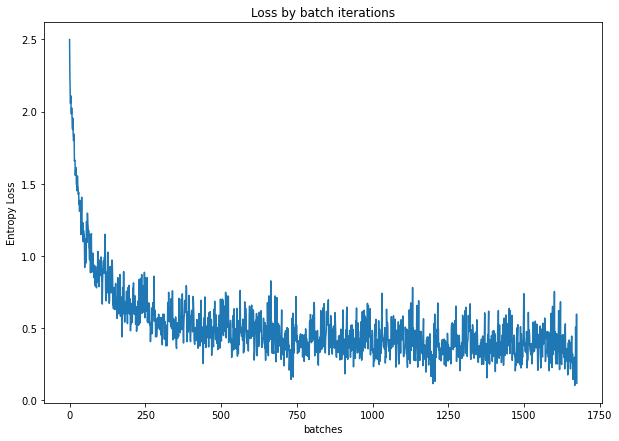

In [62]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

Some quality metrics for our linear model

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
  # load batches of data correctly
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1)
  y_batch = y_batch

  preds = torch.argmax(x_batch @ W, dim=1)
  acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.904


Result, we now see that every variable or tensor is provided with its own `grad` and `grad_fn`. This part showed we can directly manipulate with them. Also it is very inconvinient, but sometimes we should be able to access such flexibility.

Of course PyTorch has higher level of operations between weights and grads, than we saw above. Next part introduces high level of modeling and training neural networks. 


## Model

PyTorch is flexible framework to build any kind of neural network

Here is a table of comparison:

```
| API             | Flexibility | Convenience |,
|-----------------|-------------|-------------|,
| Barebone        | High        | Low         |,
| `nn.Module`     | High        | Medium      |,
| `nn.Sequential` | Low         | High        |
```

1. barebone is the approach where we directly manipulate with ternsors. In the example above we had the objective function directly expressid by weights. If we develop this method into classes we would get this level of API. **On this level we code modules by ourselves**

2. [`nn.Module`](https://pytorch.org/docs/stable/nn.html) is the parent class for many PyTorch introduced modules. There are plenty of them. They are pretty enough to use them out-of-the-box with required parameters. Mostly we use:

- `nn.Linear`
- `nn.Softmax`, `nn.LogSoftmax`
- `nn.ReLU`, `nn.ELU`, `nn.LeakyReLU`
- `nn.Tanh`, `nn.Sigmoid`
- `nn.LSTM`, `nn.GRU`
- `nn.Conv1d`, `nn.Conv2d`
- `nn.MaxPool1d`, `nn.AdaptiveMaxPool1d` and others pooling
- `nn.BatchNorm1d`, `nn.BatchNorm2d`
- `nn.Dropout`
- losses: `nn.CrossEntropyLoss`, `nn.NLLLoss`, `nn.MSELoss`
- etc

3. `nn.Sequential` is no more than sequence of different modules based on `nn.Module`. They are initiatiated by a list of modules, where output from one module goes as input for next in sequence.


Let's **develop a simple sequential** to classify MNIST using **two linear layers** model.

In [21]:
import torch.nn as nn
from torchinfo import summary

In [22]:
model = nn.Sequential(
  nn.Linear(features, 64),
  nn.ReLU(),
  nn.Linear(64, classes)
)

# It is the same as:
#
# model = nn.Sequential()
# model.add_module('0', nn.Linear(features, 64))
# model.add_module('1', nn.Linear(64, classes))

model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

In [23]:
!nvidia-smi

Tue Oct 11 00:32:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 512.78       Driver Version: 512.78       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8     2W /  N/A |     85MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We can check if everything is fine with hidden layers by `torchsummary.summary`. It needs the shape of input data to produce visualisation of model

In [68]:
summary(model,(features,))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Linear: 1-1                            [64]                      50,240
├─ReLU: 1-2                              [64]                      --
├─Linear: 1-3                            [10]                      650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
Total mult-adds (M): 3.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.20
Estimated Total Size (MB): 0.21

## Train

As we know, most important thing to do in solving problem are **3 things**:

1. Model
2. Objective (loss function)
3. Optimizing (objective w.r.t. model parameters)

Good, everything we must do when using PyTorch is **define these 3 things**:

1. Model: from `nn.Module` API
2. Loss: again, `nn.Module` or [`nn.functional`](https://pytorch.org/docs/stable/nn.functional.html) API
3. Optimizer: based on [`torch.optim.Optimizer`](https://pytorch.org/docs/stable/optim.html)

In the previous tasks when it came to optimize objective we used **direct solution or gradient descent optimizations**

Of course, there are plenty upgrades of gradient descent. It can use **adaptive step value**, **previous step gradients** and others. PyTorch also provides some classes for gradient optimizations. They are initializing with parameters they should tune for better loss value and during descent they do the step in gradient-based descent method.

Here is the most used optimizers, based on which descent algorithm is used:

- `torch.optim.Adam` uses both second and first momentum of gradient, very popular for its speed of convergence, simplicity. [paper](https://arxiv.org/abs/1412.6980)

- `torch.optim.SGD` - good-old stochastic gradient descent. Can be used with Nesterov momentum optimization

- `torch.optim.Adagrad` - [paper](https://jmlr.org/papers/v12/duchi11a.html)

- `torch.optim.RMSprop` - introduced in [slides](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)



First define the last 2 things: criterion and optimizer

In [25]:
criterion = nn.CrossEntropyLoss()      # (logsoftmax + negative likelihood) in its core, applied to logits

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

Finally, we are heading to **train loop**!

Previously we iterated over epochs and batches (this is called train loop). So, let's do it here

In [26]:
epochs = 3
history = []

In [27]:
for i in range(epochs):
    for x_batch, y_batch in train_loader:
    # 1. load batches of data correctly
    x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
    y_batch = y_batch.to(device)

    # 2. compute scores with .forward or .__call__
    logits = model(x_batch)

    # 3. compute loss
    loss = criterion(logits, y_batch)
    history.append(loss.item())

    # 4. calc gradients
    optimizer.zero_grad()
    loss.backward()

    # 5. step of gradient descent
    optimizer.step()

  print(f'{i+1},\t loss: {history[-1]}')

1,	 loss: 0.0872824490070343
2,	 loss: 0.058971796184778214
3,	 loss: 0.054159536957740784


In [75]:
y_batch

tensor([9, 8, 6, 7, 3, 4, 6, 8, 7, 0, 4, 2, 7, 7, 5, 4, 3, 4, 2, 8, 1, 5, 1, 0,
        2, 3, 3, 5, 7, 0, 6, 8, 6, 3, 9, 9, 8, 2, 7, 7, 1, 0, 1, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1, 9, 3, 8, 4,
        4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4, 0, 6, 1, 0,
        0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2, 4, 9, 4, 3,
        6, 4, 1, 7, 2, 6, 5, 0])

In [69]:
x_batch.shape

torch.Size([128, 784])

In [74]:
y_batch

tensor([9, 8, 6, 7, 3, 4, 6, 8, 7, 0, 4, 2, 7, 7, 5, 4, 3, 4, 2, 8, 1, 5, 1, 0,
        2, 3, 3, 5, 7, 0, 6, 8, 6, 3, 9, 9, 8, 2, 7, 7, 1, 0, 1, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1, 9, 3, 8, 4,
        4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4, 0, 6, 1, 0,
        0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2, 4, 9, 4, 3,
        6, 4, 1, 7, 2, 6, 5, 0])

In [73]:
logits.shape

torch.Size([128, 10])

Plot and accurracy just to check the correctness.

In [28]:
import matplotlib.pyplot as plt

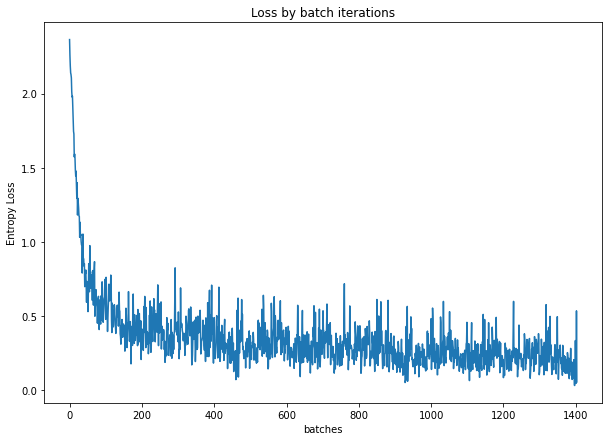

In [29]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

Some quality metrics for our two layer model

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
  # load batch of data correctly
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
  y_batch = y_batch.to(device)

  preds = torch.argmax(model(x_batch), dim=1)
  acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.94


## Summary

We have build and trained the most simple neural network. It has been done by defining:

1. `model`
2. `criterion`
1. `optimizer`

Remember the steps during train on batch:

1. load batch
2. do forward pass of model (get `scores`)
3. calculate `loss` (using criterion over `scores` and true labels of batch)
4. perform `loss.backward()` (compute gradients of loss w.r.t. parameters)
5. do optimization step (`optimizer.step()`)
* zero gradients (place it everywhere but not between 4 and 5)
* validating (after each epoch)

